### Preprocesamiento5
### IPN- CIC
### Alumno: Jorge Diego García Torres
#### Titulo : Clasificación de los grados de retinopatía diabética en imágenes del fondo del ojo mediante algoritmos de aprendizaje profundo.

In [3]:
from tqdm import tqdm
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt


from numpy import asarray
from numpy import save

In [50]:
train_df = pd.read_csv('California Healthcare Foundation/trainLabels.csv')
train1_df =train_df[train_df.image != '43862_left']


In [51]:
train1_df.head(10)

image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1
5  15_right      2
6   16_left      4
7  16_right      4
8   17_left      0
9  17_right      1

In [52]:
def crop_image_from_gray(img, tol=7):


    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1),mask.any(0))]

    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): 
            return img
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img

In [59]:
def circle_crop1(img, sigmaX = 30):   
    
    img = crop_image_from_gray(img)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 

In [60]:
def resize(image_pil, width, height):

    ratio_w = width / image_pil.width
    ratio_h = height / image_pil.height
    if ratio_w < ratio_h:

        resize_width = width
        resize_height = round(ratio_w * image_pil.height)
    else:

        resize_width = round(ratio_h * image_pil.width)
        resize_height = height
    image_resize = image_pil.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (width, height), (0, 0, 0, 0)) #fondo negro o blanco
    offset = (round((width - resize_width) / 2), round((height - resize_height) / 2))
    background.paste(image_resize, offset)
    return background.convert('RGB')

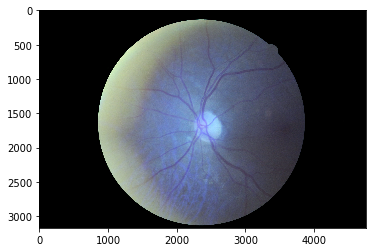

In [55]:
img=cv2.imread(f'California Healthcare Foundation/train/train 2/10_left.jpeg')
plt.imshow(img)

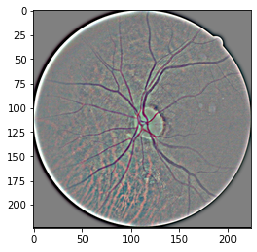

In [62]:
img = cv2.imread('California Healthcare Foundation/train/train 2/10_left.jpeg')
img=circle_crop1(img)
pilimage =Image.fromarray(img)
img =resize(pilimage,224,224)
    
plt.imshow(img)

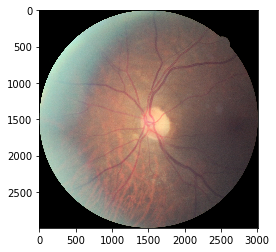

In [57]:
img = cv2.imread('California Healthcare Foundation/train/train 2/10_left.jpeg')
image = crop_image_from_gray(img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [65]:
from tqdm import tqdm
import os

DIR = 'California Healthcare Foundation/train/train 2'  #carpeta con el dataset ya preprocesado manualmente (sin imagenes repetidas o corruptas o que sean de un platillo diferente, etc)
DIR2 = 'California Healthcare Foundation/train/train-224-circle' #capeta destino que contiene sub-carpetas con los nombres objetivo del anterior código vacias o una copia de la carpta anterior

IMG_size = 224  # tamaño de la imagen, usualmente utilizo 80 0 124, porque los archivos .pickle o .npy son muy grandes y saturan la ram 
          # cuando los cargo en colab para realizar el entrenamiento

for i, image_id in enumerate(tqdm(train_df['image'])):
    img = cv2.imread(DIR+'/'+image_id+'.jpeg')
    img = circle_crop1(img)
    pilimage =Image.fromarray(img)
    img =resize(pilimage,IMG_size,IMG_size)
    img.save(DIR2+'/'+image_id+'.png')



  0%|          | 0/35126 [00:00<?, ?it/s]

  0%|          | 1/35126 [00:10<105:56:12, 10.86s/it]

  0%|          | 2/35126 [00:22<107:05:19, 10.98s/it]

  0%|          | 3/35126 [00:26<88:20:13,  9.05s/it] 

  0%|          | 4/35126 [00:30<73:32:56,  7.54s/it]

  0%|          | 5/35126 [00:44<93:00:18,  9.53s/it]

  0%|          | 6/35126 [00:57<100:44:26, 10.33s/it]

  0%|          | 7/35126 [01:07<102:15:10, 10.48s/it]

  0%|          | 8/35126 [01:17<98:36:58, 10.11s/it] 

  0%|          | 9/35126 [01:25<94:32:33,  9.69s/it]

  0%|          | 10/35126 [01:33<89:35:40,  9.18s/it]

  0%|          | 11/35126 [01:43<91:02:38,  9.33s/it]

  0%|          | 12/35126 [01:50<84:53:11,  8.70s/it]

  0%|          | 13/35126 [01:58<82:54:58,  8.50s/it]

  0%|          | 14/35126 [02:08<85:49:08,  8.80s/it]

  0%|          | 15/35126 [02:21<97:17:01,  9.97s/it]

  0%|          | 16/35126 [02:34<107:16:49, 11.00s/it]

  0%|          | 17/35126 [02:41<96:36:14,  9.91s/it] 

  0%|          | 18/3

  1%|          | 264/35126 [33:56<52:18:47,  5.40s/it]

  1%|          | 265/35126 [34:04<58:09:19,  6.01s/it]

  1%|          | 266/35126 [34:09<57:25:12,  5.93s/it]

  1%|          | 267/35126 [34:14<54:15:10,  5.60s/it]

  1%|          | 268/35126 [34:19<50:34:17,  5.22s/it]

  1%|          | 269/35126 [34:24<52:18:29,  5.40s/it]

  1%|          | 270/35126 [34:30<53:05:53,  5.48s/it]

  1%|          | 271/35126 [34:34<47:34:22,  4.91s/it]

  1%|          | 272/35126 [34:37<41:38:26,  4.30s/it]

  1%|          | 273/35126 [34:39<37:37:45,  3.89s/it]

  1%|          | 274/35126 [34:43<38:03:03,  3.93s/it]

  1%|          | 275/35126 [34:49<41:21:59,  4.27s/it]

  1%|          | 276/35126 [34:55<47:39:25,  4.92s/it]

  1%|          | 277/35126 [35:03<57:11:24,  5.91s/it]

  1%|          | 278/35126 [35:12<65:17:01,  6.74s/it]

  1%|          | 279/35126 [35:22<73:42:57,  7.62s/it]

  1%|          | 280/35126 [35:33<84:40:03,  8.75s/it]

  1%|          | 281/35126 [35:37<70:21:01,  7.2

  1%|▏         | 526/35126 [1:06:43<67:51:11,  7.06s/it]

  2%|▏         | 527/35126 [1:06:50<67:26:10,  7.02s/it]

  2%|▏         | 528/35126 [1:06:55<64:13:31,  6.68s/it]

  2%|▏         | 529/35126 [1:07:03<67:29:59,  7.02s/it]

  2%|▏         | 530/35126 [1:07:10<67:44:32,  7.05s/it]

  2%|▏         | 531/35126 [1:07:17<66:47:42,  6.95s/it]

  2%|▏         | 532/35126 [1:07:27<74:58:27,  7.80s/it]

  2%|▏         | 533/35126 [1:07:45<105:00:15, 10.93s/it]

  2%|▏         | 534/35126 [1:08:05<131:47:24, 13.72s/it]

  2%|▏         | 535/35126 [1:08:28<158:39:56, 16.51s/it]

  2%|▏         | 536/35126 [1:08:43<153:45:03, 16.00s/it]

  2%|▏         | 537/35126 [1:08:51<129:00:44, 13.43s/it]

  2%|▏         | 538/35126 [1:09:00<117:13:30, 12.20s/it]

  2%|▏         | 539/35126 [1:09:04<93:49:45,  9.77s/it] 

  2%|▏         | 540/35126 [1:09:07<74:38:40,  7.77s/it]

  2%|▏         | 541/35126 [1:09:10<61:06:25,  6.36s/it]

  2%|▏         | 542/35126 [1:09:14<52:48:08,  5.50s/it]

  2%|▏ 

  2%|▏         | 781/35126 [1:37:08<66:10:22,  6.94s/it]

  2%|▏         | 782/35126 [1:37:15<66:37:26,  6.98s/it]

  2%|▏         | 783/35126 [1:37:19<57:24:08,  6.02s/it]

  2%|▏         | 784/35126 [1:37:24<52:59:48,  5.56s/it]

  2%|▏         | 785/35126 [1:37:32<59:51:25,  6.27s/it]

  2%|▏         | 786/35126 [1:37:42<72:24:13,  7.59s/it]

  2%|▏         | 787/35126 [1:37:48<66:09:09,  6.94s/it]

  2%|▏         | 788/35126 [1:37:52<59:27:42,  6.23s/it]

  2%|▏         | 789/35126 [1:37:59<60:41:14,  6.36s/it]

  2%|▏         | 790/35126 [1:38:08<69:33:11,  7.29s/it]

  2%|▏         | 791/35126 [1:38:12<57:59:22,  6.08s/it]

  2%|▏         | 792/35126 [1:38:16<54:22:28,  5.70s/it]

  2%|▏         | 793/35126 [1:38:22<55:09:46,  5.78s/it]

  2%|▏         | 794/35126 [1:38:29<56:50:35,  5.96s/it]

  2%|▏         | 795/35126 [1:38:33<50:41:50,  5.32s/it]

  2%|▏         | 796/35126 [1:38:36<46:05:47,  4.83s/it]

  2%|▏         | 797/35126 [1:38:39<41:02:09,  4.30s/it]

  2%|▏        

  3%|▎         | 1036/35126 [1:55:23<40:18:54,  4.26s/it]

  3%|▎         | 1037/35126 [1:55:25<34:34:52,  3.65s/it]

  3%|▎         | 1038/35126 [1:55:27<30:58:40,  3.27s/it]

  3%|▎         | 1039/35126 [1:55:30<29:06:28,  3.07s/it]

  3%|▎         | 1040/35126 [1:55:33<28:14:02,  2.98s/it]

  3%|▎         | 1041/35126 [1:55:37<33:04:11,  3.49s/it]

  3%|▎         | 1042/35126 [1:55:42<35:34:16,  3.76s/it]

  3%|▎         | 1043/35126 [1:55:47<39:22:02,  4.16s/it]

  3%|▎         | 1044/35126 [1:55:52<42:03:24,  4.44s/it]

  3%|▎         | 1045/35126 [1:55:54<35:57:08,  3.80s/it]

  3%|▎         | 1046/35126 [1:55:57<31:57:31,  3.38s/it]

  3%|▎         | 1047/35126 [1:56:00<30:18:40,  3.20s/it]

  3%|▎         | 1048/35126 [1:56:03<29:56:51,  3.16s/it]

  3%|▎         | 1049/35126 [1:56:07<33:43:37,  3.56s/it]

  3%|▎         | 1050/35126 [1:56:12<36:18:06,  3.84s/it]

  3%|▎         | 1051/35126 [1:56:15<36:35:41,  3.87s/it]

  3%|▎         | 1052/35126 [1:56:19<35:55:39,  3.80s/it

  4%|▎         | 1288/35126 [2:14:42<55:05:55,  5.86s/it]

  4%|▎         | 1289/35126 [2:14:48<55:14:07,  5.88s/it]

  4%|▎         | 1290/35126 [2:14:53<53:10:33,  5.66s/it]

  4%|▎         | 1291/35126 [2:14:56<45:20:18,  4.82s/it]

  4%|▎         | 1292/35126 [2:15:00<41:50:58,  4.45s/it]

  4%|▎         | 1293/35126 [2:15:05<44:45:45,  4.76s/it]

  4%|▎         | 1294/35126 [2:15:10<44:36:47,  4.75s/it]

  4%|▎         | 1295/35126 [2:15:15<45:36:15,  4.85s/it]

  4%|▎         | 1296/35126 [2:15:22<51:24:14,  5.47s/it]

  4%|▎         | 1297/35126 [2:15:27<49:47:15,  5.30s/it]

  4%|▎         | 1298/35126 [2:15:30<45:30:43,  4.84s/it]

  4%|▎         | 1299/35126 [2:15:37<51:38:41,  5.50s/it]

  4%|▎         | 1300/35126 [2:15:44<53:30:38,  5.69s/it]

  4%|▎         | 1301/35126 [2:15:47<46:06:58,  4.91s/it]

  4%|▎         | 1302/35126 [2:15:50<42:09:07,  4.49s/it]

  4%|▎         | 1303/35126 [2:15:55<42:31:51,  4.53s/it]

  4%|▎         | 1304/35126 [2:16:01<46:09:56,  4.91s/it

  4%|▍         | 1539/35126 [2:41:48<50:55:30,  5.46s/it]

  4%|▍         | 1540/35126 [2:41:51<43:55:32,  4.71s/it]

  4%|▍         | 1541/35126 [2:41:55<43:40:36,  4.68s/it]

  4%|▍         | 1542/35126 [2:42:00<42:19:58,  4.54s/it]

  4%|▍         | 1543/35126 [2:42:07<49:50:44,  5.34s/it]

  4%|▍         | 1544/35126 [2:42:14<54:18:45,  5.82s/it]

  4%|▍         | 1545/35126 [2:42:20<54:35:47,  5.85s/it]

  4%|▍         | 1546/35126 [2:42:25<51:47:33,  5.55s/it]

  4%|▍         | 1547/35126 [2:42:27<43:45:57,  4.69s/it]

  4%|▍         | 1548/35126 [2:42:30<37:48:33,  4.05s/it]

  4%|▍         | 1549/35126 [2:42:33<35:49:13,  3.84s/it]

  4%|▍         | 1550/35126 [2:42:36<32:39:01,  3.50s/it]

  4%|▍         | 1551/35126 [2:42:40<35:15:57,  3.78s/it]

  4%|▍         | 1552/35126 [2:42:45<37:03:18,  3.97s/it]

  4%|▍         | 1553/35126 [2:42:49<37:34:17,  4.03s/it]

  4%|▍         | 1554/35126 [2:42:53<36:26:01,  3.91s/it]

  4%|▍         | 1555/35126 [2:42:57<38:57:28,  4.18s/it

  5%|▌         | 1791/35126 [3:00:03<53:25:39,  5.77s/it]

  5%|▌         | 1792/35126 [3:00:09<55:03:04,  5.95s/it]

  5%|▌         | 1793/35126 [3:00:13<49:32:46,  5.35s/it]

  5%|▌         | 1794/35126 [3:00:17<44:40:32,  4.83s/it]

  5%|▌         | 1795/35126 [3:00:23<47:45:01,  5.16s/it]

  5%|▌         | 1796/35126 [3:00:29<50:28:04,  5.45s/it]

  5%|▌         | 1797/35126 [3:00:33<47:05:08,  5.09s/it]

  5%|▌         | 1798/35126 [3:00:37<44:02:27,  4.76s/it]

  5%|▌         | 1799/35126 [3:00:40<38:57:57,  4.21s/it]

  5%|▌         | 1800/35126 [3:00:43<36:24:43,  3.93s/it]

  5%|▌         | 1801/35126 [3:00:46<33:38:53,  3.63s/it]

  5%|▌         | 1802/35126 [3:00:49<30:31:24,  3.30s/it]

  5%|▌         | 1803/35126 [3:00:53<34:04:58,  3.68s/it]

  5%|▌         | 1804/35126 [3:00:58<37:06:09,  4.01s/it]

  5%|▌         | 1805/35126 [3:01:06<48:16:07,  5.21s/it]

  5%|▌         | 1806/35126 [3:01:13<52:58:21,  5.72s/it]

  5%|▌         | 1807/35126 [3:01:18<50:05:36,  5.41s/it

  6%|▌         | 2043/35126 [3:21:23<49:11:28,  5.35s/it]

  6%|▌         | 2044/35126 [3:21:29<50:53:54,  5.54s/it]

  6%|▌         | 2045/35126 [3:21:32<45:13:28,  4.92s/it]

  6%|▌         | 2046/35126 [3:21:36<42:15:19,  4.60s/it]

  6%|▌         | 2047/35126 [3:21:39<37:42:19,  4.10s/it]

  6%|▌         | 2048/35126 [3:21:42<34:18:26,  3.73s/it]

  6%|▌         | 2049/35126 [3:21:45<32:37:50,  3.55s/it]

  6%|▌         | 2050/35126 [3:21:48<30:45:27,  3.35s/it]

  6%|▌         | 2051/35126 [3:21:51<30:12:02,  3.29s/it]

  6%|▌         | 2052/35126 [3:21:54<30:00:30,  3.27s/it]

  6%|▌         | 2053/35126 [3:22:01<40:55:29,  4.45s/it]

  6%|▌         | 2054/35126 [3:22:12<57:17:32,  6.24s/it]

  6%|▌         | 2055/35126 [3:22:18<56:02:47,  6.10s/it]

  6%|▌         | 2056/35126 [3:22:23<53:45:04,  5.85s/it]

  6%|▌         | 2057/35126 [3:22:29<55:32:04,  6.05s/it]

  6%|▌         | 2058/35126 [3:22:36<57:43:35,  6.28s/it]

  6%|▌         | 2059/35126 [3:22:40<52:04:50,  5.67s/it

  7%|▋         | 2294/35126 [3:47:08<59:26:58,  6.52s/it]

  7%|▋         | 2295/35126 [3:47:16<63:43:22,  6.99s/it]

  7%|▋         | 2296/35126 [3:47:23<63:16:16,  6.94s/it]

  7%|▋         | 2297/35126 [3:47:30<65:54:38,  7.23s/it]

  7%|▋         | 2298/35126 [3:47:39<70:26:07,  7.72s/it]

  7%|▋         | 2299/35126 [3:47:45<63:30:14,  6.96s/it]

  7%|▋         | 2300/35126 [3:47:49<58:03:43,  6.37s/it]

  7%|▋         | 2301/35126 [3:47:53<50:38:02,  5.55s/it]

  7%|▋         | 2302/35126 [3:47:57<46:36:30,  5.11s/it]

  7%|▋         | 2303/35126 [3:48:01<43:20:40,  4.75s/it]

  7%|▋         | 2304/35126 [3:48:05<40:12:31,  4.41s/it]

  7%|▋         | 2305/35126 [3:48:11<44:00:43,  4.83s/it]

  7%|▋         | 2306/35126 [3:48:16<45:03:21,  4.94s/it]

  7%|▋         | 2307/35126 [3:48:22<49:41:40,  5.45s/it]

  7%|▋         | 2308/35126 [3:48:29<52:34:59,  5.77s/it]

  7%|▋         | 2309/35126 [3:48:36<56:25:57,  6.19s/it]

  7%|▋         | 2310/35126 [3:48:43<59:33:20,  6.53s/it

  7%|▋         | 2546/35126 [4:09:47<51:14:11,  5.66s/it]

  7%|▋         | 2547/35126 [4:09:55<57:55:51,  6.40s/it]

  7%|▋         | 2548/35126 [4:10:03<63:44:49,  7.04s/it]

  7%|▋         | 2549/35126 [4:10:08<57:49:42,  6.39s/it]

  7%|▋         | 2550/35126 [4:10:12<50:40:43,  5.60s/it]

  7%|▋         | 2551/35126 [4:10:18<53:04:42,  5.87s/it]

  7%|▋         | 2552/35126 [4:10:23<49:48:06,  5.50s/it]

  7%|▋         | 2553/35126 [4:10:30<54:34:40,  6.03s/it]

  7%|▋         | 2554/35126 [4:10:39<61:08:58,  6.76s/it]

  7%|▋         | 2555/35126 [4:10:45<59:12:00,  6.54s/it]

  7%|▋         | 2556/35126 [4:10:48<50:38:46,  5.60s/it]

  7%|▋         | 2557/35126 [4:10:52<45:40:30,  5.05s/it]

  7%|▋         | 2558/35126 [4:10:55<39:42:39,  4.39s/it]

  7%|▋         | 2559/35126 [4:11:03<49:26:33,  5.47s/it]

  7%|▋         | 2560/35126 [4:11:11<57:10:50,  6.32s/it]

  7%|▋         | 2561/35126 [4:11:14<47:59:01,  5.30s/it]

  7%|▋         | 2562/35126 [4:11:17<42:35:59,  4.71s/it

  8%|▊         | 2798/35126 [4:25:55<27:18:21,  3.04s/it]

  8%|▊         | 2799/35126 [4:25:58<26:41:55,  2.97s/it]

  8%|▊         | 2800/35126 [4:26:01<26:39:28,  2.97s/it]

  8%|▊         | 2801/35126 [4:26:05<29:17:36,  3.26s/it]

  8%|▊         | 2802/35126 [4:26:08<30:28:14,  3.39s/it]

  8%|▊         | 2803/35126 [4:26:13<33:03:38,  3.68s/it]

  8%|▊         | 2804/35126 [4:26:17<33:38:17,  3.75s/it]

  8%|▊         | 2805/35126 [4:26:22<37:57:00,  4.23s/it]

  8%|▊         | 2806/35126 [4:26:27<40:21:41,  4.50s/it]

  8%|▊         | 2807/35126 [4:26:33<44:15:22,  4.93s/it]

  8%|▊         | 2808/35126 [4:26:39<46:31:06,  5.18s/it]

  8%|▊         | 2809/35126 [4:26:44<46:08:53,  5.14s/it]

  8%|▊         | 2810/35126 [4:26:49<46:50:00,  5.22s/it]

  8%|▊         | 2811/35126 [4:26:53<43:27:27,  4.84s/it]

  8%|▊         | 2812/35126 [4:26:57<40:17:51,  4.49s/it]

  8%|▊         | 2813/35126 [4:27:00<37:37:02,  4.19s/it]

  8%|▊         | 2814/35126 [4:27:04<36:49:09,  4.10s/it

  9%|▊         | 3050/35126 [4:42:11<39:37:33,  4.45s/it]

  9%|▊         | 3051/35126 [4:42:14<37:44:33,  4.24s/it]

  9%|▊         | 3052/35126 [4:42:18<36:57:49,  4.15s/it]

  9%|▊         | 3053/35126 [4:42:21<32:02:16,  3.60s/it]

  9%|▊         | 3054/35126 [4:42:23<27:48:09,  3.12s/it]

  9%|▊         | 3055/35126 [4:42:27<32:38:10,  3.66s/it]

  9%|▊         | 3056/35126 [4:42:33<37:24:09,  4.20s/it]

  9%|▊         | 3057/35126 [4:42:36<34:23:14,  3.86s/it]

  9%|▊         | 3058/35126 [4:42:39<30:58:04,  3.48s/it]

  9%|▊         | 3059/35126 [4:42:44<36:26:43,  4.09s/it]

  9%|▊         | 3060/35126 [4:42:50<39:59:00,  4.49s/it]

  9%|▊         | 3061/35126 [4:42:54<40:38:23,  4.56s/it]

  9%|▊         | 3062/35126 [4:42:59<41:40:25,  4.68s/it]

  9%|▊         | 3063/35126 [4:43:02<35:30:08,  3.99s/it]

  9%|▊         | 3064/35126 [4:43:05<33:06:02,  3.72s/it]

  9%|▊         | 3065/35126 [4:43:12<41:57:42,  4.71s/it]

  9%|▊         | 3066/35126 [4:43:18<47:19:11,  5.31s/it

  9%|▉         | 3302/35126 [4:59:38<36:56:28,  4.18s/it]

  9%|▉         | 3303/35126 [4:59:43<38:36:11,  4.37s/it]

  9%|▉         | 3304/35126 [4:59:47<39:15:05,  4.44s/it]

  9%|▉         | 3305/35126 [4:59:50<35:29:06,  4.01s/it]

  9%|▉         | 3306/35126 [4:59:53<31:47:19,  3.60s/it]

  9%|▉         | 3307/35126 [4:59:56<29:48:05,  3.37s/it]

  9%|▉         | 3308/35126 [4:59:58<27:55:21,  3.16s/it]

  9%|▉         | 3309/35126 [5:00:01<27:02:34,  3.06s/it]

  9%|▉         | 3310/35126 [5:00:05<27:56:55,  3.16s/it]

  9%|▉         | 3311/35126 [5:00:10<32:53:48,  3.72s/it]

  9%|▉         | 3312/35126 [5:00:15<37:01:32,  4.19s/it]

  9%|▉         | 3313/35126 [5:00:20<39:24:30,  4.46s/it]

  9%|▉         | 3314/35126 [5:00:25<41:34:21,  4.70s/it]

  9%|▉         | 3315/35126 [5:00:30<41:22:38,  4.68s/it]

  9%|▉         | 3316/35126 [5:00:35<42:02:09,  4.76s/it]

  9%|▉         | 3317/35126 [5:00:40<44:08:48,  5.00s/it]

  9%|▉         | 3318/35126 [5:00:46<44:35:23,  5.05s/it

 10%|█         | 3554/35126 [5:15:50<23:37:25,  2.69s/it]

 10%|█         | 3555/35126 [5:15:54<26:27:54,  3.02s/it]

 10%|█         | 3556/35126 [5:15:59<30:48:13,  3.51s/it]

 10%|█         | 3557/35126 [5:16:01<27:12:15,  3.10s/it]

 10%|█         | 3558/35126 [5:16:03<25:58:12,  2.96s/it]

 10%|█         | 3559/35126 [5:16:08<29:15:15,  3.34s/it]

 10%|█         | 3560/35126 [5:16:12<33:18:42,  3.80s/it]

 10%|█         | 3561/35126 [5:16:15<29:24:59,  3.35s/it]

 10%|█         | 3562/35126 [5:16:17<26:21:30,  3.01s/it]

 10%|█         | 3563/35126 [5:16:19<24:42:53,  2.82s/it]

 10%|█         | 3564/35126 [5:16:22<23:27:50,  2.68s/it]

 10%|█         | 3565/35126 [5:16:26<26:35:55,  3.03s/it]

 10%|█         | 3566/35126 [5:16:30<29:50:33,  3.40s/it]

 10%|█         | 3567/35126 [5:16:32<26:17:10,  3.00s/it]

 10%|█         | 3568/35126 [5:16:35<26:15:28,  3.00s/it]

 10%|█         | 3569/35126 [5:16:40<31:46:38,  3.63s/it]

 10%|█         | 3570/35126 [5:16:45<35:19:50,  4.03s/it

 11%|█         | 3806/35126 [5:29:53<38:29:07,  4.42s/it]

 11%|█         | 3807/35126 [5:29:55<31:52:14,  3.66s/it]

 11%|█         | 3808/35126 [5:29:57<27:31:04,  3.16s/it]

 11%|█         | 3809/35126 [5:29:59<25:19:29,  2.91s/it]

 11%|█         | 3810/35126 [5:30:02<24:15:46,  2.79s/it]

 11%|█         | 3811/35126 [5:30:06<28:12:39,  3.24s/it]

 11%|█         | 3812/35126 [5:30:10<29:02:26,  3.34s/it]

 11%|█         | 3813/35126 [5:30:14<30:13:32,  3.47s/it]

 11%|█         | 3814/35126 [5:30:17<30:44:43,  3.53s/it]

 11%|█         | 3815/35126 [5:30:20<28:56:45,  3.33s/it]

 11%|█         | 3816/35126 [5:30:23<27:50:13,  3.20s/it]

 11%|█         | 3817/35126 [5:30:26<26:17:28,  3.02s/it]

 11%|█         | 3818/35126 [5:30:29<26:12:43,  3.01s/it]

 11%|█         | 3819/35126 [5:30:32<26:23:27,  3.03s/it]

 11%|█         | 3820/35126 [5:30:35<27:54:00,  3.21s/it]

 11%|█         | 3821/35126 [5:30:40<30:38:33,  3.52s/it]

 11%|█         | 3822/35126 [5:30:44<33:23:06,  3.84s/it

 12%|█▏        | 4058/35126 [5:45:14<37:52:21,  4.39s/it]

 12%|█▏        | 4059/35126 [5:45:17<34:06:24,  3.95s/it]

 12%|█▏        | 4060/35126 [5:45:20<31:11:48,  3.62s/it]

 12%|█▏        | 4061/35126 [5:45:26<39:05:37,  4.53s/it]

 12%|█▏        | 4062/35126 [5:45:34<46:52:38,  5.43s/it]

 12%|█▏        | 4063/35126 [5:45:39<46:42:59,  5.41s/it]

 12%|█▏        | 4064/35126 [5:45:44<45:10:07,  5.23s/it]

 12%|█▏        | 4065/35126 [5:45:47<38:32:57,  4.47s/it]

 12%|█▏        | 4066/35126 [5:45:50<33:58:42,  3.94s/it]

 12%|█▏        | 4067/35126 [5:45:54<34:01:56,  3.94s/it]

 12%|█▏        | 4068/35126 [5:45:57<34:08:24,  3.96s/it]

 12%|█▏        | 4069/35126 [5:46:03<38:21:30,  4.45s/it]

 12%|█▏        | 4070/35126 [5:46:09<41:33:17,  4.82s/it]

 12%|█▏        | 4071/35126 [5:46:11<35:05:48,  4.07s/it]

 12%|█▏        | 4072/35126 [5:46:13<30:45:40,  3.57s/it]

 12%|█▏        | 4073/35126 [5:46:18<33:34:52,  3.89s/it]

 12%|█▏        | 4074/35126 [5:46:22<34:23:53,  3.99s/it

 12%|█▏        | 4310/35126 [6:05:26<29:23:26,  3.43s/it]

 12%|█▏        | 4311/35126 [6:05:31<33:51:34,  3.96s/it]

 12%|█▏        | 4312/35126 [6:05:37<39:34:54,  4.62s/it]

 12%|█▏        | 4313/35126 [6:05:40<35:21:43,  4.13s/it]

 12%|█▏        | 4314/35126 [6:05:44<33:10:01,  3.88s/it]

 12%|█▏        | 4315/35126 [6:05:50<38:57:29,  4.55s/it]

 12%|█▏        | 4316/35126 [6:05:56<42:39:07,  4.98s/it]

 12%|█▏        | 4317/35126 [6:05:59<37:31:45,  4.39s/it]

 12%|█▏        | 4318/35126 [6:06:02<34:54:14,  4.08s/it]

 12%|█▏        | 4319/35126 [6:06:09<40:47:26,  4.77s/it]

 12%|█▏        | 4320/35126 [6:06:14<42:48:08,  5.00s/it]

 12%|█▏        | 4321/35126 [6:06:20<44:36:22,  5.21s/it]

 12%|█▏        | 4322/35126 [6:06:25<45:32:26,  5.32s/it]

 12%|█▏        | 4323/35126 [6:06:29<40:30:14,  4.73s/it]

 12%|█▏        | 4324/35126 [6:06:32<36:46:53,  4.30s/it]

 12%|█▏        | 4325/35126 [6:06:40<44:53:40,  5.25s/it]

 12%|█▏        | 4326/35126 [6:06:46<48:17:23,  5.64s/it

 13%|█▎        | 4562/35126 [6:26:25<38:14:41,  4.50s/it]

 13%|█▎        | 4563/35126 [6:26:30<40:30:26,  4.77s/it]

 13%|█▎        | 4564/35126 [6:26:35<41:50:54,  4.93s/it]

 13%|█▎        | 4565/35126 [6:26:42<45:56:47,  5.41s/it]

 13%|█▎        | 4566/35126 [6:26:48<47:25:29,  5.59s/it]

 13%|█▎        | 4567/35126 [6:26:53<47:45:18,  5.63s/it]

 13%|█▎        | 4568/35126 [6:26:59<48:34:50,  5.72s/it]

 13%|█▎        | 4569/35126 [6:27:08<54:45:37,  6.45s/it]

 13%|█▎        | 4570/35126 [6:27:14<55:53:11,  6.58s/it]

 13%|█▎        | 4571/35126 [6:27:20<53:45:17,  6.33s/it]

 13%|█▎        | 4572/35126 [6:27:25<50:56:25,  6.00s/it]

 13%|█▎        | 4573/35126 [6:27:30<47:11:52,  5.56s/it]

 13%|█▎        | 4574/35126 [6:27:34<44:23:23,  5.23s/it]

 13%|█▎        | 4575/35126 [6:27:41<49:03:30,  5.78s/it]

 13%|█▎        | 4576/35126 [6:27:48<49:44:34,  5.86s/it]

 13%|█▎        | 4577/35126 [6:27:52<44:56:32,  5.30s/it]

 13%|█▎        | 4578/35126 [6:27:56<42:30:48,  5.01s/it

 14%|█▎        | 4814/35126 [6:48:25<50:33:37,  6.00s/it]

 14%|█▎        | 4815/35126 [6:48:34<57:48:21,  6.87s/it]

 14%|█▎        | 4816/35126 [6:48:42<60:19:38,  7.17s/it]

 14%|█▎        | 4817/35126 [6:48:46<51:17:50,  6.09s/it]

 14%|█▎        | 4818/35126 [6:48:50<45:32:16,  5.41s/it]

 14%|█▎        | 4819/35126 [6:48:53<41:30:20,  4.93s/it]

 14%|█▎        | 4820/35126 [6:48:57<37:53:51,  4.50s/it]

 14%|█▎        | 4821/35126 [6:49:03<42:14:19,  5.02s/it]

 14%|█▎        | 4822/35126 [6:49:09<44:03:22,  5.23s/it]

 14%|█▎        | 4823/35126 [6:49:16<49:15:06,  5.85s/it]

 14%|█▎        | 4824/35126 [6:49:22<48:38:32,  5.78s/it]

 14%|█▎        | 4825/35126 [6:49:27<48:29:35,  5.76s/it]

 14%|█▎        | 4826/35126 [6:49:34<49:27:06,  5.88s/it]

 14%|█▎        | 4827/35126 [6:49:37<44:23:50,  5.28s/it]

 14%|█▎        | 4828/35126 [6:49:40<37:44:31,  4.48s/it]

 14%|█▎        | 4829/35126 [6:49:44<36:41:20,  4.36s/it]

 14%|█▍        | 4830/35126 [6:49:48<35:26:45,  4.21s/it

 14%|█▍        | 5066/35126 [7:06:12<36:08:01,  4.33s/it]

 14%|█▍        | 5067/35126 [7:06:14<30:38:20,  3.67s/it]

 14%|█▍        | 5068/35126 [7:06:16<26:58:08,  3.23s/it]

 14%|█▍        | 5069/35126 [7:06:20<28:21:56,  3.40s/it]

 14%|█▍        | 5070/35126 [7:06:23<29:19:11,  3.51s/it]

 14%|█▍        | 5071/35126 [7:06:26<26:12:58,  3.14s/it]

 14%|█▍        | 5072/35126 [7:06:28<24:17:45,  2.91s/it]

 14%|█▍        | 5073/35126 [7:06:31<23:05:58,  2.77s/it]

 14%|█▍        | 5074/35126 [7:06:34<23:40:11,  2.84s/it]

 14%|█▍        | 5075/35126 [7:06:38<29:03:00,  3.48s/it]

 14%|█▍        | 5076/35126 [7:06:43<31:47:08,  3.81s/it]

 14%|█▍        | 5077/35126 [7:06:48<35:09:36,  4.21s/it]

 14%|█▍        | 5078/35126 [7:06:54<37:51:39,  4.54s/it]

 14%|█▍        | 5079/35126 [7:06:57<36:20:22,  4.35s/it]

 14%|█▍        | 5080/35126 [7:07:02<35:40:23,  4.27s/it]

 14%|█▍        | 5081/35126 [7:07:06<36:53:17,  4.42s/it]

 14%|█▍        | 5082/35126 [7:07:10<35:11:47,  4.22s/it

 15%|█▌        | 5318/35126 [7:27:11<53:39:52,  6.48s/it]

 15%|█▌        | 5319/35126 [7:27:15<47:38:33,  5.75s/it]

 15%|█▌        | 5320/35126 [7:27:20<43:24:53,  5.24s/it]

 15%|█▌        | 5321/35126 [7:27:25<43:27:56,  5.25s/it]

 15%|█▌        | 5322/35126 [7:27:30<43:26:30,  5.25s/it]

 15%|█▌        | 5323/35126 [7:27:35<42:01:40,  5.08s/it]

 15%|█▌        | 5324/35126 [7:27:39<39:45:40,  4.80s/it]

 15%|█▌        | 5325/35126 [7:27:43<37:08:00,  4.49s/it]

 15%|█▌        | 5326/35126 [7:27:46<34:53:17,  4.21s/it]

 15%|█▌        | 5327/35126 [7:27:54<44:27:16,  5.37s/it]

 15%|█▌        | 5328/35126 [7:28:01<48:58:00,  5.92s/it]

 15%|█▌        | 5329/35126 [7:28:08<49:50:34,  6.02s/it]

 15%|█▌        | 5330/35126 [7:28:14<49:41:27,  6.00s/it]

 15%|█▌        | 5331/35126 [7:28:20<49:50:57,  6.02s/it]

 15%|█▌        | 5332/35126 [7:28:25<47:47:36,  5.77s/it]

 15%|█▌        | 5333/35126 [7:28:36<61:45:32,  7.46s/it]

 15%|█▌        | 5334/35126 [7:28:47<70:34:31,  8.53s/it

 16%|█▌        | 5569/35126 [7:58:55<77:19:00,  9.42s/it]

 16%|█▌        | 5570/35126 [7:59:02<70:21:48,  8.57s/it]

 16%|█▌        | 5571/35126 [7:59:09<68:45:54,  8.38s/it]

 16%|█▌        | 5572/35126 [7:59:17<66:56:36,  8.15s/it]

 16%|█▌        | 5573/35126 [7:59:27<70:30:21,  8.59s/it]

 16%|█▌        | 5574/35126 [7:59:37<74:54:05,  9.12s/it]

 16%|█▌        | 5575/35126 [7:59:50<83:26:52, 10.17s/it]

 16%|█▌        | 5576/35126 [7:59:59<82:33:24, 10.06s/it]

 16%|█▌        | 5577/35126 [8:00:06<72:49:50,  8.87s/it]

 16%|█▌        | 5578/35126 [8:00:11<64:45:59,  7.89s/it]

 16%|█▌        | 5579/35126 [8:00:15<55:32:10,  6.77s/it]

 16%|█▌        | 5580/35126 [8:00:19<46:51:52,  5.71s/it]

 16%|█▌        | 5581/35126 [8:00:22<41:11:30,  5.02s/it]

 16%|█▌        | 5582/35126 [8:00:25<37:24:13,  4.56s/it]

 16%|█▌        | 5583/35126 [8:00:29<34:42:07,  4.23s/it]

 16%|█▌        | 5584/35126 [8:00:33<34:03:55,  4.15s/it]

 16%|█▌        | 5585/35126 [8:00:42<46:10:48,  5.63s/it

 17%|█▋        | 5821/35126 [8:31:23<68:38:07,  8.43s/it]

 17%|█▋        | 5822/35126 [8:31:34<74:38:47,  9.17s/it]

 17%|█▋        | 5823/35126 [8:31:41<70:47:12,  8.70s/it]

 17%|█▋        | 5824/35126 [8:31:52<74:29:47,  9.15s/it]

 17%|█▋        | 5825/35126 [8:32:03<80:40:24,  9.91s/it]

 17%|█▋        | 5826/35126 [8:32:14<81:59:52, 10.07s/it]

 17%|█▋        | 5827/35126 [8:32:26<87:08:30, 10.71s/it]

 17%|█▋        | 5828/35126 [8:32:38<91:21:26, 11.23s/it]

 17%|█▋        | 5829/35126 [8:32:54<102:28:45, 12.59s/it]

 17%|█▋        | 5830/35126 [8:33:08<104:19:41, 12.82s/it]

 17%|█▋        | 5831/35126 [8:33:19<100:45:55, 12.38s/it]

 17%|█▋        | 5832/35126 [8:33:29<94:14:41, 11.58s/it] 

 17%|█▋        | 5833/35126 [8:33:33<76:46:04,  9.43s/it]

 17%|█▋        | 5834/35126 [8:33:38<65:26:43,  8.04s/it]

 17%|█▋        | 5835/35126 [8:33:46<66:10:25,  8.13s/it]

 17%|█▋        | 5836/35126 [8:33:57<72:54:51,  8.96s/it]

 17%|█▋        | 5837/35126 [8:34:12<87:34:09, 10.76

 17%|█▋        | 6071/35126 [9:03:52<35:37:35,  4.41s/it]

 17%|█▋        | 6072/35126 [9:03:56<35:46:31,  4.43s/it]

 17%|█▋        | 6073/35126 [9:04:01<36:08:34,  4.48s/it]

 17%|█▋        | 6074/35126 [9:04:06<37:06:33,  4.60s/it]

 17%|█▋        | 6075/35126 [9:04:10<36:42:00,  4.55s/it]

 17%|█▋        | 6076/35126 [9:04:15<35:53:55,  4.45s/it]

 17%|█▋        | 6077/35126 [9:04:18<33:09:04,  4.11s/it]

 17%|█▋        | 6078/35126 [9:04:21<31:02:58,  3.85s/it]

 17%|█▋        | 6079/35126 [9:04:26<34:17:14,  4.25s/it]

 17%|█▋        | 6080/35126 [9:04:31<36:18:00,  4.50s/it]

 17%|█▋        | 6081/35126 [9:04:36<37:27:15,  4.64s/it]

 17%|█▋        | 6082/35126 [9:04:41<36:59:11,  4.58s/it]

 17%|█▋        | 6083/35126 [9:04:43<31:28:45,  3.90s/it]

 17%|█▋        | 6084/35126 [9:04:45<27:35:23,  3.42s/it]

 17%|█▋        | 6085/35126 [9:04:50<30:55:25,  3.83s/it]

 17%|█▋        | 6086/35126 [9:04:55<32:19:12,  4.01s/it]

 17%|█▋        | 6087/35126 [9:04:57<28:34:43,  3.54s/it

 18%|█▊        | 6323/35126 [9:21:53<34:21:14,  4.29s/it]

 18%|█▊        | 6324/35126 [9:21:57<34:52:37,  4.36s/it]

 18%|█▊        | 6325/35126 [9:22:06<45:32:08,  5.69s/it]

 18%|█▊        | 6326/35126 [9:22:14<51:20:28,  6.42s/it]

 18%|█▊        | 6327/35126 [9:22:18<45:51:15,  5.73s/it]

 18%|█▊        | 6328/35126 [9:22:22<42:08:15,  5.27s/it]

 18%|█▊        | 6329/35126 [9:22:28<42:18:57,  5.29s/it]

 18%|█▊        | 6330/35126 [9:22:33<42:50:38,  5.36s/it]

 18%|█▊        | 6331/35126 [9:22:40<46:56:59,  5.87s/it]

 18%|█▊        | 6332/35126 [9:22:46<47:24:49,  5.93s/it]

 18%|█▊        | 6333/35126 [9:22:53<48:56:45,  6.12s/it]

 18%|█▊        | 6334/35126 [9:22:59<48:46:47,  6.10s/it]

 18%|█▊        | 6335/35126 [9:23:08<55:37:28,  6.96s/it]

 18%|█▊        | 6336/35126 [9:23:15<56:44:31,  7.10s/it]

 18%|█▊        | 6337/35126 [9:23:21<53:23:27,  6.68s/it]

 18%|█▊        | 6338/35126 [9:23:26<50:30:05,  6.32s/it]

 18%|█▊        | 6339/35126 [9:23:32<48:36:59,  6.08s/it

 19%|█▊        | 6575/35126 [9:42:49<39:07:51,  4.93s/it]

 19%|█▊        | 6576/35126 [9:42:56<42:20:26,  5.34s/it]

 19%|█▊        | 6577/35126 [9:42:59<37:16:39,  4.70s/it]

 19%|█▊        | 6578/35126 [9:43:02<32:57:36,  4.16s/it]

 19%|█▊        | 6579/35126 [9:43:10<42:49:31,  5.40s/it]

 19%|█▊        | 6580/35126 [9:43:17<46:11:30,  5.83s/it]

 19%|█▊        | 6581/35126 [9:43:22<45:30:30,  5.74s/it]

 19%|█▊        | 6582/35126 [9:43:28<45:31:00,  5.74s/it]

 19%|█▊        | 6583/35126 [9:43:32<40:39:45,  5.13s/it]

 19%|█▊        | 6584/35126 [9:43:36<39:38:37,  5.00s/it]

 19%|█▊        | 6585/35126 [9:43:39<34:33:44,  4.36s/it]

 19%|█▊        | 6586/35126 [9:43:42<30:56:13,  3.90s/it]

 19%|█▉        | 6587/35126 [9:43:47<32:48:24,  4.14s/it]

 19%|█▉        | 6588/35126 [9:43:51<33:52:32,  4.27s/it]

 19%|█▉        | 6589/35126 [9:43:58<38:38:02,  4.87s/it]

 19%|█▉        | 6590/35126 [9:44:04<42:49:30,  5.40s/it]

 19%|█▉        | 6591/35126 [9:44:08<38:01:25,  4.80s/it

 19%|█▉        | 6826/35126 [10:04:04<48:07:00,  6.12s/it]

 19%|█▉        | 6827/35126 [10:04:08<41:41:46,  5.30s/it]

 19%|█▉        | 6828/35126 [10:04:11<36:44:18,  4.67s/it]

 19%|█▉        | 6829/35126 [10:04:17<40:27:29,  5.15s/it]

 19%|█▉        | 6830/35126 [10:04:23<41:45:33,  5.31s/it]

 19%|█▉        | 6831/35126 [10:04:30<45:39:09,  5.81s/it]

 19%|█▉        | 6832/35126 [10:04:38<50:33:41,  6.43s/it]

 19%|█▉        | 6833/35126 [10:04:44<48:57:46,  6.23s/it]

 19%|█▉        | 6834/35126 [10:04:50<48:24:54,  6.16s/it]

 19%|█▉        | 6835/35126 [10:04:53<42:21:31,  5.39s/it]

 19%|█▉        | 6836/35126 [10:04:56<37:09:49,  4.73s/it]

 19%|█▉        | 6837/35126 [10:05:00<34:00:28,  4.33s/it]

 19%|█▉        | 6838/35126 [10:05:04<33:01:33,  4.20s/it]

 19%|█▉        | 6839/35126 [10:05:09<35:26:09,  4.51s/it]

 19%|█▉        | 6840/35126 [10:05:14<36:09:57,  4.60s/it]

 19%|█▉        | 6841/35126 [10:05:16<31:22:54,  3.99s/it]

 19%|█▉        | 6842/35126 [10:05:19<27

 20%|██        | 7074/35126 [10:23:14<19:30:09,  2.50s/it]

 20%|██        | 7075/35126 [10:23:17<20:19:28,  2.61s/it]

 20%|██        | 7076/35126 [10:23:20<20:57:23,  2.69s/it]

 20%|██        | 7077/35126 [10:23:21<18:03:55,  2.32s/it]

 20%|██        | 7078/35126 [10:23:23<16:08:20,  2.07s/it]

 20%|██        | 7079/35126 [10:23:25<16:33:21,  2.13s/it]

 20%|██        | 7080/35126 [10:23:27<16:34:45,  2.13s/it]

 20%|██        | 7081/35126 [10:23:29<15:16:40,  1.96s/it]

 20%|██        | 7082/35126 [10:23:30<14:11:13,  1.82s/it]

 20%|██        | 7083/35126 [10:23:33<17:00:35,  2.18s/it]

 20%|██        | 7084/35126 [10:23:36<18:46:39,  2.41s/it]

 20%|██        | 7085/35126 [10:23:39<18:47:57,  2.41s/it]

 20%|██        | 7086/35126 [10:23:41<18:50:04,  2.42s/it]

 20%|██        | 7087/35126 [10:23:43<17:01:42,  2.19s/it]

 20%|██        | 7088/35126 [10:23:44<15:48:17,  2.03s/it]

 20%|██        | 7089/35126 [10:23:48<18:19:26,  2.35s/it]

 20%|██        | 7090/35126 [10:23:50<19

 21%|██        | 7322/35126 [10:32:58<19:57:00,  2.58s/it]

 21%|██        | 7323/35126 [10:33:01<19:57:35,  2.58s/it]

 21%|██        | 7324/35126 [10:33:04<20:57:57,  2.71s/it]

 21%|██        | 7325/35126 [10:33:07<21:29:32,  2.78s/it]

 21%|██        | 7326/35126 [10:33:10<22:02:09,  2.85s/it]

 21%|██        | 7327/35126 [10:33:13<21:34:29,  2.79s/it]

 21%|██        | 7328/35126 [10:33:15<21:32:44,  2.79s/it]

 21%|██        | 7329/35126 [10:33:17<18:37:34,  2.41s/it]

 21%|██        | 7330/35126 [10:33:18<16:46:00,  2.17s/it]

 21%|██        | 7331/35126 [10:33:21<18:19:18,  2.37s/it]

 21%|██        | 7332/35126 [10:33:24<19:21:48,  2.51s/it]

 21%|██        | 7333/35126 [10:33:27<19:55:51,  2.58s/it]

 21%|██        | 7334/35126 [10:33:30<20:27:11,  2.65s/it]

 21%|██        | 7335/35126 [10:33:32<20:50:54,  2.70s/it]

 21%|██        | 7336/35126 [10:33:36<21:34:34,  2.80s/it]

 21%|██        | 7337/35126 [10:33:37<18:52:46,  2.45s/it]

 21%|██        | 7338/35126 [10:33:39<16

 22%|██▏       | 7570/35126 [10:43:11<21:20:17,  2.79s/it]

 22%|██▏       | 7571/35126 [10:43:12<18:25:41,  2.41s/it]

 22%|██▏       | 7572/35126 [10:43:14<16:14:33,  2.12s/it]

 22%|██▏       | 7573/35126 [10:43:17<18:55:52,  2.47s/it]

 22%|██▏       | 7574/35126 [10:43:20<20:41:32,  2.70s/it]

 22%|██▏       | 7575/35126 [10:43:23<20:44:32,  2.71s/it]

 22%|██▏       | 7576/35126 [10:43:25<20:43:09,  2.71s/it]

 22%|██▏       | 7577/35126 [10:43:27<17:56:24,  2.34s/it]

 22%|██▏       | 7578/35126 [10:43:28<15:58:57,  2.09s/it]

 22%|██▏       | 7579/35126 [10:43:30<15:51:31,  2.07s/it]

 22%|██▏       | 7580/35126 [10:43:32<15:26:09,  2.02s/it]

 22%|██▏       | 7581/35126 [10:43:35<16:44:46,  2.19s/it]

 22%|██▏       | 7582/35126 [10:43:37<17:14:13,  2.25s/it]

 22%|██▏       | 7583/35126 [10:43:39<16:12:36,  2.12s/it]

 22%|██▏       | 7584/35126 [10:43:41<15:36:45,  2.04s/it]

 22%|██▏       | 7585/35126 [10:43:44<17:18:28,  2.26s/it]

 22%|██▏       | 7586/35126 [10:43:47<18

 22%|██▏       | 7818/35126 [10:52:08<13:11:48,  1.74s/it]

 22%|██▏       | 7819/35126 [10:52:11<15:23:43,  2.03s/it]

 22%|██▏       | 7820/35126 [10:52:14<17:02:19,  2.25s/it]

 22%|██▏       | 7821/35126 [10:52:16<17:34:38,  2.32s/it]

 22%|██▏       | 7822/35126 [10:52:19<18:15:05,  2.41s/it]

 22%|██▏       | 7823/35126 [10:52:20<15:52:53,  2.09s/it]

 22%|██▏       | 7824/35126 [10:52:22<14:13:35,  1.88s/it]

 22%|██▏       | 7825/35126 [10:52:23<13:20:29,  1.76s/it]

 22%|██▏       | 7826/35126 [10:52:25<12:58:27,  1.71s/it]

 22%|██▏       | 7827/35126 [10:52:28<16:59:49,  2.24s/it]

 22%|██▏       | 7828/35126 [10:52:32<19:47:21,  2.61s/it]

 22%|██▏       | 7829/35126 [10:52:35<20:09:30,  2.66s/it]

 22%|██▏       | 7830/35126 [10:52:37<19:33:26,  2.58s/it]

 22%|██▏       | 7831/35126 [10:52:39<17:34:49,  2.32s/it]

 22%|██▏       | 7832/35126 [10:52:40<16:13:24,  2.14s/it]

 22%|██▏       | 7833/35126 [10:52:43<16:26:04,  2.17s/it]

 22%|██▏       | 7834/35126 [10:52:45<16

 23%|██▎       | 8066/35126 [11:01:51<15:43:30,  2.09s/it]

 23%|██▎       | 8067/35126 [11:01:52<14:32:17,  1.93s/it]

 23%|██▎       | 8068/35126 [11:01:54<13:28:15,  1.79s/it]

 23%|██▎       | 8069/35126 [11:01:57<16:56:03,  2.25s/it]

 23%|██▎       | 8070/35126 [11:02:00<19:34:43,  2.61s/it]

 23%|██▎       | 8071/35126 [11:02:03<20:04:32,  2.67s/it]

 23%|██▎       | 8072/35126 [11:02:06<20:14:41,  2.69s/it]

 23%|██▎       | 8073/35126 [11:02:08<19:41:56,  2.62s/it]

 23%|██▎       | 8074/35126 [11:02:11<19:42:10,  2.62s/it]

 23%|██▎       | 8075/35126 [11:02:13<17:54:58,  2.38s/it]

 23%|██▎       | 8076/35126 [11:02:14<16:07:47,  2.15s/it]

 23%|██▎       | 8077/35126 [11:02:16<14:20:50,  1.91s/it]

 23%|██▎       | 8078/35126 [11:02:17<12:52:15,  1.71s/it]

 23%|██▎       | 8079/35126 [11:02:20<15:08:47,  2.02s/it]

 23%|██▎       | 8080/35126 [11:02:22<16:32:03,  2.20s/it]

 23%|██▎       | 8081/35126 [11:02:26<19:38:35,  2.61s/it]

 23%|██▎       | 8082/35126 [11:02:30<21

 24%|██▎       | 8314/35126 [11:11:37<19:24:51,  2.61s/it]

 24%|██▎       | 8315/35126 [11:11:40<20:26:28,  2.74s/it]

 24%|██▎       | 8316/35126 [11:11:43<20:47:02,  2.79s/it]

 24%|██▎       | 8317/35126 [11:11:45<19:34:25,  2.63s/it]

 24%|██▎       | 8318/35126 [11:11:47<18:48:12,  2.53s/it]

 24%|██▎       | 8319/35126 [11:11:50<19:47:31,  2.66s/it]

 24%|██▎       | 8320/35126 [11:11:54<20:46:26,  2.79s/it]

 24%|██▎       | 8321/35126 [11:11:57<21:39:04,  2.91s/it]

 24%|██▎       | 8322/35126 [11:12:00<21:40:20,  2.91s/it]

 24%|██▎       | 8323/35126 [11:12:02<19:49:08,  2.66s/it]

 24%|██▎       | 8324/35126 [11:12:04<19:54:50,  2.67s/it]

 24%|██▎       | 8325/35126 [11:12:07<20:30:24,  2.75s/it]

 24%|██▎       | 8326/35126 [11:12:10<20:53:37,  2.81s/it]

 24%|██▎       | 8327/35126 [11:12:12<18:08:28,  2.44s/it]

 24%|██▎       | 8328/35126 [11:12:13<16:07:27,  2.17s/it]

 24%|██▎       | 8329/35126 [11:12:16<17:46:55,  2.39s/it]

 24%|██▎       | 8330/35126 [11:12:19<18

 24%|██▍       | 8562/35126 [11:21:21<14:41:24,  1.99s/it]

 24%|██▍       | 8563/35126 [11:21:24<16:09:21,  2.19s/it]

 24%|██▍       | 8564/35126 [11:21:26<17:04:03,  2.31s/it]

 24%|██▍       | 8565/35126 [11:21:27<14:52:54,  2.02s/it]

 24%|██▍       | 8566/35126 [11:21:29<13:38:52,  1.85s/it]

 24%|██▍       | 8567/35126 [11:21:30<12:41:41,  1.72s/it]

 24%|██▍       | 8568/35126 [11:21:32<12:07:40,  1.64s/it]

 24%|██▍       | 8569/35126 [11:21:34<13:52:16,  1.88s/it]

 24%|██▍       | 8570/35126 [11:21:36<14:02:36,  1.90s/it]

 24%|██▍       | 8571/35126 [11:21:38<14:50:06,  2.01s/it]

 24%|██▍       | 8572/35126 [11:21:41<15:23:59,  2.09s/it]

 24%|██▍       | 8573/35126 [11:21:43<16:45:06,  2.27s/it]

 24%|██▍       | 8574/35126 [11:21:46<17:46:03,  2.41s/it]

 24%|██▍       | 8575/35126 [11:21:48<15:37:14,  2.12s/it]

 24%|██▍       | 8576/35126 [11:21:49<13:59:43,  1.90s/it]

 24%|██▍       | 8577/35126 [11:21:52<15:55:15,  2.16s/it]

 24%|██▍       | 8578/35126 [11:21:54<16

 25%|██▌       | 8810/35126 [11:30:42<18:09:55,  2.48s/it]

 25%|██▌       | 8811/35126 [11:30:44<17:42:15,  2.42s/it]

 25%|██▌       | 8812/35126 [11:30:47<17:07:53,  2.34s/it]

 25%|██▌       | 8813/35126 [11:30:50<19:01:28,  2.60s/it]

 25%|██▌       | 8814/35126 [11:30:53<20:08:38,  2.76s/it]

 25%|██▌       | 8815/35126 [11:30:54<17:31:21,  2.40s/it]

 25%|██▌       | 8816/35126 [11:30:56<15:31:14,  2.12s/it]

 25%|██▌       | 8817/35126 [11:30:57<14:04:12,  1.93s/it]

 25%|██▌       | 8818/35126 [11:30:59<13:03:25,  1.79s/it]

 25%|██▌       | 8819/35126 [11:31:01<14:00:41,  1.92s/it]

 25%|██▌       | 8820/35126 [11:31:04<15:14:45,  2.09s/it]

 25%|██▌       | 8821/35126 [11:31:06<16:38:40,  2.28s/it]

 25%|██▌       | 8822/35126 [11:31:09<17:52:42,  2.45s/it]

 25%|██▌       | 8823/35126 [11:31:12<18:11:56,  2.49s/it]

 25%|██▌       | 8824/35126 [11:31:15<18:54:05,  2.59s/it]

 25%|██▌       | 8825/35126 [11:31:17<18:17:43,  2.50s/it]

 25%|██▌       | 8826/35126 [11:31:19<18

 26%|██▌       | 9058/35126 [11:40:18<13:51:24,  1.91s/it]

 26%|██▌       | 9059/35126 [11:40:20<12:44:10,  1.76s/it]

 26%|██▌       | 9060/35126 [11:40:21<11:55:43,  1.65s/it]

 26%|██▌       | 9061/35126 [11:40:23<12:59:36,  1.79s/it]

 26%|██▌       | 9062/35126 [11:40:25<13:45:26,  1.90s/it]

 26%|██▌       | 9063/35126 [11:40:29<16:58:48,  2.35s/it]

 26%|██▌       | 9064/35126 [11:40:32<18:31:59,  2.56s/it]

 26%|██▌       | 9065/35126 [11:40:34<18:02:15,  2.49s/it]

 26%|██▌       | 9066/35126 [11:40:36<17:10:10,  2.37s/it]

 26%|██▌       | 9067/35126 [11:40:39<18:36:08,  2.57s/it]

 26%|██▌       | 9068/35126 [11:40:42<19:16:39,  2.66s/it]

 26%|██▌       | 9069/35126 [11:40:45<19:06:42,  2.64s/it]

 26%|██▌       | 9070/35126 [11:40:47<19:05:01,  2.64s/it]

 26%|██▌       | 9071/35126 [11:40:49<17:06:32,  2.36s/it]

 26%|██▌       | 9072/35126 [11:40:51<15:49:08,  2.19s/it]

 26%|██▌       | 9073/35126 [11:40:54<17:56:24,  2.48s/it]

 26%|██▌       | 9074/35126 [11:40:57<19

 26%|██▋       | 9306/35126 [11:49:24<15:00:56,  2.09s/it]

 26%|██▋       | 9307/35126 [11:49:25<11:50:04,  1.65s/it]

 26%|██▋       | 9308/35126 [11:49:25<9:22:19,  1.31s/it] 

 27%|██▋       | 9309/35126 [11:49:30<16:11:52,  2.26s/it]

 27%|██▋       | 9310/35126 [11:49:34<20:23:08,  2.84s/it]

 27%|██▋       | 9311/35126 [11:49:35<17:40:52,  2.47s/it]

 27%|██▋       | 9312/35126 [11:49:37<15:44:06,  2.19s/it]

 27%|██▋       | 9313/35126 [11:49:40<16:33:03,  2.31s/it]

 27%|██▋       | 9314/35126 [11:49:42<17:10:25,  2.40s/it]

 27%|██▋       | 9315/35126 [11:49:45<17:46:45,  2.48s/it]

 27%|██▋       | 9316/35126 [11:49:48<18:21:38,  2.56s/it]

 27%|██▋       | 9317/35126 [11:49:49<16:18:42,  2.28s/it]

 27%|██▋       | 9318/35126 [11:49:51<14:39:52,  2.05s/it]

 27%|██▋       | 9319/35126 [11:49:53<14:39:52,  2.05s/it]

 27%|██▋       | 9320/35126 [11:49:55<14:44:51,  2.06s/it]

 27%|██▋       | 9321/35126 [11:49:58<16:15:20,  2.27s/it]

 27%|██▋       | 9322/35126 [11:50:00<17

 27%|██▋       | 9554/35126 [11:59:12<18:03:18,  2.54s/it]

 27%|██▋       | 9555/35126 [11:59:15<18:23:43,  2.59s/it]

 27%|██▋       | 9556/35126 [11:59:17<18:14:45,  2.57s/it]

 27%|██▋       | 9557/35126 [11:59:19<15:52:25,  2.23s/it]

 27%|██▋       | 9558/35126 [11:59:20<14:10:05,  1.99s/it]

 27%|██▋       | 9559/35126 [11:59:23<15:50:12,  2.23s/it]

 27%|██▋       | 9560/35126 [11:59:25<16:51:48,  2.37s/it]

 27%|██▋       | 9561/35126 [11:59:27<14:51:47,  2.09s/it]

 27%|██▋       | 9562/35126 [11:59:28<13:39:03,  1.92s/it]

 27%|██▋       | 9563/35126 [11:59:31<15:44:31,  2.22s/it]

 27%|██▋       | 9564/35126 [11:59:34<17:28:27,  2.46s/it]

 27%|██▋       | 9565/35126 [11:59:36<15:26:49,  2.18s/it]

 27%|██▋       | 9566/35126 [11:59:37<13:45:28,  1.94s/it]

 27%|██▋       | 9567/35126 [11:59:39<12:40:43,  1.79s/it]

 27%|██▋       | 9568/35126 [11:59:40<12:05:40,  1.70s/it]

 27%|██▋       | 9569/35126 [11:59:43<14:07:43,  1.99s/it]

 27%|██▋       | 9570/35126 [11:59:46<15

 28%|██▊       | 9802/35126 [12:08:35<19:04:32,  2.71s/it]

 28%|██▊       | 9803/35126 [12:08:38<19:35:00,  2.78s/it]

 28%|██▊       | 9804/35126 [12:08:41<19:55:29,  2.83s/it]

 28%|██▊       | 9805/35126 [12:08:44<19:43:20,  2.80s/it]

 28%|██▊       | 9806/35126 [12:08:47<19:51:39,  2.82s/it]

 28%|██▊       | 9807/35126 [12:08:50<21:27:04,  3.05s/it]

 28%|██▊       | 9808/35126 [12:08:54<22:02:21,  3.13s/it]

 28%|██▊       | 9809/35126 [12:08:56<20:20:05,  2.89s/it]

 28%|██▊       | 9810/35126 [12:08:58<19:10:38,  2.73s/it]

 28%|██▊       | 9811/35126 [12:09:01<18:04:53,  2.57s/it]

 28%|██▊       | 9812/35126 [12:09:03<17:51:29,  2.54s/it]

 28%|██▊       | 9813/35126 [12:09:05<15:56:02,  2.27s/it]

 28%|██▊       | 9814/35126 [12:09:06<14:03:20,  2.00s/it]

 28%|██▊       | 9815/35126 [12:09:08<14:53:51,  2.12s/it]

 28%|██▊       | 9816/35126 [12:09:11<15:25:04,  2.19s/it]

 28%|██▊       | 9817/35126 [12:09:14<17:36:40,  2.51s/it]

 28%|██▊       | 9818/35126 [12:09:17<19

 29%|██▊       | 10049/35126 [12:17:53<15:12:55,  2.18s/it]

 29%|██▊       | 10050/35126 [12:17:55<14:07:19,  2.03s/it]

 29%|██▊       | 10051/35126 [12:17:58<15:35:15,  2.24s/it]

 29%|██▊       | 10052/35126 [12:18:01<16:48:25,  2.41s/it]

 29%|██▊       | 10053/35126 [12:18:01<13:06:23,  1.88s/it]

 29%|██▊       | 10054/35126 [12:18:02<10:24:41,  1.49s/it]

 29%|██▊       | 10055/35126 [12:18:05<12:54:19,  1.85s/it]

 29%|██▊       | 10056/35126 [12:18:07<13:48:35,  1.98s/it]

 29%|██▊       | 10057/35126 [12:18:10<15:33:19,  2.23s/it]

 29%|██▊       | 10058/35126 [12:18:13<16:55:49,  2.43s/it]

 29%|██▊       | 10059/35126 [12:18:14<15:27:33,  2.22s/it]

 29%|██▊       | 10060/35126 [12:18:16<14:11:14,  2.04s/it]

 29%|██▊       | 10061/35126 [12:18:18<14:56:55,  2.15s/it]

 29%|██▊       | 10062/35126 [12:18:21<15:15:57,  2.19s/it]

 29%|██▊       | 10063/35126 [12:18:23<15:59:37,  2.30s/it]

 29%|██▊       | 10064/35126 [12:18:26<17:10:42,  2.47s/it]

 29%|██▊       | 10065/3

 29%|██▉       | 10293/35126 [12:27:37<18:14:33,  2.64s/it]

 29%|██▉       | 10294/35126 [12:27:39<18:02:16,  2.62s/it]

 29%|██▉       | 10295/35126 [12:27:42<17:38:26,  2.56s/it]

 29%|██▉       | 10296/35126 [12:27:44<17:15:49,  2.50s/it]

 29%|██▉       | 10297/35126 [12:27:47<18:23:59,  2.67s/it]

 29%|██▉       | 10298/35126 [12:27:51<20:08:40,  2.92s/it]

 29%|██▉       | 10299/35126 [12:27:54<21:31:22,  3.12s/it]

 29%|██▉       | 10300/35126 [12:27:58<21:57:27,  3.18s/it]

 29%|██▉       | 10301/35126 [12:27:59<19:06:09,  2.77s/it]

 29%|██▉       | 10302/35126 [12:28:01<16:29:12,  2.39s/it]

 29%|██▉       | 10303/35126 [12:28:03<14:48:59,  2.15s/it]

 29%|██▉       | 10304/35126 [12:28:04<14:09:18,  2.05s/it]

 29%|██▉       | 10305/35126 [12:28:08<17:30:52,  2.54s/it]

 29%|██▉       | 10306/35126 [12:28:12<19:30:36,  2.83s/it]

 29%|██▉       | 10307/35126 [12:28:14<19:12:39,  2.79s/it]

 29%|██▉       | 10308/35126 [12:28:17<18:47:59,  2.73s/it]

 29%|██▉       | 10309/3

 30%|██▉       | 10537/35126 [12:37:20<21:53:50,  3.21s/it]

 30%|███       | 10538/35126 [12:37:24<23:36:59,  3.46s/it]

 30%|███       | 10539/35126 [12:37:27<21:07:41,  3.09s/it]

 30%|███       | 10540/35126 [12:37:29<19:37:38,  2.87s/it]

 30%|███       | 10541/35126 [12:37:31<18:14:50,  2.67s/it]

 30%|███       | 10542/35126 [12:37:33<17:34:35,  2.57s/it]

 30%|███       | 10543/35126 [12:37:35<15:34:59,  2.28s/it]

 30%|███       | 10544/35126 [12:37:37<14:12:30,  2.08s/it]

 30%|███       | 10545/35126 [12:37:38<13:10:14,  1.93s/it]

 30%|███       | 10546/35126 [12:37:40<12:46:02,  1.87s/it]

 30%|███       | 10547/35126 [12:37:43<15:41:44,  2.30s/it]

 30%|███       | 10548/35126 [12:37:46<17:10:14,  2.52s/it]

 30%|███       | 10549/35126 [12:37:48<16:27:54,  2.41s/it]

 30%|███       | 10550/35126 [12:37:51<16:58:37,  2.49s/it]

 30%|███       | 10551/35126 [12:37:53<15:11:05,  2.22s/it]

 30%|███       | 10552/35126 [12:37:54<13:53:50,  2.04s/it]

 30%|███       | 10553/3

 31%|███       | 10781/35126 [12:47:13<19:14:29,  2.85s/it]

 31%|███       | 10782/35126 [12:47:17<20:47:19,  3.07s/it]

 31%|███       | 10783/35126 [12:47:19<20:02:48,  2.96s/it]

 31%|███       | 10784/35126 [12:47:22<19:37:25,  2.90s/it]

 31%|███       | 10785/35126 [12:47:25<19:10:52,  2.84s/it]

 31%|███       | 10786/35126 [12:47:28<19:12:20,  2.84s/it]

 31%|███       | 10787/35126 [12:47:30<19:13:51,  2.84s/it]

 31%|███       | 10788/35126 [12:47:34<20:06:40,  2.97s/it]

 31%|███       | 10789/35126 [12:47:36<18:28:27,  2.73s/it]

 31%|███       | 10790/35126 [12:47:38<17:03:55,  2.52s/it]

 31%|███       | 10791/35126 [12:47:39<14:39:00,  2.17s/it]

 31%|███       | 10792/35126 [12:47:41<13:07:10,  1.94s/it]

 31%|███       | 10793/35126 [12:47:43<14:25:34,  2.13s/it]

 31%|███       | 10794/35126 [12:47:46<15:13:35,  2.25s/it]

 31%|███       | 10795/35126 [12:47:48<15:37:14,  2.31s/it]

 31%|███       | 10796/35126 [12:47:51<16:53:55,  2.50s/it]

 31%|███       | 10797/3

 31%|███▏      | 11025/35126 [12:56:28<14:51:36,  2.22s/it]

 31%|███▏      | 11026/35126 [12:56:31<15:39:29,  2.34s/it]

 31%|███▏      | 11027/35126 [12:56:32<13:37:46,  2.04s/it]

 31%|███▏      | 11028/35126 [12:56:33<12:42:26,  1.90s/it]

 31%|███▏      | 11029/35126 [12:56:36<13:17:31,  1.99s/it]

 31%|███▏      | 11030/35126 [12:56:38<13:25:24,  2.01s/it]

 31%|███▏      | 11031/35126 [12:56:40<14:41:05,  2.19s/it]

 31%|███▏      | 11032/35126 [12:56:43<15:31:51,  2.32s/it]

 31%|███▏      | 11033/35126 [12:56:45<14:54:31,  2.23s/it]

 31%|███▏      | 11034/35126 [12:56:47<14:29:20,  2.17s/it]

 31%|███▏      | 11035/35126 [12:56:51<17:53:49,  2.67s/it]

 31%|███▏      | 11036/35126 [12:56:54<19:36:01,  2.93s/it]

 31%|███▏      | 11037/35126 [12:56:57<18:48:25,  2.81s/it]

 31%|███▏      | 11038/35126 [12:56:59<17:35:46,  2.63s/it]

 31%|███▏      | 11039/35126 [12:57:01<16:11:56,  2.42s/it]

 31%|███▏      | 11040/35126 [12:57:03<15:34:47,  2.33s/it]

 31%|███▏      | 11041/3

 32%|███▏      | 11269/35126 [13:04:34<14:42:08,  2.22s/it]

 32%|███▏      | 11270/35126 [13:04:37<16:05:06,  2.43s/it]

 32%|███▏      | 11271/35126 [13:04:40<16:42:09,  2.52s/it]

 32%|███▏      | 11272/35126 [13:04:42<16:33:12,  2.50s/it]

 32%|███▏      | 11273/35126 [13:04:44<15:31:08,  2.34s/it]

 32%|███▏      | 11274/35126 [13:04:46<14:31:20,  2.19s/it]

 32%|███▏      | 11275/35126 [13:04:48<15:03:14,  2.27s/it]

 32%|███▏      | 11276/35126 [13:04:51<15:27:11,  2.33s/it]

 32%|███▏      | 11277/35126 [13:04:52<13:53:28,  2.10s/it]

 32%|███▏      | 11278/35126 [13:04:54<12:26:54,  1.88s/it]

 32%|███▏      | 11279/35126 [13:04:56<13:52:43,  2.10s/it]

 32%|███▏      | 11280/35126 [13:04:59<14:33:45,  2.20s/it]

 32%|███▏      | 11281/35126 [13:05:03<17:40:43,  2.67s/it]

 32%|███▏      | 11282/35126 [13:05:06<19:48:48,  2.99s/it]

 32%|███▏      | 11283/35126 [13:05:09<18:38:49,  2.82s/it]

 32%|███▏      | 11284/35126 [13:05:11<17:44:40,  2.68s/it]

 32%|███▏      | 11285/3

 33%|███▎      | 11513/35126 [13:12:57<15:01:35,  2.29s/it]

 33%|███▎      | 11514/35126 [13:12:59<14:36:24,  2.23s/it]

 33%|███▎      | 11515/35126 [13:13:01<12:44:08,  1.94s/it]

 33%|███▎      | 11516/35126 [13:13:02<11:20:00,  1.73s/it]

 33%|███▎      | 11517/35126 [13:13:03<10:38:15,  1.62s/it]

 33%|███▎      | 11518/35126 [13:13:05<10:07:45,  1.54s/it]

 33%|███▎      | 11519/35126 [13:13:07<11:39:59,  1.78s/it]

 33%|███▎      | 11520/35126 [13:13:09<12:35:01,  1.92s/it]

 33%|███▎      | 11521/35126 [13:13:12<13:40:44,  2.09s/it]

 33%|███▎      | 11522/35126 [13:13:14<14:16:04,  2.18s/it]

 33%|███▎      | 11523/35126 [13:13:16<13:34:29,  2.07s/it]

 33%|███▎      | 11524/35126 [13:13:18<12:58:17,  1.98s/it]

 33%|███▎      | 11525/35126 [13:13:20<13:43:45,  2.09s/it]

 33%|███▎      | 11526/35126 [13:13:22<14:05:22,  2.15s/it]

 33%|███▎      | 11527/35126 [13:13:24<12:21:56,  1.89s/it]

 33%|███▎      | 11528/35126 [13:13:25<11:09:54,  1.70s/it]

 33%|███▎      | 11529/3

 33%|███▎      | 11757/35126 [13:21:07<15:30:50,  2.39s/it]

 33%|███▎      | 11758/35126 [13:21:10<16:11:14,  2.49s/it]

 33%|███▎      | 11759/35126 [13:21:12<14:25:02,  2.22s/it]

 33%|███▎      | 11760/35126 [13:21:13<13:12:20,  2.03s/it]

 33%|███▎      | 11761/35126 [13:21:15<11:56:53,  1.84s/it]

 33%|███▎      | 11762/35126 [13:21:16<11:01:16,  1.70s/it]

 33%|███▎      | 11763/35126 [13:21:17<10:24:37,  1.60s/it]

 33%|███▎      | 11764/35126 [13:21:19<9:52:53,  1.52s/it] 

 33%|███▎      | 11765/35126 [13:21:20<9:17:23,  1.43s/it]

 33%|███▎      | 11766/35126 [13:21:21<8:56:56,  1.38s/it]

 33%|███▎      | 11767/35126 [13:21:23<9:44:10,  1.50s/it]

 34%|███▎      | 11768/35126 [13:21:25<10:06:40,  1.56s/it]

 34%|███▎      | 11769/35126 [13:21:26<9:19:31,  1.44s/it] 

 34%|███▎      | 11770/35126 [13:21:27<8:56:54,  1.38s/it]

 34%|███▎      | 11771/35126 [13:21:30<11:11:02,  1.72s/it]

 34%|███▎      | 11772/35126 [13:21:32<12:28:01,  1.92s/it]

 34%|███▎      | 11773/35126

 34%|███▍      | 12001/35126 [13:29:22<16:09:34,  2.52s/it]

 34%|███▍      | 12002/35126 [13:29:24<15:26:49,  2.40s/it]

 34%|███▍      | 12003/35126 [13:29:28<16:49:50,  2.62s/it]

 34%|███▍      | 12004/35126 [13:29:30<17:20:33,  2.70s/it]

 34%|███▍      | 12005/35126 [13:29:33<17:17:11,  2.69s/it]

 34%|███▍      | 12006/35126 [13:29:36<17:17:45,  2.69s/it]

 34%|███▍      | 12007/35126 [13:29:38<17:02:16,  2.65s/it]

 34%|███▍      | 12008/35126 [13:29:41<17:08:00,  2.67s/it]

 34%|███▍      | 12009/35126 [13:29:43<14:45:23,  2.30s/it]

 34%|███▍      | 12010/35126 [13:29:44<13:03:41,  2.03s/it]

 34%|███▍      | 12011/35126 [13:29:47<14:10:34,  2.21s/it]

 34%|███▍      | 12012/35126 [13:29:49<14:58:04,  2.33s/it]

 34%|███▍      | 12013/35126 [13:29:51<13:28:55,  2.10s/it]

 34%|███▍      | 12014/35126 [13:29:52<12:08:25,  1.89s/it]

 34%|███▍      | 12015/35126 [13:29:54<11:16:36,  1.76s/it]

 34%|███▍      | 12016/35126 [13:29:55<10:39:59,  1.66s/it]

 34%|███▍      | 12017/3

 35%|███▍      | 12245/35126 [13:37:24<14:11:28,  2.23s/it]

 35%|███▍      | 12246/35126 [13:37:26<14:14:44,  2.24s/it]

 35%|███▍      | 12247/35126 [13:37:28<14:38:44,  2.30s/it]

 35%|███▍      | 12248/35126 [13:37:31<14:34:29,  2.29s/it]

 35%|███▍      | 12249/35126 [13:37:33<14:45:27,  2.32s/it]

 35%|███▍      | 12250/35126 [13:37:35<15:07:09,  2.38s/it]

 35%|███▍      | 12251/35126 [13:37:37<13:16:07,  2.09s/it]

 35%|███▍      | 12252/35126 [13:37:38<11:51:42,  1.87s/it]

 35%|███▍      | 12253/35126 [13:37:40<12:22:45,  1.95s/it]

 35%|███▍      | 12254/35126 [13:37:43<12:54:40,  2.03s/it]

 35%|███▍      | 12255/35126 [13:37:46<15:11:30,  2.39s/it]

 35%|███▍      | 12256/35126 [13:37:49<16:29:42,  2.60s/it]

 35%|███▍      | 12257/35126 [13:37:52<17:03:55,  2.69s/it]

 35%|███▍      | 12258/35126 [13:37:54<16:52:29,  2.66s/it]

 35%|███▍      | 12259/35126 [13:37:56<15:16:26,  2.40s/it]

 35%|███▍      | 12260/35126 [13:37:58<14:35:51,  2.30s/it]

 35%|███▍      | 12261/3

 36%|███▌      | 12489/35126 [13:46:11<10:50:52,  1.73s/it]

 36%|███▌      | 12490/35126 [13:46:13<11:09:15,  1.77s/it]

 36%|███▌      | 12491/35126 [13:46:15<12:11:23,  1.94s/it]

 36%|███▌      | 12492/35126 [13:46:17<13:04:52,  2.08s/it]

 36%|███▌      | 12493/35126 [13:46:19<11:17:16,  1.80s/it]

 36%|███▌      | 12494/35126 [13:46:20<9:59:43,  1.59s/it] 

 36%|███▌      | 12495/35126 [13:46:21<9:23:12,  1.49s/it]

 36%|███▌      | 12496/35126 [13:46:22<8:56:08,  1.42s/it]

 36%|███▌      | 12497/35126 [13:46:25<12:25:56,  1.98s/it]

 36%|███▌      | 12498/35126 [13:46:29<14:40:21,  2.33s/it]

 36%|███▌      | 12499/35126 [13:46:31<15:35:11,  2.48s/it]

 36%|███▌      | 12500/35126 [13:46:34<16:36:43,  2.64s/it]

 36%|███▌      | 12501/35126 [13:46:37<16:14:32,  2.58s/it]

 36%|███▌      | 12502/35126 [13:46:39<15:49:09,  2.52s/it]

 36%|███▌      | 12503/35126 [13:46:42<15:30:49,  2.47s/it]

 36%|███▌      | 12504/35126 [13:46:44<15:42:23,  2.50s/it]

 36%|███▌      | 12505/351

 36%|███▌      | 12733/35126 [13:54:32<14:11:26,  2.28s/it]

 36%|███▋      | 12734/35126 [13:54:34<15:01:16,  2.42s/it]

 36%|███▋      | 12735/35126 [13:54:37<15:33:12,  2.50s/it]

 36%|███▋      | 12736/35126 [13:54:40<15:41:58,  2.52s/it]

 36%|███▋      | 12737/35126 [13:54:43<16:32:34,  2.66s/it]

 36%|███▋      | 12738/35126 [13:54:46<17:04:37,  2.75s/it]

 36%|███▋      | 12739/35126 [13:54:47<15:31:54,  2.50s/it]

 36%|███▋      | 12740/35126 [13:54:49<14:24:34,  2.32s/it]

 36%|███▋      | 12741/35126 [13:54:51<13:50:42,  2.23s/it]

 36%|███▋      | 12742/35126 [13:54:53<13:27:57,  2.17s/it]

 36%|███▋      | 12743/35126 [13:54:55<13:05:12,  2.10s/it]

 36%|███▋      | 12744/35126 [13:54:57<12:33:27,  2.02s/it]

 36%|███▋      | 12745/35126 [13:55:01<15:33:10,  2.50s/it]

 36%|███▋      | 12746/35126 [13:55:04<17:42:21,  2.85s/it]

 36%|███▋      | 12747/35126 [13:55:07<17:07:02,  2.75s/it]

 36%|███▋      | 12748/35126 [13:55:10<17:01:12,  2.74s/it]

 36%|███▋      | 12749/3

 37%|███▋      | 12977/35126 [14:03:08<15:34:42,  2.53s/it]

 37%|███▋      | 12978/35126 [14:03:09<14:10:51,  2.31s/it]

 37%|███▋      | 12979/35126 [14:03:11<13:04:48,  2.13s/it]

 37%|███▋      | 12980/35126 [14:03:13<12:28:57,  2.03s/it]

 37%|███▋      | 12981/35126 [14:03:15<12:30:29,  2.03s/it]

 37%|███▋      | 12982/35126 [14:03:17<12:40:39,  2.06s/it]

 37%|███▋      | 12983/35126 [14:03:20<13:28:21,  2.19s/it]

 37%|███▋      | 12984/35126 [14:03:22<14:39:14,  2.38s/it]

 37%|███▋      | 12985/35126 [14:03:24<13:43:14,  2.23s/it]

 37%|███▋      | 12986/35126 [14:03:26<13:11:31,  2.15s/it]

 37%|███▋      | 12987/35126 [14:03:28<11:34:03,  1.88s/it]

 37%|███▋      | 12988/35126 [14:03:29<10:30:36,  1.71s/it]

 37%|███▋      | 12989/35126 [14:03:30<9:42:05,  1.58s/it] 

 37%|███▋      | 12990/35126 [14:03:31<9:18:40,  1.51s/it]

 37%|███▋      | 12991/35126 [14:03:33<8:44:57,  1.42s/it]

 37%|███▋      | 12992/35126 [14:03:34<8:37:59,  1.40s/it]

 37%|███▋      | 12993/3512

 38%|███▊      | 13221/35126 [14:11:06<11:20:08,  1.86s/it]

 38%|███▊      | 13222/35126 [14:11:09<12:08:59,  2.00s/it]

 38%|███▊      | 13223/35126 [14:11:12<13:49:15,  2.27s/it]

 38%|███▊      | 13224/35126 [14:11:14<14:41:42,  2.42s/it]

 38%|███▊      | 13225/35126 [14:11:15<11:09:05,  1.83s/it]

 38%|███▊      | 13226/35126 [14:11:15<8:38:09,  1.42s/it] 

 38%|███▊      | 13227/35126 [14:11:18<11:21:20,  1.87s/it]

 38%|███▊      | 13228/35126 [14:11:21<12:45:37,  2.10s/it]

 38%|███▊      | 13229/35126 [14:11:24<14:03:33,  2.31s/it]

 38%|███▊      | 13230/35126 [14:11:26<14:53:40,  2.45s/it]

 38%|███▊      | 13231/35126 [14:11:28<12:32:00,  2.06s/it]

 38%|███▊      | 13232/35126 [14:11:29<10:50:37,  1.78s/it]

 38%|███▊      | 13233/35126 [14:11:31<12:15:47,  2.02s/it]

 38%|███▊      | 13234/35126 [14:11:34<14:04:35,  2.31s/it]

 38%|███▊      | 13235/35126 [14:11:37<14:37:44,  2.41s/it]

 38%|███▊      | 13236/35126 [14:11:39<14:46:42,  2.43s/it]

 38%|███▊      | 13237/3

 38%|███▊      | 13465/35126 [14:19:23<10:04:33,  1.67s/it]

 38%|███▊      | 13466/35126 [14:19:25<11:03:25,  1.84s/it]

 38%|███▊      | 13467/35126 [14:19:27<12:03:43,  2.00s/it]

 38%|███▊      | 13468/35126 [14:19:29<12:11:03,  2.03s/it]

 38%|███▊      | 13469/35126 [14:19:30<10:37:16,  1.77s/it]

 38%|███▊      | 13470/35126 [14:19:32<9:38:31,  1.60s/it] 

 38%|███▊      | 13471/35126 [14:19:34<11:39:16,  1.94s/it]

 38%|███▊      | 13472/35126 [14:19:37<12:44:48,  2.12s/it]

 38%|███▊      | 13473/35126 [14:19:38<11:02:48,  1.84s/it]

 38%|███▊      | 13474/35126 [14:19:39<10:00:02,  1.66s/it]

 38%|███▊      | 13475/35126 [14:19:41<9:06:48,  1.52s/it] 

 38%|███▊      | 13476/35126 [14:19:42<8:27:32,  1.41s/it]

 38%|███▊      | 13477/35126 [14:19:43<8:02:03,  1.34s/it]

 38%|███▊      | 13478/35126 [14:19:44<7:46:01,  1.29s/it]

 38%|███▊      | 13479/35126 [14:19:46<8:54:24,  1.48s/it]

 38%|███▊      | 13480/35126 [14:19:48<9:27:50,  1.57s/it]

 38%|███▊      | 13481/35126 

 39%|███▉      | 13709/35126 [14:27:03<10:12:39,  1.72s/it]

 39%|███▉      | 13710/35126 [14:27:05<9:41:30,  1.63s/it] 

 39%|███▉      | 13711/35126 [14:27:07<10:13:19,  1.72s/it]

 39%|███▉      | 13712/35126 [14:27:09<10:44:53,  1.81s/it]

 39%|███▉      | 13713/35126 [14:27:10<10:23:51,  1.75s/it]

 39%|███▉      | 13714/35126 [14:27:12<10:08:18,  1.70s/it]

 39%|███▉      | 13715/35126 [14:27:13<9:17:11,  1.56s/it] 

 39%|███▉      | 13716/35126 [14:27:14<8:49:49,  1.48s/it]

 39%|███▉      | 13717/35126 [14:27:17<10:36:55,  1.79s/it]

 39%|███▉      | 13718/35126 [14:27:19<11:30:03,  1.93s/it]

 39%|███▉      | 13719/35126 [14:27:21<11:56:41,  2.01s/it]

 39%|███▉      | 13720/35126 [14:27:23<12:03:17,  2.03s/it]

 39%|███▉      | 13721/35126 [14:27:26<12:17:51,  2.07s/it]

 39%|███▉      | 13722/35126 [14:27:28<12:33:55,  2.11s/it]

 39%|███▉      | 13723/35126 [14:27:31<13:56:05,  2.34s/it]

 39%|███▉      | 13724/35126 [14:27:34<15:19:51,  2.58s/it]

 39%|███▉      | 13725/35

 40%|███▉      | 13953/35126 [14:34:57<10:21:37,  1.76s/it]

 40%|███▉      | 13954/35126 [14:35:00<11:15:38,  1.91s/it]

 40%|███▉      | 13955/35126 [14:35:01<10:00:45,  1.70s/it]

 40%|███▉      | 13956/35126 [14:35:02<9:13:24,  1.57s/it] 

 40%|███▉      | 13957/35126 [14:35:04<9:05:44,  1.55s/it]

 40%|███▉      | 13958/35126 [14:35:05<8:29:56,  1.45s/it]

 40%|███▉      | 13959/35126 [14:35:08<11:19:58,  1.93s/it]

 40%|███▉      | 13960/35126 [14:35:11<13:10:26,  2.24s/it]

 40%|███▉      | 13961/35126 [14:35:11<10:07:54,  1.72s/it]

 40%|███▉      | 13962/35126 [14:35:12<7:59:26,  1.36s/it] 

 40%|███▉      | 13963/35126 [14:35:15<10:14:10,  1.74s/it]

 40%|███▉      | 13964/35126 [14:35:17<11:40:53,  1.99s/it]

 40%|███▉      | 13965/35126 [14:35:19<11:46:08,  2.00s/it]

 40%|███▉      | 13966/35126 [14:35:21<12:04:34,  2.05s/it]

 40%|███▉      | 13967/35126 [14:35:24<13:32:03,  2.30s/it]

 40%|███▉      | 13968/35126 [14:35:27<14:33:07,  2.48s/it]

 40%|███▉      | 13969/351

 40%|████      | 14197/35126 [14:43:22<11:53:02,  2.04s/it]

 40%|████      | 14198/35126 [14:43:23<10:30:25,  1.81s/it]

 40%|████      | 14199/35126 [14:43:24<9:59:13,  1.72s/it] 

 40%|████      | 14200/35126 [14:43:26<9:44:46,  1.68s/it]

 40%|████      | 14201/35126 [14:43:29<12:24:52,  2.14s/it]

 40%|████      | 14202/35126 [14:43:32<13:54:14,  2.39s/it]

 40%|████      | 14203/35126 [14:43:33<12:05:23,  2.08s/it]

 40%|████      | 14204/35126 [14:43:35<10:43:25,  1.85s/it]

 40%|████      | 14205/35126 [14:43:37<11:40:49,  2.01s/it]

 40%|████      | 14206/35126 [14:43:39<12:11:49,  2.10s/it]

 40%|████      | 14207/35126 [14:43:42<13:07:59,  2.26s/it]

 40%|████      | 14208/35126 [14:43:44<13:17:43,  2.29s/it]

 40%|████      | 14209/35126 [14:43:47<13:26:20,  2.31s/it]

 40%|████      | 14210/35126 [14:43:49<13:05:24,  2.25s/it]

 40%|████      | 14211/35126 [14:43:50<11:20:22,  1.95s/it]

 40%|████      | 14212/35126 [14:43:51<9:56:51,  1.71s/it] 

 40%|████      | 14213/35

 41%|████      | 14441/35126 [14:52:06<11:56:41,  2.08s/it]

 41%|████      | 14442/35126 [14:52:08<11:50:18,  2.06s/it]

 41%|████      | 14443/35126 [14:52:09<10:59:37,  1.91s/it]

 41%|████      | 14444/35126 [14:52:11<10:28:46,  1.82s/it]

 41%|████      | 14445/35126 [14:52:15<13:48:34,  2.40s/it]

 41%|████      | 14446/35126 [14:52:18<15:30:21,  2.70s/it]

 41%|████      | 14447/35126 [14:52:21<15:28:38,  2.69s/it]

 41%|████      | 14448/35126 [14:52:24<15:38:01,  2.72s/it]

 41%|████      | 14449/35126 [14:52:25<12:58:24,  2.26s/it]

 41%|████      | 14450/35126 [14:52:26<11:05:18,  1.93s/it]

 41%|████      | 14451/35126 [14:52:29<12:45:38,  2.22s/it]

 41%|████      | 14452/35126 [14:52:31<13:05:04,  2.28s/it]

 41%|████      | 14453/35126 [14:52:34<13:50:39,  2.41s/it]

 41%|████      | 14454/35126 [14:52:36<14:08:10,  2.46s/it]

 41%|████      | 14455/35126 [14:52:38<12:26:18,  2.17s/it]

 41%|████      | 14456/35126 [14:52:39<11:07:51,  1.94s/it]

 41%|████      | 14457/3

 42%|████▏     | 14685/35126 [15:00:34<13:09:19,  2.32s/it]

 42%|████▏     | 14686/35126 [15:00:36<13:41:39,  2.41s/it]

 42%|████▏     | 14687/35126 [15:00:39<14:11:29,  2.50s/it]

 42%|████▏     | 14688/35126 [15:00:42<14:31:12,  2.56s/it]

 42%|████▏     | 14689/35126 [15:00:43<12:37:54,  2.23s/it]

 42%|████▏     | 14690/35126 [15:00:44<11:01:22,  1.94s/it]

 42%|████▏     | 14691/35126 [15:00:46<11:00:42,  1.94s/it]

 42%|████▏     | 14692/35126 [15:00:49<11:43:31,  2.07s/it]

 42%|████▏     | 14693/35126 [15:00:50<10:27:53,  1.84s/it]

 42%|████▏     | 14694/35126 [15:00:51<9:32:17,  1.68s/it] 

 42%|████▏     | 14695/35126 [15:00:53<10:20:35,  1.82s/it]

 42%|████▏     | 14696/35126 [15:00:56<10:52:22,  1.92s/it]

 42%|████▏     | 14697/35126 [15:00:58<11:39:58,  2.06s/it]

 42%|████▏     | 14698/35126 [15:01:01<12:38:04,  2.23s/it]

 42%|████▏     | 14699/35126 [15:01:03<12:51:39,  2.27s/it]

 42%|████▏     | 14700/35126 [15:01:06<13:58:59,  2.46s/it]

 42%|████▏     | 14701/3

 43%|████▎     | 14929/35126 [15:08:53<7:31:40,  1.34s/it]

 43%|████▎     | 14930/35126 [15:08:55<7:05:13,  1.26s/it]

 43%|████▎     | 14931/35126 [15:08:57<8:45:40,  1.56s/it]

 43%|████▎     | 14932/35126 [15:08:59<10:17:40,  1.84s/it]

 43%|████▎     | 14933/35126 [15:09:01<10:59:31,  1.96s/it]

 43%|████▎     | 14934/35126 [15:09:04<11:55:19,  2.13s/it]

 43%|████▎     | 14935/35126 [15:09:05<10:26:21,  1.86s/it]

 43%|████▎     | 14936/35126 [15:09:06<9:21:20,  1.67s/it] 

 43%|████▎     | 14937/35126 [15:09:08<9:47:15,  1.75s/it]

 43%|████▎     | 14938/35126 [15:09:10<10:07:04,  1.80s/it]

 43%|████▎     | 14939/35126 [15:09:13<11:24:54,  2.04s/it]

 43%|████▎     | 14940/35126 [15:09:15<12:20:30,  2.20s/it]

 43%|████▎     | 14941/35126 [15:09:17<11:05:44,  1.98s/it]

 43%|████▎     | 14942/35126 [15:09:18<10:04:19,  1.80s/it]

 43%|████▎     | 14943/35126 [15:09:20<10:33:33,  1.88s/it]

 43%|████▎     | 14944/35126 [15:09:23<10:53:51,  1.94s/it]

 43%|████▎     | 14945/35126

 43%|████▎     | 15173/35126 [15:17:18<8:57:40,  1.62s/it]

 43%|████▎     | 15174/35126 [15:17:20<8:27:03,  1.52s/it]

 43%|████▎     | 15175/35126 [15:17:22<9:47:55,  1.77s/it]

 43%|████▎     | 15176/35126 [15:17:24<10:50:55,  1.96s/it]

 43%|████▎     | 15177/35126 [15:17:26<9:49:25,  1.77s/it] 

 43%|████▎     | 15178/35126 [15:17:27<9:18:34,  1.68s/it]

 43%|████▎     | 15179/35126 [15:17:29<10:14:19,  1.85s/it]

 43%|████▎     | 15180/35126 [15:17:31<10:42:05,  1.93s/it]

 43%|████▎     | 15181/35126 [15:17:33<9:37:56,  1.74s/it] 

 43%|████▎     | 15182/35126 [15:17:34<9:22:03,  1.69s/it]

 43%|████▎     | 15183/35126 [15:17:37<10:07:53,  1.83s/it]

 43%|████▎     | 15184/35126 [15:17:38<10:03:03,  1.81s/it]

 43%|████▎     | 15185/35126 [15:17:39<8:56:36,  1.61s/it] 

 43%|████▎     | 15186/35126 [15:17:41<8:05:23,  1.46s/it]

 43%|████▎     | 15187/35126 [15:17:41<6:23:23,  1.15s/it]

 43%|████▎     | 15188/35126 [15:17:41<5:18:43,  1.04it/s]

 43%|████▎     | 15189/35126 [15

 44%|████▍     | 15417/35126 [15:25:25<11:18:28,  2.07s/it]

 44%|████▍     | 15418/35126 [15:25:27<12:30:36,  2.29s/it]

 44%|████▍     | 15419/35126 [15:25:30<13:10:19,  2.41s/it]

 44%|████▍     | 15420/35126 [15:25:33<13:32:34,  2.47s/it]

 44%|████▍     | 15421/35126 [15:25:34<12:08:41,  2.22s/it]

 44%|████▍     | 15422/35126 [15:25:36<10:47:27,  1.97s/it]

 44%|████▍     | 15423/35126 [15:25:37<9:40:21,  1.77s/it] 

 44%|████▍     | 15424/35126 [15:25:38<8:54:58,  1.63s/it]

 44%|████▍     | 15425/35126 [15:25:40<8:27:48,  1.55s/it]

 44%|████▍     | 15426/35126 [15:25:41<8:16:32,  1.51s/it]

 44%|████▍     | 15427/35126 [15:25:43<8:00:23,  1.46s/it]

 44%|████▍     | 15428/35126 [15:25:44<7:42:55,  1.41s/it]

 44%|████▍     | 15429/35126 [15:25:45<7:38:00,  1.40s/it]

 44%|████▍     | 15430/35126 [15:25:46<7:30:06,  1.37s/it]

 44%|████▍     | 15431/35126 [15:25:49<8:39:50,  1.58s/it]

 44%|████▍     | 15432/35126 [15:25:51<9:34:10,  1.75s/it]

 44%|████▍     | 15433/35126 [15:

 45%|████▍     | 15661/35126 [15:33:37<14:51:23,  2.75s/it]

 45%|████▍     | 15662/35126 [15:33:40<15:01:36,  2.78s/it]

 45%|████▍     | 15663/35126 [15:33:42<14:27:02,  2.67s/it]

 45%|████▍     | 15664/35126 [15:33:45<14:03:10,  2.60s/it]

 45%|████▍     | 15665/35126 [15:33:47<13:55:44,  2.58s/it]

 45%|████▍     | 15666/35126 [15:33:50<13:44:39,  2.54s/it]

 45%|████▍     | 15667/35126 [15:33:52<13:48:00,  2.55s/it]

 45%|████▍     | 15668/35126 [15:33:55<13:52:21,  2.57s/it]

 45%|████▍     | 15669/35126 [15:33:56<11:59:21,  2.22s/it]

 45%|████▍     | 15670/35126 [15:33:58<10:31:11,  1.95s/it]

 45%|████▍     | 15671/35126 [15:34:00<10:28:41,  1.94s/it]

 45%|████▍     | 15672/35126 [15:34:02<10:26:30,  1.93s/it]

 45%|████▍     | 15673/35126 [15:34:04<10:58:11,  2.03s/it]

 45%|████▍     | 15674/35126 [15:34:06<10:46:53,  2.00s/it]

 45%|████▍     | 15675/35126 [15:34:08<11:28:10,  2.12s/it]

 45%|████▍     | 15676/35126 [15:34:11<11:55:43,  2.21s/it]

 45%|████▍     | 15677/3

 45%|████▌     | 15905/35126 [15:41:47<9:49:50,  1.84s/it] 

 45%|████▌     | 15906/35126 [15:41:48<8:59:20,  1.68s/it]

 45%|████▌     | 15907/35126 [15:41:51<10:07:09,  1.90s/it]

 45%|████▌     | 15908/35126 [15:41:53<10:47:05,  2.02s/it]

 45%|████▌     | 15909/35126 [15:41:55<11:14:58,  2.11s/it]

 45%|████▌     | 15910/35126 [15:41:58<11:38:05,  2.18s/it]

 45%|████▌     | 15911/35126 [15:41:59<10:03:51,  1.89s/it]

 45%|████▌     | 15912/35126 [15:42:00<8:50:55,  1.66s/it] 

 45%|████▌     | 15913/35126 [15:42:03<10:13:54,  1.92s/it]

 45%|████▌     | 15914/35126 [15:42:05<11:23:33,  2.13s/it]

 45%|████▌     | 15915/35126 [15:42:06<9:52:36,  1.85s/it] 

 45%|████▌     | 15916/35126 [15:42:08<8:38:10,  1.62s/it]

 45%|████▌     | 15917/35126 [15:42:09<7:50:14,  1.47s/it]

 45%|████▌     | 15918/35126 [15:42:10<7:10:22,  1.34s/it]

 45%|████▌     | 15919/35126 [15:42:12<8:45:12,  1.64s/it]

 45%|████▌     | 15920/35126 [15:42:14<9:47:06,  1.83s/it]

 45%|████▌     | 15921/35126 [

 46%|████▌     | 16150/35126 [15:50:01<9:25:47,  1.79s/it] 

 46%|████▌     | 16151/35126 [15:50:03<10:52:47,  2.06s/it]

 46%|████▌     | 16152/35126 [15:50:06<11:34:04,  2.19s/it]

 46%|████▌     | 16153/35126 [15:50:08<12:00:36,  2.28s/it]

 46%|████▌     | 16154/35126 [15:50:11<12:10:25,  2.31s/it]

 46%|████▌     | 16155/35126 [15:50:13<12:50:20,  2.44s/it]

 46%|████▌     | 16156/35126 [15:50:16<13:24:39,  2.55s/it]

 46%|████▌     | 16157/35126 [15:50:18<12:40:01,  2.40s/it]

 46%|████▌     | 16158/35126 [15:50:20<12:11:12,  2.31s/it]

 46%|████▌     | 16159/35126 [15:50:22<10:29:04,  1.99s/it]

 46%|████▌     | 16160/35126 [15:50:23<9:29:43,  1.80s/it] 

 46%|████▌     | 16161/35126 [15:50:25<9:50:47,  1.87s/it]

 46%|████▌     | 16162/35126 [15:50:27<10:21:01,  1.96s/it]

 46%|████▌     | 16163/35126 [15:50:30<11:02:51,  2.10s/it]

 46%|████▌     | 16164/35126 [15:50:32<11:33:05,  2.19s/it]

 46%|████▌     | 16165/35126 [15:50:36<14:09:51,  2.69s/it]

 46%|████▌     | 16166/35

 47%|████▋     | 16394/35126 [15:58:10<7:50:23,  1.51s/it]

 47%|████▋     | 16395/35126 [15:58:12<9:08:11,  1.76s/it]

 47%|████▋     | 16396/35126 [15:58:14<10:12:30,  1.96s/it]

 47%|████▋     | 16397/35126 [15:58:16<9:52:40,  1.90s/it] 

 47%|████▋     | 16398/35126 [15:58:18<9:54:43,  1.91s/it]

 47%|████▋     | 16399/35126 [15:58:20<10:02:31,  1.93s/it]

 47%|████▋     | 16400/35126 [15:58:22<10:06:25,  1.94s/it]

 47%|████▋     | 16401/35126 [15:58:24<10:52:32,  2.09s/it]

 47%|████▋     | 16402/35126 [15:58:27<11:29:06,  2.21s/it]

 47%|████▋     | 16403/35126 [15:58:29<10:41:14,  2.05s/it]

 47%|████▋     | 16404/35126 [15:58:30<10:04:58,  1.94s/it]

 47%|████▋     | 16405/35126 [15:58:32<9:18:06,  1.79s/it] 

 47%|████▋     | 16406/35126 [15:58:33<8:51:14,  1.70s/it]

 47%|████▋     | 16407/35126 [15:58:34<7:15:07,  1.39s/it]

 47%|████▋     | 16408/35126 [15:58:34<5:57:32,  1.15s/it]

 47%|████▋     | 16409/35126 [15:58:37<7:57:42,  1.53s/it]

 47%|████▋     | 16410/35126 [1

 47%|████▋     | 16639/35126 [16:06:27<7:49:02,  1.52s/it]

 47%|████▋     | 16640/35126 [16:06:29<7:55:28,  1.54s/it]

 47%|████▋     | 16641/35126 [16:06:30<7:24:24,  1.44s/it]

 47%|████▋     | 16642/35126 [16:06:31<7:11:41,  1.40s/it]

 47%|████▋     | 16643/35126 [16:06:34<9:07:00,  1.78s/it]

 47%|████▋     | 16644/35126 [16:06:37<10:23:46,  2.03s/it]

 47%|████▋     | 16645/35126 [16:06:38<9:16:46,  1.81s/it] 

 47%|████▋     | 16646/35126 [16:06:39<8:26:35,  1.64s/it]

 47%|████▋     | 16647/35126 [16:06:40<7:46:27,  1.51s/it]

 47%|████▋     | 16648/35126 [16:06:42<7:20:41,  1.43s/it]

 47%|████▋     | 16649/35126 [16:06:44<8:14:16,  1.61s/it]

 47%|████▋     | 16650/35126 [16:06:46<8:52:31,  1.73s/it]

 47%|████▋     | 16651/35126 [16:06:49<10:42:15,  2.09s/it]

 47%|████▋     | 16652/35126 [16:06:52<12:10:42,  2.37s/it]

 47%|████▋     | 16653/35126 [16:06:55<13:02:09,  2.54s/it]

 47%|████▋     | 16654/35126 [16:06:57<13:32:30,  2.64s/it]

 47%|████▋     | 16655/35126 [16:0

 48%|████▊     | 16885/35126 [16:14:46<7:55:00,  1.56s/it]

 48%|████▊     | 16886/35126 [16:14:48<8:41:16,  1.71s/it]

 48%|████▊     | 16887/35126 [16:14:51<9:53:08,  1.95s/it]

 48%|████▊     | 16888/35126 [16:14:53<10:09:09,  2.00s/it]

 48%|████▊     | 16889/35126 [16:14:55<10:09:36,  2.01s/it]

 48%|████▊     | 16890/35126 [16:14:57<9:49:40,  1.94s/it] 

 48%|████▊     | 16891/35126 [16:14:58<8:39:18,  1.71s/it]

 48%|████▊     | 16892/35126 [16:14:59<8:05:41,  1.60s/it]

 48%|████▊     | 16893/35126 [16:15:00<7:28:36,  1.48s/it]

 48%|████▊     | 16894/35126 [16:15:02<7:01:58,  1.39s/it]

 48%|████▊     | 16895/35126 [16:15:03<6:49:20,  1.35s/it]

 48%|████▊     | 16896/35126 [16:15:04<7:17:10,  1.44s/it]

 48%|████▊     | 16897/35126 [16:15:06<7:46:30,  1.54s/it]

 48%|████▊     | 16898/35126 [16:15:08<8:00:42,  1.58s/it]

 48%|████▊     | 16899/35126 [16:15:10<9:23:58,  1.86s/it]

 48%|████▊     | 16900/35126 [16:15:13<9:53:11,  1.95s/it]

 48%|████▊     | 16901/35126 [16:15:1

 49%|████▉     | 17130/35126 [16:23:30<12:20:32,  2.47s/it]

 49%|████▉     | 17131/35126 [16:23:32<11:31:14,  2.30s/it]

 49%|████▉     | 17132/35126 [16:23:35<11:28:15,  2.29s/it]

 49%|████▉     | 17133/35126 [16:23:36<9:50:46,  1.97s/it] 

 49%|████▉     | 17134/35126 [16:23:37<8:46:28,  1.76s/it]

 49%|████▉     | 17135/35126 [16:23:39<9:24:21,  1.88s/it]

 49%|████▉     | 17136/35126 [16:23:41<9:42:27,  1.94s/it]

 49%|████▉     | 17137/35126 [16:23:44<11:33:33,  2.31s/it]

 49%|████▉     | 17138/35126 [16:23:47<12:31:17,  2.51s/it]

 49%|████▉     | 17139/35126 [16:23:50<13:22:16,  2.68s/it]

 49%|████▉     | 17140/35126 [16:23:53<13:44:50,  2.75s/it]

 49%|████▉     | 17141/35126 [16:23:55<12:41:05,  2.54s/it]

 49%|████▉     | 17142/35126 [16:23:58<12:07:51,  2.43s/it]

 49%|████▉     | 17143/35126 [16:23:59<10:38:47,  2.13s/it]

 49%|████▉     | 17144/35126 [16:24:00<9:33:04,  1.91s/it] 

 49%|████▉     | 17145/35126 [16:24:04<11:36:37,  2.32s/it]

 49%|████▉     | 17146/3512

 49%|████▉     | 17375/35126 [16:31:55<9:03:11,  1.84s/it] 

 49%|████▉     | 17376/35126 [16:31:56<8:17:28,  1.68s/it]

 49%|████▉     | 17377/35126 [16:31:58<8:42:43,  1.77s/it]

 49%|████▉     | 17378/35126 [16:32:00<9:01:49,  1.83s/it]

 49%|████▉     | 17379/35126 [16:32:02<9:04:59,  1.84s/it]

 49%|████▉     | 17380/35126 [16:32:04<10:05:48,  2.05s/it]

 49%|████▉     | 17381/35126 [16:32:06<9:09:48,  1.86s/it] 

 49%|████▉     | 17382/35126 [16:32:07<8:17:58,  1.68s/it]

 49%|████▉     | 17383/35126 [16:32:10<9:36:30,  1.95s/it]

 49%|████▉     | 17384/35126 [16:32:12<10:24:49,  2.11s/it]

 49%|████▉     | 17385/35126 [16:32:15<10:59:26,  2.23s/it]

 49%|████▉     | 17386/35126 [16:32:17<11:22:15,  2.31s/it]

 49%|████▉     | 17387/35126 [16:32:20<11:27:06,  2.32s/it]

 50%|████▉     | 17388/35126 [16:32:22<12:16:46,  2.49s/it]

 50%|████▉     | 17389/35126 [16:32:24<10:40:11,  2.17s/it]

 50%|████▉     | 17390/35126 [16:32:25<9:40:37,  1.96s/it] 

 50%|████▉     | 17391/35126 [

 50%|████▉     | 17498/35126 [16:36:12<11:14:32,  2.30s/it]

 50%|████▉     | 17499/35126 [16:36:13<10:32:45,  2.15s/it]

 50%|████▉     | 17500/35126 [16:36:15<10:04:40,  2.06s/it]

 50%|████▉     | 17501/35126 [16:36:17<10:18:55,  2.11s/it]

 50%|████▉     | 17502/35126 [16:36:20<10:32:09,  2.15s/it]

 50%|████▉     | 17503/35126 [16:36:21<9:43:26,  1.99s/it] 

 50%|████▉     | 17504/35126 [16:36:23<9:19:44,  1.91s/it]

 50%|████▉     | 17505/35126 [16:36:24<8:34:02,  1.75s/it]

 50%|████▉     | 17506/35126 [16:36:26<7:48:50,  1.60s/it]

 50%|████▉     | 17507/35126 [16:36:27<8:03:21,  1.65s/it]

 50%|████▉     | 17508/35126 [16:36:29<8:22:11,  1.71s/it]

 50%|████▉     | 17509/35126 [16:36:30<7:28:46,  1.53s/it]

 50%|████▉     | 17510/35126 [16:36:31<6:54:05,  1.41s/it]

 50%|████▉     | 17511/35126 [16:36:33<7:37:30,  1.56s/it]

 50%|████▉     | 17512/35126 [16:36:35<8:16:48,  1.69s/it]

 50%|████▉     | 17513/35126 [16:36:38<9:13:40,  1.89s/it]

 50%|████▉     | 17514/35126 [16:3

 51%|█████     | 17744/35126 [16:44:20<9:41:31,  2.01s/it]

 51%|█████     | 17745/35126 [16:44:22<10:21:00,  2.14s/it]

 51%|█████     | 17746/35126 [16:44:25<11:06:12,  2.30s/it]

 51%|█████     | 17747/35126 [16:44:26<9:47:44,  2.03s/it] 

 51%|█████     | 17748/35126 [16:44:28<9:01:38,  1.87s/it]

 51%|█████     | 17749/35126 [16:44:30<9:35:15,  1.99s/it]

 51%|█████     | 17750/35126 [16:44:32<9:49:01,  2.03s/it]

 51%|█████     | 17751/35126 [16:44:35<11:22:41,  2.36s/it]

 51%|█████     | 17752/35126 [16:44:38<11:55:57,  2.47s/it]

 51%|█████     | 17753/35126 [16:44:41<13:15:08,  2.75s/it]

 51%|█████     | 17754/35126 [16:44:44<13:43:33,  2.84s/it]

 51%|█████     | 17755/35126 [16:44:46<11:46:47,  2.44s/it]

 51%|█████     | 17756/35126 [16:44:47<10:16:36,  2.13s/it]

 51%|█████     | 17757/35126 [16:44:49<9:22:02,  1.94s/it] 

 51%|█████     | 17758/35126 [16:44:50<8:51:44,  1.84s/it]

 51%|█████     | 17759/35126 [16:44:52<9:07:13,  1.89s/it]

 51%|█████     | 17760/35126 [

 51%|█████     | 17990/35126 [16:52:53<11:49:46,  2.49s/it]

 51%|█████     | 17991/35126 [16:52:54<10:05:01,  2.12s/it]

 51%|█████     | 17992/35126 [16:52:55<9:01:36,  1.90s/it] 

 51%|█████     | 17993/35126 [16:52:58<9:59:48,  2.10s/it]

 51%|█████     | 17994/35126 [16:53:01<10:35:50,  2.23s/it]

 51%|█████     | 17995/35126 [16:53:02<9:18:38,  1.96s/it] 

 51%|█████     | 17996/35126 [16:53:03<8:34:27,  1.80s/it]

 51%|█████     | 17997/35126 [16:53:06<9:58:47,  2.10s/it]

 51%|█████     | 17998/35126 [16:53:09<10:31:15,  2.21s/it]

 51%|█████     | 17999/35126 [16:53:11<11:30:59,  2.42s/it]

 51%|█████     | 18000/35126 [16:53:14<12:02:23,  2.53s/it]

 51%|█████     | 18001/35126 [16:53:16<11:27:30,  2.41s/it]

 51%|█████     | 18002/35126 [16:53:19<11:09:17,  2.35s/it]

 51%|█████▏    | 18003/35126 [16:53:21<11:21:47,  2.39s/it]

 51%|█████▏    | 18004/35126 [16:53:24<11:32:16,  2.43s/it]

 51%|█████▏    | 18005/35126 [16:53:27<12:15:24,  2.58s/it]

 51%|█████▏    | 18006/3512

 52%|█████▏    | 18236/35126 [17:01:15<6:51:53,  1.46s/it]

 52%|█████▏    | 18237/35126 [17:01:17<7:19:11,  1.56s/it]

 52%|█████▏    | 18238/35126 [17:01:18<7:32:31,  1.61s/it]

 52%|█████▏    | 18239/35126 [17:01:20<7:00:14,  1.49s/it]

 52%|█████▏    | 18240/35126 [17:01:21<6:31:49,  1.39s/it]

 52%|█████▏    | 18241/35126 [17:01:25<10:25:47,  2.22s/it]

 52%|█████▏    | 18242/35126 [17:01:28<12:02:46,  2.57s/it]

 52%|█████▏    | 18243/35126 [17:01:31<11:44:06,  2.50s/it]

 52%|█████▏    | 18244/35126 [17:01:33<11:52:28,  2.53s/it]

 52%|█████▏    | 18245/35126 [17:01:35<10:52:45,  2.32s/it]

 52%|█████▏    | 18246/35126 [17:01:37<10:02:19,  2.14s/it]

 52%|█████▏    | 18247/35126 [17:01:39<10:25:21,  2.22s/it]

 52%|█████▏    | 18248/35126 [17:01:41<10:31:31,  2.25s/it]

 52%|█████▏    | 18249/35126 [17:01:43<8:53:11,  1.90s/it] 

 52%|█████▏    | 18250/35126 [17:01:44<7:40:59,  1.64s/it]

 52%|█████▏    | 18251/35126 [17:01:46<8:47:10,  1.87s/it]

 52%|█████▏    | 18252/35126 [1

 53%|█████▎    | 18481/35126 [17:10:05<13:52:07,  3.00s/it]

 53%|█████▎    | 18482/35126 [17:10:07<12:53:28,  2.79s/it]

 53%|█████▎    | 18483/35126 [17:10:09<12:09:39,  2.63s/it]

 53%|█████▎    | 18484/35126 [17:10:12<11:53:08,  2.57s/it]

 53%|█████▎    | 18485/35126 [17:10:13<10:20:56,  2.24s/it]

 53%|█████▎    | 18486/35126 [17:10:15<9:23:39,  2.03s/it] 

 53%|█████▎    | 18487/35126 [17:10:17<9:53:39,  2.14s/it]

 53%|█████▎    | 18488/35126 [17:10:19<9:47:42,  2.12s/it]

 53%|█████▎    | 18489/35126 [17:10:22<10:13:50,  2.21s/it]

 53%|█████▎    | 18490/35126 [17:10:24<10:33:26,  2.28s/it]

 53%|█████▎    | 18491/35126 [17:10:26<10:36:12,  2.29s/it]

 53%|█████▎    | 18492/35126 [17:10:29<10:36:57,  2.30s/it]

 53%|█████▎    | 18493/35126 [17:10:30<9:05:51,  1.97s/it] 

 53%|█████▎    | 18494/35126 [17:10:31<7:57:38,  1.72s/it]

 53%|█████▎    | 18495/35126 [17:10:33<8:46:39,  1.90s/it]

 53%|█████▎    | 18496/35126 [17:10:36<9:54:42,  2.15s/it]

 53%|█████▎    | 18497/35126 

 53%|█████▎    | 18727/35126 [17:18:28<11:49:14,  2.59s/it]

 53%|█████▎    | 18728/35126 [17:18:30<11:04:09,  2.43s/it]

 53%|█████▎    | 18729/35126 [17:18:31<9:43:49,  2.14s/it] 

 53%|█████▎    | 18730/35126 [17:18:33<8:45:56,  1.92s/it]

 53%|█████▎    | 18731/35126 [17:18:35<9:56:54,  2.18s/it]

 53%|█████▎    | 18732/35126 [17:18:38<10:24:33,  2.29s/it]

 53%|█████▎    | 18733/35126 [17:18:40<10:43:01,  2.35s/it]

 53%|█████▎    | 18734/35126 [17:18:43<10:51:07,  2.38s/it]

 53%|█████▎    | 18735/35126 [17:18:45<11:03:35,  2.43s/it]

 53%|█████▎    | 18736/35126 [17:18:48<11:07:30,  2.44s/it]

 53%|█████▎    | 18737/35126 [17:18:49<9:38:21,  2.12s/it] 

 53%|█████▎    | 18738/35126 [17:18:51<8:42:50,  1.91s/it]

 53%|█████▎    | 18739/35126 [17:18:52<7:53:50,  1.73s/it]

 53%|█████▎    | 18740/35126 [17:18:53<7:24:07,  1.63s/it]

 53%|█████▎    | 18741/35126 [17:18:56<9:04:47,  1.99s/it]

 53%|█████▎    | 18742/35126 [17:18:59<9:59:10,  2.19s/it]

 53%|█████▎    | 18743/35126 [1

 54%|█████▍    | 18973/35126 [17:26:37<9:45:17,  2.17s/it]

 54%|█████▍    | 18974/35126 [17:26:39<10:01:34,  2.23s/it]

 54%|█████▍    | 18975/35126 [17:26:41<8:59:04,  2.00s/it] 

 54%|█████▍    | 18976/35126 [17:26:42<8:00:26,  1.78s/it]

 54%|█████▍    | 18977/35126 [17:26:44<8:55:18,  1.99s/it]

 54%|█████▍    | 18978/35126 [17:26:47<9:43:48,  2.17s/it]

 54%|█████▍    | 18979/35126 [17:26:49<10:10:08,  2.27s/it]

 54%|█████▍    | 18980/35126 [17:26:52<10:22:21,  2.31s/it]

 54%|█████▍    | 18981/35126 [17:26:53<9:03:21,  2.02s/it] 

 54%|█████▍    | 18982/35126 [17:26:54<8:09:12,  1.82s/it]

 54%|█████▍    | 18983/35126 [17:26:57<9:09:05,  2.04s/it]

 54%|█████▍    | 18984/35126 [17:27:00<9:47:33,  2.18s/it]

 54%|█████▍    | 18985/35126 [17:27:01<8:52:22,  1.98s/it]

 54%|█████▍    | 18986/35126 [17:27:02<8:02:12,  1.79s/it]

 54%|█████▍    | 18987/35126 [17:27:05<9:27:18,  2.11s/it]

 54%|█████▍    | 18988/35126 [17:27:08<10:08:42,  2.26s/it]

 54%|█████▍    | 18989/35126 [17:2

 55%|█████▍    | 19219/35126 [17:34:53<7:24:22,  1.68s/it]

 55%|█████▍    | 19220/35126 [17:34:53<5:45:28,  1.30s/it]

 55%|█████▍    | 19221/35126 [17:34:54<5:28:12,  1.24s/it]

 55%|█████▍    | 19222/35126 [17:34:55<5:15:27,  1.19s/it]

 55%|█████▍    | 19223/35126 [17:34:57<6:16:20,  1.42s/it]

 55%|█████▍    | 19224/35126 [17:34:59<6:53:06,  1.56s/it]

 55%|█████▍    | 19225/35126 [17:35:00<6:23:16,  1.45s/it]

 55%|█████▍    | 19226/35126 [17:35:01<5:58:09,  1.35s/it]

 55%|█████▍    | 19227/35126 [17:35:03<6:02:41,  1.37s/it]

 55%|█████▍    | 19228/35126 [17:35:04<6:16:16,  1.42s/it]

 55%|█████▍    | 19229/35126 [17:35:06<7:16:32,  1.65s/it]

 55%|█████▍    | 19230/35126 [17:35:09<8:03:35,  1.83s/it]

 55%|█████▍    | 19231/35126 [17:35:10<7:14:40,  1.64s/it]

 55%|█████▍    | 19232/35126 [17:35:11<6:45:28,  1.53s/it]

 55%|█████▍    | 19233/35126 [17:35:12<6:22:18,  1.44s/it]

 55%|█████▍    | 19234/35126 [17:35:14<6:22:16,  1.44s/it]

 55%|█████▍    | 19235/35126 [17:35:16<7

 55%|█████▌    | 19465/35126 [17:43:16<9:36:22,  2.21s/it]

 55%|█████▌    | 19466/35126 [17:43:18<9:13:09,  2.12s/it]

 55%|█████▌    | 19467/35126 [17:43:20<9:04:34,  2.09s/it]

 55%|█████▌    | 19468/35126 [17:43:22<9:00:33,  2.07s/it]

 55%|█████▌    | 19469/35126 [17:43:24<8:49:34,  2.03s/it]

 55%|█████▌    | 19470/35126 [17:43:26<8:45:00,  2.01s/it]

 55%|█████▌    | 19471/35126 [17:43:29<9:25:49,  2.17s/it]

 55%|█████▌    | 19472/35126 [17:43:31<9:56:35,  2.29s/it]

 55%|█████▌    | 19473/35126 [17:43:34<10:34:20,  2.43s/it]

 55%|█████▌    | 19474/35126 [17:43:37<10:39:33,  2.45s/it]

 55%|█████▌    | 19475/35126 [17:43:39<11:06:07,  2.55s/it]

 55%|█████▌    | 19476/35126 [17:43:42<11:26:13,  2.63s/it]

 55%|█████▌    | 19477/35126 [17:43:44<10:45:34,  2.48s/it]

 55%|█████▌    | 19478/35126 [17:43:46<10:12:17,  2.35s/it]

 55%|█████▌    | 19479/35126 [17:43:49<10:12:00,  2.35s/it]

 55%|█████▌    | 19480/35126 [17:43:51<9:57:55,  2.29s/it] 

 55%|█████▌    | 19481/35126 [17

 56%|█████▌    | 19711/35126 [17:51:54<8:36:06,  2.01s/it]

 56%|█████▌    | 19712/35126 [17:51:55<7:47:07,  1.82s/it]

 56%|█████▌    | 19713/35126 [17:51:56<7:04:59,  1.65s/it]

 56%|█████▌    | 19714/35126 [17:51:58<6:41:20,  1.56s/it]

 56%|█████▌    | 19715/35126 [17:52:00<7:12:28,  1.68s/it]

 56%|█████▌    | 19716/35126 [17:52:02<7:53:40,  1.84s/it]

 56%|█████▌    | 19717/35126 [17:52:03<7:04:16,  1.65s/it]

 56%|█████▌    | 19718/35126 [17:52:04<6:41:45,  1.56s/it]

 56%|█████▌    | 19719/35126 [17:52:07<8:09:18,  1.91s/it]

 56%|█████▌    | 19720/35126 [17:52:10<9:09:30,  2.14s/it]

 56%|█████▌    | 19721/35126 [17:52:11<8:16:39,  1.93s/it]

 56%|█████▌    | 19722/35126 [17:52:13<7:36:42,  1.78s/it]

 56%|█████▌    | 19723/35126 [17:52:14<7:06:11,  1.66s/it]

 56%|█████▌    | 19724/35126 [17:52:15<6:42:55,  1.57s/it]

 56%|█████▌    | 19725/35126 [17:52:18<7:55:28,  1.85s/it]

 56%|█████▌    | 19726/35126 [17:52:20<8:38:57,  2.02s/it]

 56%|█████▌    | 19727/35126 [17:52:22<7

 57%|█████▋    | 19957/35126 [17:59:36<6:36:24,  1.57s/it]

 57%|█████▋    | 19958/35126 [17:59:37<7:01:47,  1.67s/it]

 57%|█████▋    | 19959/35126 [17:59:39<6:26:34,  1.53s/it]

 57%|█████▋    | 19960/35126 [17:59:40<5:55:13,  1.41s/it]

 57%|█████▋    | 19961/35126 [17:59:42<7:21:39,  1.75s/it]

 57%|█████▋    | 19962/35126 [17:59:45<8:15:18,  1.96s/it]

 57%|█████▋    | 19963/35126 [17:59:46<7:41:44,  1.83s/it]

 57%|█████▋    | 19964/35126 [17:59:48<7:08:28,  1.70s/it]

 57%|█████▋    | 19965/35126 [17:59:50<8:26:52,  2.01s/it]

 57%|█████▋    | 19966/35126 [17:59:53<9:36:30,  2.28s/it]

 57%|█████▋    | 19967/35126 [17:59:55<8:22:49,  1.99s/it]

 57%|█████▋    | 19968/35126 [17:59:56<7:20:40,  1.74s/it]

 57%|█████▋    | 19969/35126 [17:59:58<7:28:58,  1.78s/it]

 57%|█████▋    | 19970/35126 [17:59:59<7:27:24,  1.77s/it]

 57%|█████▋    | 19971/35126 [18:00:02<8:17:25,  1.97s/it]

 57%|█████▋    | 19972/35126 [18:00:05<9:14:16,  2.19s/it]

 57%|█████▋    | 19973/35126 [18:00:07<9

 58%|█████▊    | 20203/35126 [18:07:52<7:15:40,  1.75s/it]

 58%|█████▊    | 20204/35126 [18:07:54<8:04:41,  1.95s/it]

 58%|█████▊    | 20205/35126 [18:07:56<8:28:35,  2.05s/it]

 58%|█████▊    | 20206/35126 [18:07:58<8:36:37,  2.08s/it]

 58%|█████▊    | 20207/35126 [18:08:00<7:43:01,  1.86s/it]

 58%|█████▊    | 20208/35126 [18:08:01<7:00:48,  1.69s/it]

 58%|█████▊    | 20209/35126 [18:08:03<7:07:04,  1.72s/it]

 58%|█████▊    | 20210/35126 [18:08:05<7:39:32,  1.85s/it]

 58%|█████▊    | 20211/35126 [18:08:06<6:50:32,  1.65s/it]

 58%|█████▊    | 20212/35126 [18:08:07<6:12:11,  1.50s/it]

 58%|█████▊    | 20213/35126 [18:08:09<6:11:04,  1.49s/it]

 58%|█████▊    | 20214/35126 [18:08:10<6:04:41,  1.47s/it]

 58%|█████▊    | 20215/35126 [18:08:12<6:55:08,  1.67s/it]

 58%|█████▊    | 20216/35126 [18:08:14<7:24:09,  1.79s/it]

 58%|█████▊    | 20217/35126 [18:08:17<8:35:41,  2.08s/it]

 58%|█████▊    | 20218/35126 [18:08:20<9:36:29,  2.32s/it]

 58%|█████▊    | 20219/35126 [18:08:21<8

 58%|█████▊    | 20449/35126 [18:16:25<9:50:19,  2.41s/it]

 58%|█████▊    | 20450/35126 [18:16:28<10:10:27,  2.50s/it]

 58%|█████▊    | 20451/35126 [18:16:31<10:15:19,  2.52s/it]

 58%|█████▊    | 20452/35126 [18:16:33<10:09:19,  2.49s/it]

 58%|█████▊    | 20453/35126 [18:16:35<9:05:36,  2.23s/it] 

 58%|█████▊    | 20454/35126 [18:16:36<8:04:21,  1.98s/it]

 58%|█████▊    | 20455/35126 [18:16:39<9:18:40,  2.28s/it]

 58%|█████▊    | 20456/35126 [18:16:42<10:18:26,  2.53s/it]

 58%|█████▊    | 20457/35126 [18:16:44<9:51:00,  2.42s/it] 

 58%|█████▊    | 20458/35126 [18:16:46<9:27:25,  2.32s/it]

 58%|█████▊    | 20459/35126 [18:16:49<10:06:35,  2.48s/it]

 58%|█████▊    | 20460/35126 [18:16:52<10:38:14,  2.61s/it]

 58%|█████▊    | 20461/35126 [18:16:55<10:59:29,  2.70s/it]

 58%|█████▊    | 20462/35126 [18:16:58<11:29:27,  2.82s/it]

 58%|█████▊    | 20463/35126 [18:17:01<12:02:54,  2.96s/it]

 58%|█████▊    | 20464/35126 [18:17:05<12:13:24,  3.00s/it]

 58%|█████▊    | 20465/35126

 59%|█████▉    | 20695/35126 [18:24:52<8:22:51,  2.09s/it]

 59%|█████▉    | 20696/35126 [18:24:53<7:25:31,  1.85s/it]

 59%|█████▉    | 20697/35126 [18:24:56<8:24:55,  2.10s/it]

 59%|█████▉    | 20698/35126 [18:24:59<9:00:01,  2.25s/it]

 59%|█████▉    | 20699/35126 [18:25:00<7:59:55,  2.00s/it]

 59%|█████▉    | 20700/35126 [18:25:02<7:21:59,  1.84s/it]

 59%|█████▉    | 20701/35126 [18:25:04<8:22:02,  2.09s/it]

 59%|█████▉    | 20702/35126 [18:25:07<8:53:57,  2.22s/it]

 59%|█████▉    | 20703/35126 [18:25:08<8:02:10,  2.01s/it]

 59%|█████▉    | 20704/35126 [18:25:10<7:15:25,  1.81s/it]

 59%|█████▉    | 20705/35126 [18:25:11<6:43:54,  1.68s/it]

 59%|█████▉    | 20706/35126 [18:25:12<6:12:01,  1.55s/it]

 59%|█████▉    | 20707/35126 [18:25:15<7:55:02,  1.98s/it]

 59%|█████▉    | 20708/35126 [18:25:18<8:56:51,  2.23s/it]

 59%|█████▉    | 20709/35126 [18:25:21<9:13:32,  2.30s/it]

 59%|█████▉    | 20710/35126 [18:25:23<9:10:43,  2.29s/it]

 59%|█████▉    | 20711/35126 [18:25:24<8

 60%|█████▉    | 20941/35126 [18:33:12<9:09:16,  2.32s/it] 

 60%|█████▉    | 20942/35126 [18:33:14<8:31:22,  2.16s/it]

 60%|█████▉    | 20943/35126 [18:33:15<7:34:02,  1.92s/it]

 60%|█████▉    | 20944/35126 [18:33:16<6:42:30,  1.70s/it]

 60%|█████▉    | 20945/35126 [18:33:18<5:59:45,  1.52s/it]

 60%|█████▉    | 20946/35126 [18:33:19<5:38:37,  1.43s/it]

 60%|█████▉    | 20947/35126 [18:33:21<7:00:02,  1.78s/it]

 60%|█████▉    | 20948/35126 [18:33:24<8:05:02,  2.05s/it]

 60%|█████▉    | 20949/35126 [18:33:26<8:11:57,  2.08s/it]

 60%|█████▉    | 20950/35126 [18:33:29<8:27:21,  2.15s/it]

 60%|█████▉    | 20951/35126 [18:33:31<8:30:40,  2.16s/it]

 60%|█████▉    | 20952/35126 [18:33:33<8:48:23,  2.24s/it]

 60%|█████▉    | 20953/35126 [18:33:35<8:06:08,  2.06s/it]

 60%|█████▉    | 20954/35126 [18:33:36<7:18:07,  1.85s/it]

 60%|█████▉    | 20955/35126 [18:33:38<7:50:12,  1.99s/it]

 60%|█████▉    | 20956/35126 [18:33:41<8:22:43,  2.13s/it]

 60%|█████▉    | 20957/35126 [18:33:43<

 60%|██████    | 21186/35126 [18:43:17<11:29:29,  2.97s/it]

 60%|██████    | 21187/35126 [18:43:20<11:50:49,  3.06s/it]

 60%|██████    | 21188/35126 [18:43:23<11:37:30,  3.00s/it]

 60%|██████    | 21189/35126 [18:43:25<10:39:45,  2.75s/it]

 60%|██████    | 21190/35126 [18:43:27<9:54:18,  2.56s/it] 

 60%|██████    | 21191/35126 [18:43:30<10:23:30,  2.68s/it]

 60%|██████    | 21192/35126 [18:43:33<10:32:28,  2.72s/it]

 60%|██████    | 21193/35126 [18:43:36<11:03:57,  2.86s/it]

 60%|██████    | 21194/35126 [18:43:39<10:53:48,  2.82s/it]

 60%|██████    | 21195/35126 [18:43:40<9:16:35,  2.40s/it] 

 60%|██████    | 21196/35126 [18:43:42<8:07:31,  2.10s/it]

 60%|██████    | 21197/35126 [18:43:43<7:15:43,  1.88s/it]

 60%|██████    | 21198/35126 [18:43:45<6:39:42,  1.72s/it]

 60%|██████    | 21199/35126 [18:43:47<7:03:07,  1.82s/it]

 60%|██████    | 21200/35126 [18:43:49<7:21:32,  1.90s/it]

 60%|██████    | 21201/35126 [18:43:50<7:04:38,  1.83s/it]

 60%|██████    | 21202/35126 [

 61%|██████    | 21430/35126 [19:00:45<16:04:08,  4.22s/it]

 61%|██████    | 21431/35126 [19:00:50<17:00:06,  4.47s/it]

 61%|██████    | 21432/35126 [19:00:55<17:46:38,  4.67s/it]

 61%|██████    | 21433/35126 [19:00:59<16:50:07,  4.43s/it]

 61%|██████    | 21434/35126 [19:01:02<15:49:44,  4.16s/it]

 61%|██████    | 21435/35126 [19:01:05<14:48:49,  3.90s/it]

 61%|██████    | 21436/35126 [19:01:10<15:21:48,  4.04s/it]

 61%|██████    | 21437/35126 [19:01:19<21:11:07,  5.57s/it]

 61%|██████    | 21438/35126 [19:01:28<25:22:42,  6.67s/it]

 61%|██████    | 21439/35126 [19:01:44<35:21:22,  9.30s/it]

 61%|██████    | 21440/35126 [19:01:52<33:51:29,  8.91s/it]

 61%|██████    | 21441/35126 [19:01:57<29:38:38,  7.80s/it]

 61%|██████    | 21442/35126 [19:02:03<27:20:59,  7.20s/it]

 61%|██████    | 21443/35126 [19:02:08<24:59:31,  6.58s/it]

 61%|██████    | 21444/35126 [19:02:11<20:59:02,  5.52s/it]

 61%|██████    | 21445/35126 [19:02:13<17:42:49,  4.66s/it]

 61%|██████    | 21446/3

 62%|██████▏   | 21674/35126 [19:21:31<20:21:38,  5.45s/it]

 62%|██████▏   | 21675/35126 [19:21:35<18:44:26,  5.02s/it]

 62%|██████▏   | 21676/35126 [19:21:39<16:55:40,  4.53s/it]

 62%|██████▏   | 21677/35126 [19:21:45<18:42:26,  5.01s/it]

 62%|██████▏   | 21678/35126 [19:21:50<19:00:23,  5.09s/it]

 62%|██████▏   | 21679/35126 [19:21:56<19:48:00,  5.30s/it]

 62%|██████▏   | 21680/35126 [19:22:01<19:40:12,  5.27s/it]

 62%|██████▏   | 21681/35126 [19:22:11<24:42:13,  6.61s/it]

 62%|██████▏   | 21682/35126 [19:22:19<26:16:53,  7.04s/it]

 62%|██████▏   | 21683/35126 [19:22:27<27:07:05,  7.26s/it]

 62%|██████▏   | 21684/35126 [19:22:40<33:39:44,  9.02s/it]

 62%|██████▏   | 21685/35126 [19:22:47<32:11:19,  8.62s/it]

 62%|██████▏   | 21686/35126 [19:22:55<30:41:44,  8.22s/it]

 62%|██████▏   | 21687/35126 [19:23:00<27:33:02,  7.38s/it]

 62%|██████▏   | 21688/35126 [19:23:09<29:34:38,  7.92s/it]

 62%|██████▏   | 21689/35126 [19:23:23<36:36:00,  9.81s/it]

 62%|██████▏   | 21690/3

 62%|██████▏   | 21918/35126 [19:41:15<11:52:58,  3.24s/it]

 62%|██████▏   | 21919/35126 [19:41:17<10:24:08,  2.84s/it]

 62%|██████▏   | 21920/35126 [19:41:19<9:21:02,  2.55s/it] 

 62%|██████▏   | 21921/35126 [19:41:20<8:18:09,  2.26s/it]

 62%|██████▏   | 21922/35126 [19:41:22<7:29:44,  2.04s/it]

 62%|██████▏   | 21923/35126 [19:41:24<8:06:23,  2.21s/it]

 62%|██████▏   | 21924/35126 [19:41:27<8:27:49,  2.31s/it]

 62%|██████▏   | 21925/35126 [19:41:30<9:39:53,  2.64s/it]

 62%|██████▏   | 21926/35126 [19:41:33<10:12:20,  2.78s/it]

 62%|██████▏   | 21927/35126 [19:41:38<11:46:50,  3.21s/it]

 62%|██████▏   | 21928/35126 [19:41:41<12:00:50,  3.28s/it]

 62%|██████▏   | 21929/35126 [19:41:45<12:09:49,  3.32s/it]

 62%|██████▏   | 21930/35126 [19:41:48<12:05:48,  3.30s/it]

 62%|██████▏   | 21931/35126 [19:41:49<10:13:38,  2.79s/it]

 62%|██████▏   | 21932/35126 [19:41:51<9:08:56,  2.50s/it] 

 62%|██████▏   | 21933/35126 [19:41:53<8:32:04,  2.33s/it]

 62%|██████▏   | 21934/35126 [

 63%|██████▎   | 22162/35126 [19:55:03<22:52:31,  6.35s/it]

 63%|██████▎   | 22163/35126 [19:55:17<31:05:52,  8.64s/it]

 63%|██████▎   | 22164/35126 [19:55:26<30:38:36,  8.51s/it]

 63%|██████▎   | 22165/35126 [19:55:34<30:27:51,  8.46s/it]

 63%|██████▎   | 22166/35126 [19:55:43<31:22:52,  8.72s/it]

 63%|██████▎   | 22167/35126 [19:55:50<29:40:05,  8.24s/it]

 63%|██████▎   | 22168/35126 [19:55:56<26:50:52,  7.46s/it]

 63%|██████▎   | 22169/35126 [19:56:03<26:23:00,  7.33s/it]

 63%|██████▎   | 22170/35126 [19:56:11<27:30:22,  7.64s/it]

 63%|██████▎   | 22171/35126 [19:56:14<22:22:43,  6.22s/it]

 63%|██████▎   | 22172/35126 [19:56:19<20:18:46,  5.65s/it]

 63%|██████▎   | 22173/35126 [19:56:23<19:12:39,  5.34s/it]

 63%|██████▎   | 22174/35126 [19:56:27<17:51:51,  4.97s/it]

 63%|██████▎   | 22175/35126 [19:56:35<20:46:00,  5.77s/it]

 63%|██████▎   | 22176/35126 [19:56:40<19:49:22,  5.51s/it]

 63%|██████▎   | 22177/35126 [19:56:45<19:06:33,  5.31s/it]

 63%|██████▎   | 22178/3

 64%|██████▍   | 22406/35126 [20:13:53<11:29:37,  3.25s/it]

 64%|██████▍   | 22407/35126 [20:13:58<12:36:59,  3.57s/it]

 64%|██████▍   | 22408/35126 [20:14:02<13:07:58,  3.72s/it]

 64%|██████▍   | 22409/35126 [20:14:05<12:58:07,  3.67s/it]

 64%|██████▍   | 22410/35126 [20:14:08<12:10:25,  3.45s/it]

 64%|██████▍   | 22411/35126 [20:14:12<12:32:06,  3.55s/it]

 64%|██████▍   | 22412/35126 [20:14:17<13:39:36,  3.87s/it]

 64%|██████▍   | 22413/35126 [20:14:21<14:38:38,  4.15s/it]

 64%|██████▍   | 22414/35126 [20:14:26<14:42:33,  4.17s/it]

 64%|██████▍   | 22415/35126 [20:14:28<12:43:36,  3.60s/it]

 64%|██████▍   | 22416/35126 [20:14:30<11:25:44,  3.24s/it]

 64%|██████▍   | 22417/35126 [20:14:33<11:18:08,  3.20s/it]

 64%|██████▍   | 22418/35126 [20:14:36<11:04:17,  3.14s/it]

 64%|██████▍   | 22419/35126 [20:14:38<9:27:29,  2.68s/it] 

 64%|██████▍   | 22420/35126 [20:14:40<8:23:32,  2.38s/it]

 64%|██████▍   | 22421/35126 [20:14:45<11:18:10,  3.20s/it]

 64%|██████▍   | 22422/35

 64%|██████▍   | 22650/35126 [20:32:32<7:33:36,  2.18s/it]

 64%|██████▍   | 22651/35126 [20:32:35<7:48:57,  2.26s/it]

 64%|██████▍   | 22652/35126 [20:32:37<7:41:21,  2.22s/it]

 64%|██████▍   | 22653/35126 [20:32:39<7:41:50,  2.22s/it]

 64%|██████▍   | 22654/35126 [20:32:41<7:40:10,  2.21s/it]

 64%|██████▍   | 22655/35126 [20:32:44<8:29:08,  2.45s/it]

 64%|██████▍   | 22656/35126 [20:32:47<9:07:30,  2.63s/it]

 65%|██████▍   | 22657/35126 [20:32:52<11:22:50,  3.29s/it]

 65%|██████▍   | 22658/35126 [20:32:57<12:44:38,  3.68s/it]

 65%|██████▍   | 22659/35126 [20:32:59<11:04:50,  3.20s/it]

 65%|██████▍   | 22660/35126 [20:33:01<9:50:09,  2.84s/it] 

 65%|██████▍   | 22661/35126 [20:33:06<12:37:55,  3.65s/it]

 65%|██████▍   | 22662/35126 [20:33:12<14:41:59,  4.25s/it]

 65%|██████▍   | 22663/35126 [20:33:15<13:52:21,  4.01s/it]

 65%|██████▍   | 22664/35126 [20:33:19<13:49:19,  3.99s/it]

 65%|██████▍   | 22665/35126 [20:33:22<12:50:00,  3.71s/it]

 65%|██████▍   | 22666/35126 [2

 65%|██████▌   | 22895/35126 [21:00:07<29:19:41,  8.63s/it]

 65%|██████▌   | 22896/35126 [21:00:11<25:18:35,  7.45s/it]

 65%|██████▌   | 22897/35126 [21:00:24<29:55:30,  8.81s/it]

 65%|██████▌   | 22898/35126 [21:00:34<31:43:56,  9.34s/it]

 65%|██████▌   | 22899/35126 [21:00:39<27:49:08,  8.19s/it]

 65%|██████▌   | 22900/35126 [21:00:45<24:52:35,  7.33s/it]

 65%|██████▌   | 22901/35126 [21:00:54<27:03:34,  7.97s/it]

 65%|██████▌   | 22902/35126 [21:01:04<29:06:24,  8.57s/it]

 65%|██████▌   | 22903/35126 [21:01:11<27:34:32,  8.12s/it]

 65%|██████▌   | 22904/35126 [21:01:18<26:18:40,  7.75s/it]

 65%|██████▌   | 22905/35126 [21:01:29<29:22:41,  8.65s/it]

 65%|██████▌   | 22906/35126 [21:01:43<34:27:45, 10.15s/it]

 65%|██████▌   | 22907/35126 [21:01:58<39:19:59, 11.59s/it]

 65%|██████▌   | 22908/35126 [21:02:12<42:28:30, 12.52s/it]

 65%|██████▌   | 22909/35126 [21:02:23<41:09:36, 12.13s/it]

 65%|██████▌   | 22910/35126 [21:02:33<38:17:42, 11.29s/it]

 65%|██████▌   | 22911/3

 66%|██████▌   | 23139/35126 [21:35:06<23:57:29,  7.20s/it]

 66%|██████▌   | 23140/35126 [21:35:14<24:21:00,  7.31s/it]

 66%|██████▌   | 23141/35126 [21:35:21<24:34:25,  7.38s/it]

 66%|██████▌   | 23142/35126 [21:35:28<24:12:56,  7.27s/it]

 66%|██████▌   | 23143/35126 [21:35:37<25:36:27,  7.69s/it]

 66%|██████▌   | 23144/35126 [21:35:45<26:03:25,  7.83s/it]

 66%|██████▌   | 23145/35126 [21:35:49<22:36:20,  6.79s/it]

 66%|██████▌   | 23146/35126 [21:35:55<21:32:10,  6.47s/it]

 66%|██████▌   | 23147/35126 [21:35:59<18:39:30,  5.61s/it]

 66%|██████▌   | 23148/35126 [21:36:03<17:41:47,  5.32s/it]

 66%|██████▌   | 23149/35126 [21:36:14<23:00:56,  6.92s/it]

 66%|██████▌   | 23150/35126 [21:36:24<26:18:19,  7.91s/it]

 66%|██████▌   | 23151/35126 [21:36:33<27:28:33,  8.26s/it]

 66%|██████▌   | 23152/35126 [21:36:43<28:55:07,  8.69s/it]

 66%|██████▌   | 23153/35126 [21:36:48<25:25:21,  7.64s/it]

 66%|██████▌   | 23154/35126 [21:36:53<22:23:22,  6.73s/it]

 66%|██████▌   | 23155/3

 67%|██████▋   | 23383/35126 [22:11:11<50:25:42, 15.46s/it]

 67%|██████▋   | 23384/35126 [22:11:19<43:20:00, 13.29s/it]

 67%|██████▋   | 23385/35126 [22:11:25<36:20:18, 11.14s/it]

 67%|██████▋   | 23386/35126 [22:11:37<37:06:27, 11.38s/it]

 67%|██████▋   | 23387/35126 [22:11:50<38:36:21, 11.84s/it]

 67%|██████▋   | 23388/35126 [22:12:04<40:18:46, 12.36s/it]

 67%|██████▋   | 23389/35126 [22:12:13<37:25:25, 11.48s/it]

 67%|██████▋   | 23390/35126 [22:12:21<34:04:20, 10.45s/it]

 67%|██████▋   | 23391/35126 [22:12:29<31:24:27,  9.64s/it]

 67%|██████▋   | 23392/35126 [22:12:40<33:15:49, 10.21s/it]

 67%|██████▋   | 23393/35126 [22:12:50<32:20:27,  9.92s/it]

 67%|██████▋   | 23394/35126 [22:13:02<34:37:19, 10.62s/it]

 67%|██████▋   | 23395/35126 [22:13:17<38:41:41, 11.87s/it]

 67%|██████▋   | 23396/35126 [22:13:27<37:05:56, 11.39s/it]

 67%|██████▋   | 23397/35126 [22:13:40<38:30:13, 11.82s/it]

 67%|██████▋   | 23398/35126 [22:13:51<38:12:32, 11.73s/it]

 67%|██████▋   | 23399/3

 67%|██████▋   | 23627/35126 [22:45:38<14:28:18,  4.53s/it]

 67%|██████▋   | 23628/35126 [22:45:41<13:09:45,  4.12s/it]

 67%|██████▋   | 23629/35126 [22:45:47<14:28:41,  4.53s/it]

 67%|██████▋   | 23630/35126 [22:45:52<15:15:38,  4.78s/it]

 67%|██████▋   | 23631/35126 [22:45:57<15:48:17,  4.95s/it]

 67%|██████▋   | 23632/35126 [22:46:02<15:34:52,  4.88s/it]

 67%|██████▋   | 23633/35126 [22:46:12<20:40:33,  6.48s/it]

 67%|██████▋   | 23634/35126 [22:46:22<23:27:40,  7.35s/it]

 67%|██████▋   | 23635/35126 [22:46:29<23:36:51,  7.40s/it]

 67%|██████▋   | 23636/35126 [22:46:38<25:05:05,  7.86s/it]

 67%|██████▋   | 23637/35126 [22:46:44<23:07:58,  7.25s/it]

 67%|██████▋   | 23638/35126 [22:46:50<22:29:24,  7.05s/it]

 67%|██████▋   | 23639/35126 [22:46:55<19:47:56,  6.20s/it]

 67%|██████▋   | 23640/35126 [22:46:57<16:21:57,  5.13s/it]

 67%|██████▋   | 23641/35126 [22:47:02<16:03:23,  5.03s/it]

 67%|██████▋   | 23642/35126 [22:47:08<16:39:01,  5.22s/it]

 67%|██████▋   | 23643/3

 68%|██████▊   | 23871/35126 [23:18:05<22:10:49,  7.09s/it]

 68%|██████▊   | 23872/35126 [23:18:12<22:21:23,  7.15s/it]

 68%|██████▊   | 23873/35126 [23:18:16<19:36:27,  6.27s/it]

 68%|██████▊   | 23874/35126 [23:18:21<17:50:19,  5.71s/it]

 68%|██████▊   | 23875/35126 [23:18:25<16:08:14,  5.16s/it]

 68%|██████▊   | 23876/35126 [23:18:30<16:07:04,  5.16s/it]

 68%|██████▊   | 23877/35126 [23:18:39<19:33:56,  6.26s/it]

 68%|██████▊   | 23878/35126 [23:18:47<21:29:53,  6.88s/it]

 68%|██████▊   | 23879/35126 [23:18:53<20:20:35,  6.51s/it]

 68%|██████▊   | 23880/35126 [23:18:58<19:10:23,  6.14s/it]

 68%|██████▊   | 23881/35126 [23:19:02<17:32:25,  5.62s/it]

 68%|██████▊   | 23882/35126 [23:19:07<17:06:17,  5.48s/it]

 68%|██████▊   | 23883/35126 [23:19:12<16:18:09,  5.22s/it]

 68%|██████▊   | 23884/35126 [23:19:17<15:37:17,  5.00s/it]

 68%|██████▊   | 23885/35126 [23:19:21<15:06:31,  4.84s/it]

 68%|██████▊   | 23886/35126 [23:19:26<15:05:40,  4.83s/it]

 68%|██████▊   | 23887/3

 69%|██████▊   | 24115/35126 [23:48:24<22:13:16,  7.27s/it]

 69%|██████▊   | 24116/35126 [23:48:31<21:56:14,  7.17s/it]

 69%|██████▊   | 24117/35126 [23:48:42<24:58:06,  8.16s/it]

 69%|██████▊   | 24118/35126 [23:48:57<31:11:41, 10.20s/it]

 69%|██████▊   | 24119/35126 [23:49:09<33:01:09, 10.80s/it]

 69%|██████▊   | 24120/35126 [23:49:21<34:01:57, 11.13s/it]

 69%|██████▊   | 24121/35126 [23:49:28<30:17:05,  9.91s/it]

 69%|██████▊   | 24122/35126 [23:49:33<25:41:47,  8.41s/it]

 69%|██████▊   | 24123/35126 [23:49:41<25:33:58,  8.36s/it]

 69%|██████▊   | 24124/35126 [23:49:48<23:49:34,  7.80s/it]

 69%|██████▊   | 24125/35126 [23:49:52<20:41:16,  6.77s/it]

 69%|██████▊   | 24126/35126 [23:49:59<20:53:23,  6.84s/it]

 69%|██████▊   | 24127/35126 [23:50:12<26:20:05,  8.62s/it]

 69%|██████▊   | 24128/35126 [23:50:23<28:36:10,  9.36s/it]

 69%|██████▊   | 24129/35126 [23:50:33<29:40:44,  9.72s/it]

 69%|██████▊   | 24130/35126 [23:50:43<29:42:25,  9.73s/it]

 69%|██████▊   | 24131/3

 69%|██████▉   | 24359/35126 [24:21:15<26:25:49,  8.84s/it]

 69%|██████▉   | 24360/35126 [24:21:26<28:14:22,  9.44s/it]

 69%|██████▉   | 24361/35126 [24:21:33<25:22:49,  8.49s/it]

 69%|██████▉   | 24362/35126 [24:21:41<25:27:07,  8.51s/it]

 69%|██████▉   | 24363/35126 [24:21:50<26:02:02,  8.71s/it]

 69%|██████▉   | 24364/35126 [24:22:00<26:37:19,  8.91s/it]

 69%|██████▉   | 24365/35126 [24:22:08<25:57:18,  8.68s/it]

 69%|██████▉   | 24366/35126 [24:22:15<24:31:42,  8.21s/it]

 69%|██████▉   | 24367/35126 [24:22:20<21:26:42,  7.18s/it]

 69%|██████▉   | 24368/35126 [24:22:23<18:01:31,  6.03s/it]

 69%|██████▉   | 24369/35126 [24:22:31<19:23:31,  6.49s/it]

 69%|██████▉   | 24370/35126 [24:22:39<20:56:34,  7.01s/it]

 69%|██████▉   | 24371/35126 [24:22:44<18:53:59,  6.33s/it]

 69%|██████▉   | 24372/35126 [24:22:49<18:35:34,  6.22s/it]

 69%|██████▉   | 24373/35126 [24:22:59<21:13:55,  7.11s/it]

 69%|██████▉   | 24374/35126 [24:23:06<21:51:14,  7.32s/it]

 69%|██████▉   | 24375/3

 70%|███████   | 24603/35126 [24:53:24<39:07:27, 13.38s/it]

 70%|███████   | 24604/35126 [24:53:35<36:43:02, 12.56s/it]

 70%|███████   | 24605/35126 [24:53:51<39:23:43, 13.48s/it]

 70%|███████   | 24606/35126 [24:54:06<41:02:43, 14.05s/it]

 70%|███████   | 24607/35126 [24:54:17<38:20:28, 13.12s/it]

 70%|███████   | 24608/35126 [24:54:27<35:19:29, 12.09s/it]

 70%|███████   | 24609/35126 [24:54:34<31:31:08, 10.79s/it]

 70%|███████   | 24610/35126 [24:54:43<29:23:22, 10.06s/it]

 70%|███████   | 24611/35126 [24:54:50<26:40:20,  9.13s/it]

 70%|███████   | 24612/35126 [24:54:57<25:12:16,  8.63s/it]

 70%|███████   | 24613/35126 [24:55:10<29:11:37, 10.00s/it]

 70%|███████   | 24614/35126 [24:55:22<30:34:18, 10.47s/it]

 70%|███████   | 24615/35126 [24:55:29<27:27:47,  9.41s/it]

 70%|███████   | 24616/35126 [24:55:38<27:29:11,  9.41s/it]

 70%|███████   | 24617/35126 [24:55:48<28:00:48,  9.60s/it]

 70%|███████   | 24618/35126 [24:55:55<25:47:46,  8.84s/it]

 70%|███████   | 24619/3

 71%|███████   | 24847/35126 [25:37:30<29:23:27, 10.29s/it]

 71%|███████   | 24848/35126 [25:37:39<27:46:53,  9.73s/it]

 71%|███████   | 24849/35126 [25:37:52<31:14:16, 10.94s/it]

 71%|███████   | 24850/35126 [25:38:06<33:11:21, 11.63s/it]

 71%|███████   | 24851/35126 [25:38:17<32:59:10, 11.56s/it]

 71%|███████   | 24852/35126 [25:38:28<32:17:31, 11.32s/it]

 71%|███████   | 24853/35126 [25:38:40<32:40:26, 11.45s/it]

 71%|███████   | 24854/35126 [25:38:50<31:57:53, 11.20s/it]

 71%|███████   | 24855/35126 [25:38:57<28:03:28,  9.83s/it]

 71%|███████   | 24856/35126 [25:39:05<26:43:13,  9.37s/it]

 71%|███████   | 24857/35126 [25:39:14<26:06:26,  9.15s/it]

 71%|███████   | 24858/35126 [25:39:21<24:35:58,  8.62s/it]

 71%|███████   | 24859/35126 [25:39:28<23:03:53,  8.09s/it]

 71%|███████   | 24860/35126 [25:39:35<22:28:32,  7.88s/it]

 71%|███████   | 24861/35126 [25:39:46<24:54:57,  8.74s/it]

 71%|███████   | 24862/35126 [25:39:56<25:53:02,  9.08s/it]

 71%|███████   | 24863/3

 71%|███████▏  | 25091/35126 [26:17:07<20:18:46,  7.29s/it]

 71%|███████▏  | 25092/35126 [26:17:11<17:45:44,  6.37s/it]

 71%|███████▏  | 25093/35126 [26:17:16<16:25:30,  5.89s/it]

 71%|███████▏  | 25094/35126 [26:17:21<15:13:23,  5.46s/it]

 71%|███████▏  | 25095/35126 [26:17:29<17:12:24,  6.18s/it]

 71%|███████▏  | 25096/35126 [26:17:40<21:25:51,  7.69s/it]

 71%|███████▏  | 25097/35126 [26:17:46<20:11:42,  7.25s/it]

 71%|███████▏  | 25098/35126 [26:17:50<17:43:42,  6.36s/it]

 71%|███████▏  | 25099/35126 [26:17:57<17:37:38,  6.33s/it]

 71%|███████▏  | 25100/35126 [26:18:02<16:52:36,  6.06s/it]

 71%|███████▏  | 25101/35126 [26:18:07<15:54:04,  5.71s/it]

 71%|███████▏  | 25102/35126 [26:18:11<14:40:11,  5.27s/it]

 71%|███████▏  | 25103/35126 [26:18:15<13:16:36,  4.77s/it]

 71%|███████▏  | 25104/35126 [26:18:18<11:59:41,  4.31s/it]

 71%|███████▏  | 25105/35126 [26:18:23<12:55:58,  4.65s/it]

 71%|███████▏  | 25106/35126 [26:18:28<13:07:38,  4.72s/it]

 71%|███████▏  | 25107/3

 72%|███████▏  | 25335/35126 [26:47:43<26:26:08,  9.72s/it]

 72%|███████▏  | 25336/35126 [26:47:50<23:46:22,  8.74s/it]

 72%|███████▏  | 25337/35126 [26:47:55<21:10:46,  7.79s/it]

 72%|███████▏  | 25338/35126 [26:48:02<20:14:48,  7.45s/it]

 72%|███████▏  | 25339/35126 [26:48:11<21:24:32,  7.87s/it]

 72%|███████▏  | 25340/35126 [26:48:19<21:36:46,  7.95s/it]

 72%|███████▏  | 25341/35126 [26:48:32<25:33:08,  9.40s/it]

 72%|███████▏  | 25342/35126 [26:48:45<28:35:18, 10.52s/it]

 72%|███████▏  | 25343/35126 [26:48:50<24:19:03,  8.95s/it]

 72%|███████▏  | 25344/35126 [26:48:57<22:37:57,  8.33s/it]

 72%|███████▏  | 25345/35126 [26:49:09<25:21:41,  9.33s/it]

 72%|███████▏  | 25346/35126 [26:49:20<27:01:00,  9.94s/it]

 72%|███████▏  | 25347/35126 [26:49:31<27:54:00, 10.27s/it]

 72%|███████▏  | 25348/35126 [26:49:44<29:38:07, 10.91s/it]

 72%|███████▏  | 25349/35126 [26:49:59<32:59:32, 12.15s/it]

 72%|███████▏  | 25350/35126 [26:50:12<34:05:11, 12.55s/it]

 72%|███████▏  | 25351/3

 73%|███████▎  | 25579/35126 [27:30:30<23:23:47,  8.82s/it]

 73%|███████▎  | 25580/35126 [27:30:40<24:02:06,  9.06s/it]

 73%|███████▎  | 25581/35126 [27:30:53<27:11:01, 10.25s/it]

 73%|███████▎  | 25582/35126 [27:31:05<29:14:11, 11.03s/it]

 73%|███████▎  | 25583/35126 [27:31:17<29:40:11, 11.19s/it]

 73%|███████▎  | 25584/35126 [27:31:27<28:23:00, 10.71s/it]

 73%|███████▎  | 25585/35126 [27:31:36<27:03:34, 10.21s/it]

 73%|███████▎  | 25586/35126 [27:31:46<27:28:36, 10.37s/it]

 73%|███████▎  | 25587/35126 [27:32:00<29:40:20, 11.20s/it]

 73%|███████▎  | 25588/35126 [27:32:12<30:47:19, 11.62s/it]

 73%|███████▎  | 25589/35126 [27:32:19<26:38:48, 10.06s/it]

 73%|███████▎  | 25590/35126 [27:32:25<23:39:24,  8.93s/it]

 73%|███████▎  | 25591/35126 [27:32:41<29:17:46, 11.06s/it]

 73%|███████▎  | 25592/35126 [27:32:54<30:31:08, 11.52s/it]

 73%|███████▎  | 25593/35126 [27:33:07<32:19:12, 12.21s/it]

 73%|███████▎  | 25594/35126 [27:33:20<32:30:14, 12.28s/it]

 73%|███████▎  | 25595/3

 74%|███████▎  | 25823/35126 [28:18:03<31:12:46, 12.08s/it]

 74%|███████▎  | 25824/35126 [28:18:14<30:09:02, 11.67s/it]

 74%|███████▎  | 25825/35126 [28:18:21<26:53:23, 10.41s/it]

 74%|███████▎  | 25826/35126 [28:18:28<24:31:22,  9.49s/it]

 74%|███████▎  | 25827/35126 [28:18:43<28:38:08, 11.09s/it]

 74%|███████▎  | 25828/35126 [28:18:54<28:06:04, 10.88s/it]

 74%|███████▎  | 25829/35126 [28:19:03<26:34:38, 10.29s/it]

 74%|███████▎  | 25830/35126 [28:19:11<25:26:38,  9.85s/it]

 74%|███████▎  | 25831/35126 [28:19:25<28:34:38, 11.07s/it]

 74%|███████▎  | 25832/35126 [28:19:38<29:34:47, 11.46s/it]

 74%|███████▎  | 25833/35126 [28:19:52<31:52:47, 12.35s/it]

 74%|███████▎  | 25834/35126 [28:20:08<34:52:07, 13.51s/it]

 74%|███████▎  | 25835/35126 [28:20:16<30:15:22, 11.72s/it]

 74%|███████▎  | 25836/35126 [28:20:21<25:28:20,  9.87s/it]

 74%|███████▎  | 25837/35126 [28:20:33<27:06:21, 10.51s/it]

 74%|███████▎  | 25838/35126 [28:20:46<28:31:46, 11.06s/it]

 74%|███████▎  | 25839/3

 74%|███████▍  | 26067/35126 [28:53:33<22:32:30,  8.96s/it]

 74%|███████▍  | 26068/35126 [28:53:44<23:59:34,  9.54s/it]

 74%|███████▍  | 26069/35126 [28:53:58<27:26:45, 10.91s/it]

 74%|███████▍  | 26070/35126 [28:54:12<29:23:01, 11.68s/it]

 74%|███████▍  | 26071/35126 [28:54:16<23:49:52,  9.47s/it]

 74%|███████▍  | 26072/35126 [28:54:22<20:42:22,  8.23s/it]

 74%|███████▍  | 26073/35126 [28:54:37<25:49:53, 10.27s/it]

 74%|███████▍  | 26074/35126 [28:54:53<30:26:10, 12.10s/it]

 74%|███████▍  | 26075/35126 [28:55:01<27:11:54, 10.82s/it]

 74%|███████▍  | 26076/35126 [28:55:08<24:17:19,  9.66s/it]

 74%|███████▍  | 26077/35126 [28:55:14<21:54:32,  8.72s/it]

 74%|███████▍  | 26078/35126 [28:55:19<18:42:24,  7.44s/it]

 74%|███████▍  | 26079/35126 [28:55:29<20:39:31,  8.22s/it]

 74%|███████▍  | 26080/35126 [28:55:40<23:10:06,  9.22s/it]

 74%|███████▍  | 26081/35126 [28:55:50<23:28:52,  9.35s/it]

 74%|███████▍  | 26082/35126 [28:55:59<23:32:08,  9.37s/it]

 74%|███████▍  | 26083/3

 75%|███████▍  | 26311/35126 [29:36:36<20:38:05,  8.43s/it]

 75%|███████▍  | 26312/35126 [29:36:45<20:34:40,  8.40s/it]

 75%|███████▍  | 26313/35126 [29:36:49<17:28:16,  7.14s/it]

 75%|███████▍  | 26314/35126 [29:36:54<15:38:27,  6.39s/it]

 75%|███████▍  | 26315/35126 [29:37:03<18:06:11,  7.40s/it]

 75%|███████▍  | 26316/35126 [29:37:14<20:48:17,  8.50s/it]

 75%|███████▍  | 26317/35126 [29:37:19<17:59:33,  7.35s/it]

 75%|███████▍  | 26318/35126 [29:37:25<16:37:48,  6.80s/it]

 75%|███████▍  | 26319/35126 [29:37:33<18:08:12,  7.41s/it]

 75%|███████▍  | 26320/35126 [29:37:47<22:32:40,  9.22s/it]

 75%|███████▍  | 26321/35126 [29:37:55<21:48:23,  8.92s/it]

 75%|███████▍  | 26322/35126 [29:38:03<21:26:29,  8.77s/it]

 75%|███████▍  | 26323/35126 [29:38:21<27:45:37, 11.35s/it]

 75%|███████▍  | 26324/35126 [29:38:35<30:05:32, 12.31s/it]

 75%|███████▍  | 26325/35126 [29:38:45<27:55:46, 11.42s/it]

 75%|███████▍  | 26326/35126 [29:38:53<25:43:36, 10.52s/it]

 75%|███████▍  | 26327/3

 76%|███████▌  | 26555/35126 [30:11:39<24:25:28, 10.26s/it]

 76%|███████▌  | 26556/35126 [30:11:44<20:56:56,  8.80s/it]

 76%|███████▌  | 26557/35126 [30:11:48<17:53:33,  7.52s/it]

 76%|███████▌  | 26558/35126 [30:11:55<16:57:27,  7.13s/it]

 76%|███████▌  | 26559/35126 [30:11:59<14:58:16,  6.29s/it]

 76%|███████▌  | 26560/35126 [30:12:06<15:47:14,  6.63s/it]

 76%|███████▌  | 26561/35126 [30:12:16<17:40:22,  7.43s/it]

 76%|███████▌  | 26562/35126 [30:12:24<18:08:29,  7.63s/it]

 76%|███████▌  | 26563/35126 [30:12:30<16:56:49,  7.12s/it]

 76%|███████▌  | 26564/35126 [30:12:35<15:44:17,  6.62s/it]

 76%|███████▌  | 26565/35126 [30:12:41<15:11:11,  6.39s/it]

 76%|███████▌  | 26566/35126 [30:12:47<14:31:23,  6.11s/it]

 76%|███████▌  | 26567/35126 [30:12:50<12:47:55,  5.38s/it]

 76%|███████▌  | 26568/35126 [30:12:55<12:04:32,  5.08s/it]

 76%|███████▌  | 26569/35126 [30:13:04<15:05:29,  6.35s/it]

 76%|███████▌  | 26570/35126 [30:13:13<17:23:51,  7.32s/it]

 76%|███████▌  | 26571/3

 76%|███████▋  | 26799/35126 [30:46:48<26:52:17, 11.62s/it]

 76%|███████▋  | 26800/35126 [30:47:01<27:35:22, 11.93s/it]

 76%|███████▋  | 26801/35126 [30:47:12<26:55:13, 11.64s/it]

 76%|███████▋  | 26802/35126 [30:47:22<25:39:49, 11.10s/it]

 76%|███████▋  | 26803/35126 [30:47:30<23:51:27, 10.32s/it]

 76%|███████▋  | 26804/35126 [30:47:39<23:06:03,  9.99s/it]

 76%|███████▋  | 26805/35126 [30:47:47<21:18:43,  9.22s/it]

 76%|███████▋  | 26806/35126 [30:47:53<19:29:33,  8.43s/it]

 76%|███████▋  | 26807/35126 [30:48:11<25:56:11, 11.22s/it]

 76%|███████▋  | 26808/35126 [30:48:27<29:21:57, 12.71s/it]

 76%|███████▋  | 26809/35126 [30:48:34<25:01:30, 10.83s/it]

 76%|███████▋  | 26810/35126 [30:48:42<23:01:08,  9.96s/it]

 76%|███████▋  | 26811/35126 [30:48:55<25:00:44, 10.83s/it]

 76%|███████▋  | 26812/35126 [30:49:08<27:06:31, 11.74s/it]

 76%|███████▋  | 26813/35126 [30:49:15<23:43:08, 10.27s/it]

 76%|███████▋  | 26814/35126 [30:49:21<20:38:29,  8.94s/it]

 76%|███████▋  | 26815/3

 77%|███████▋  | 27043/35126 [31:29:08<22:10:17,  9.87s/it]

 77%|███████▋  | 27044/35126 [31:29:16<20:59:09,  9.35s/it]

 77%|███████▋  | 27045/35126 [31:29:21<17:51:33,  7.96s/it]

 77%|███████▋  | 27046/35126 [31:29:26<15:26:56,  6.88s/it]

 77%|███████▋  | 27047/35126 [31:29:34<16:15:26,  7.24s/it]

 77%|███████▋  | 27048/35126 [31:29:43<17:31:11,  7.81s/it]

 77%|███████▋  | 27049/35126 [31:29:48<15:30:47,  6.91s/it]

 77%|███████▋  | 27050/35126 [31:29:52<13:32:51,  6.04s/it]

 77%|███████▋  | 27051/35126 [31:29:57<12:55:57,  5.77s/it]

 77%|███████▋  | 27052/35126 [31:30:00<11:25:06,  5.09s/it]

 77%|███████▋  | 27053/35126 [31:30:10<14:48:42,  6.60s/it]

 77%|███████▋  | 27054/35126 [31:30:19<16:17:33,  7.27s/it]

 77%|███████▋  | 27055/35126 [31:30:29<18:11:15,  8.11s/it]

 77%|███████▋  | 27056/35126 [31:30:40<20:07:57,  8.98s/it]

 77%|███████▋  | 27057/35126 [31:30:51<21:13:57,  9.47s/it]

 77%|███████▋  | 27058/35126 [31:31:02<22:16:30,  9.94s/it]

 77%|███████▋  | 27059/3

 78%|███████▊  | 27287/35126 [32:02:54<13:56:22,  6.40s/it]

 78%|███████▊  | 27288/35126 [32:02:58<12:46:43,  5.87s/it]

 78%|███████▊  | 27289/35126 [32:03:07<14:44:24,  6.77s/it]

 78%|███████▊  | 27290/35126 [32:03:16<16:01:10,  7.36s/it]

 78%|███████▊  | 27291/35126 [32:03:25<17:12:36,  7.91s/it]

 78%|███████▊  | 27292/35126 [32:03:34<17:47:30,  8.18s/it]

 78%|███████▊  | 27293/35126 [32:03:44<19:03:37,  8.76s/it]

 78%|███████▊  | 27294/35126 [32:03:54<19:43:27,  9.07s/it]

 78%|███████▊  | 27295/35126 [32:04:02<19:27:30,  8.95s/it]

 78%|███████▊  | 27296/35126 [32:04:12<19:44:45,  9.08s/it]

 78%|███████▊  | 27297/35126 [32:04:20<19:25:12,  8.93s/it]

 78%|███████▊  | 27298/35126 [32:04:30<19:38:39,  9.03s/it]

 78%|███████▊  | 27299/35126 [32:04:40<20:28:37,  9.42s/it]

 78%|███████▊  | 27300/35126 [32:04:51<21:24:58,  9.85s/it]

 78%|███████▊  | 27301/35126 [32:04:55<17:42:21,  8.15s/it]

 78%|███████▊  | 27302/35126 [32:05:00<15:58:25,  7.35s/it]

 78%|███████▊  | 27303/3

 78%|███████▊  | 27531/35126 [32:28:42<9:02:04,  4.28s/it]

 78%|███████▊  | 27532/35126 [32:28:48<10:02:17,  4.76s/it]

 78%|███████▊  | 27533/35126 [32:28:51<9:00:12,  4.27s/it] 

 78%|███████▊  | 27534/35126 [32:28:54<8:22:06,  3.97s/it]

 78%|███████▊  | 27535/35126 [32:29:00<9:42:40,  4.61s/it]

 78%|███████▊  | 27536/35126 [32:29:07<11:19:16,  5.37s/it]

 78%|███████▊  | 27537/35126 [32:29:13<11:23:18,  5.40s/it]

 78%|███████▊  | 27538/35126 [32:29:17<10:38:28,  5.05s/it]

 78%|███████▊  | 27539/35126 [32:29:22<10:32:35,  5.00s/it]

 78%|███████▊  | 27540/35126 [32:29:26<9:45:37,  4.63s/it] 

 78%|███████▊  | 27541/35126 [32:29:30<9:49:56,  4.67s/it]

 78%|███████▊  | 27542/35126 [32:29:35<9:37:13,  4.57s/it]

 78%|███████▊  | 27543/35126 [32:29:44<12:52:46,  6.11s/it]

 78%|███████▊  | 27544/35126 [32:29:53<14:12:01,  6.74s/it]

 78%|███████▊  | 27545/35126 [32:29:59<13:57:26,  6.63s/it]

 78%|███████▊  | 27546/35126 [32:30:06<14:05:32,  6.69s/it]

 78%|███████▊  | 27547/35126 

 79%|███████▉  | 27775/35126 [32:51:12<11:22:59,  5.57s/it]

 79%|███████▉  | 27776/35126 [32:51:18<11:22:15,  5.57s/it]

 79%|███████▉  | 27777/35126 [32:51:26<13:15:44,  6.50s/it]

 79%|███████▉  | 27778/35126 [32:51:34<14:10:55,  6.95s/it]

 79%|███████▉  | 27779/35126 [32:51:41<14:02:01,  6.88s/it]

 79%|███████▉  | 27780/35126 [32:51:47<13:43:58,  6.73s/it]

 79%|███████▉  | 27781/35126 [32:51:54<13:30:07,  6.62s/it]

 79%|███████▉  | 27782/35126 [32:52:00<13:26:34,  6.59s/it]

 79%|███████▉  | 27783/35126 [32:52:06<13:09:18,  6.45s/it]

 79%|███████▉  | 27784/35126 [32:52:13<13:07:41,  6.44s/it]

 79%|███████▉  | 27785/35126 [32:52:17<11:51:30,  5.82s/it]

 79%|███████▉  | 27786/35126 [32:52:20<10:09:32,  4.98s/it]

 79%|███████▉  | 27787/35126 [32:52:24<9:35:56,  4.71s/it] 

 79%|███████▉  | 27788/35126 [32:52:27<8:21:11,  4.10s/it]

 79%|███████▉  | 27789/35126 [32:52:34<10:22:50,  5.09s/it]

 79%|███████▉  | 27790/35126 [32:52:42<11:44:24,  5.76s/it]

 79%|███████▉  | 27791/35

 80%|███████▉  | 28019/35126 [33:12:11<10:28:50,  5.31s/it]

 80%|███████▉  | 28020/35126 [33:12:16<10:13:13,  5.18s/it]

 80%|███████▉  | 28021/35126 [33:12:24<12:24:03,  6.28s/it]

 80%|███████▉  | 28022/35126 [33:12:34<14:07:14,  7.16s/it]

 80%|███████▉  | 28023/35126 [33:12:41<14:30:29,  7.35s/it]

 80%|███████▉  | 28024/35126 [33:12:48<14:14:53,  7.22s/it]

 80%|███████▉  | 28025/35126 [33:12:54<13:30:01,  6.84s/it]

 80%|███████▉  | 28026/35126 [33:12:59<12:20:48,  6.26s/it]

 80%|███████▉  | 28027/35126 [33:13:06<12:40:58,  6.43s/it]

 80%|███████▉  | 28028/35126 [33:13:12<12:28:33,  6.33s/it]

 80%|███████▉  | 28029/35126 [33:13:13<9:29:30,  4.81s/it] 

 80%|███████▉  | 28030/35126 [33:13:15<7:25:24,  3.77s/it]

 80%|███████▉  | 28031/35126 [33:13:17<6:43:27,  3.41s/it]

 80%|███████▉  | 28032/35126 [33:13:20<6:02:56,  3.07s/it]

 80%|███████▉  | 28033/35126 [33:13:24<6:45:06,  3.43s/it]

 80%|███████▉  | 28034/35126 [33:13:27<6:51:16,  3.48s/it]

 80%|███████▉  | 28035/35126 

 80%|████████  | 28264/35126 [33:33:50<13:46:49,  7.23s/it]

 80%|████████  | 28265/35126 [33:33:53<11:32:00,  6.05s/it]

 80%|████████  | 28266/35126 [33:33:56<10:05:53,  5.30s/it]

 80%|████████  | 28267/35126 [33:34:03<10:53:04,  5.71s/it]

 80%|████████  | 28268/35126 [33:34:10<11:49:24,  6.21s/it]

 80%|████████  | 28269/35126 [33:34:14<10:05:54,  5.30s/it]

 80%|████████  | 28270/35126 [33:34:17<8:55:19,  4.68s/it] 

 80%|████████  | 28271/35126 [33:34:23<9:35:44,  5.04s/it]

 80%|████████  | 28272/35126 [33:34:29<10:06:20,  5.31s/it]

 80%|████████  | 28273/35126 [33:34:33<9:31:26,  5.00s/it] 

 80%|████████  | 28274/35126 [33:34:38<9:32:07,  5.01s/it]

 80%|████████  | 28275/35126 [33:34:44<10:03:07,  5.28s/it]

 80%|████████  | 28276/35126 [33:34:50<10:18:28,  5.42s/it]

 81%|████████  | 28277/35126 [33:34:53<8:57:12,  4.71s/it] 

 81%|████████  | 28278/35126 [33:34:56<7:52:26,  4.14s/it]

 81%|████████  | 28279/35126 [33:35:01<8:51:25,  4.66s/it]

 81%|████████  | 28280/35126

 81%|████████  | 28510/35126 [33:54:18<11:04:37,  6.03s/it]

 81%|████████  | 28511/35126 [33:54:25<11:35:50,  6.31s/it]

 81%|████████  | 28512/35126 [33:54:32<11:50:04,  6.44s/it]

 81%|████████  | 28513/35126 [33:54:36<10:40:39,  5.81s/it]

 81%|████████  | 28514/35126 [33:54:39<9:11:08,  5.00s/it] 

 81%|████████  | 28515/35126 [33:54:45<9:15:40,  5.04s/it]

 81%|████████  | 28516/35126 [33:54:49<8:42:31,  4.74s/it]

 81%|████████  | 28517/35126 [33:54:55<9:22:16,  5.10s/it]

 81%|████████  | 28518/35126 [33:55:00<9:43:46,  5.30s/it]

 81%|████████  | 28519/35126 [33:55:04<8:54:01,  4.85s/it]

 81%|████████  | 28520/35126 [33:55:08<8:10:15,  4.45s/it]

 81%|████████  | 28521/35126 [33:55:11<7:35:53,  4.14s/it]

 81%|████████  | 28522/35126 [33:55:14<7:06:36,  3.88s/it]

 81%|████████  | 28523/35126 [33:55:19<7:28:36,  4.08s/it]

 81%|████████  | 28524/35126 [33:55:24<8:02:28,  4.38s/it]

 81%|████████  | 28525/35126 [33:55:29<8:22:55,  4.57s/it]

 81%|████████  | 28526/35126 [33:55

 82%|████████▏ | 28756/35126 [34:14:53<12:28:43,  7.05s/it]

 82%|████████▏ | 28757/35126 [34:14:59<11:41:52,  6.61s/it]

 82%|████████▏ | 28758/35126 [34:15:04<10:59:18,  6.21s/it]

 82%|████████▏ | 28759/35126 [34:15:10<11:03:13,  6.25s/it]

 82%|████████▏ | 28760/35126 [34:15:17<11:05:21,  6.27s/it]

 82%|████████▏ | 28761/35126 [34:15:27<13:12:37,  7.47s/it]

 82%|████████▏ | 28762/35126 [34:15:38<15:11:20,  8.59s/it]

 82%|████████▏ | 28763/35126 [34:15:44<13:53:41,  7.86s/it]

 82%|████████▏ | 28764/35126 [34:15:51<13:06:29,  7.42s/it]

 82%|████████▏ | 28765/35126 [34:16:02<15:08:19,  8.57s/it]

 82%|████████▏ | 28766/35126 [34:16:14<16:46:37,  9.50s/it]

 82%|████████▏ | 28767/35126 [34:16:21<15:40:45,  8.88s/it]

 82%|████████▏ | 28768/35126 [34:16:30<15:38:25,  8.86s/it]

 82%|████████▏ | 28769/35126 [34:16:34<13:17:08,  7.52s/it]

 82%|████████▏ | 28770/35126 [34:16:41<12:56:48,  7.33s/it]

 82%|████████▏ | 28771/35126 [34:16:49<13:02:09,  7.38s/it]

 82%|████████▏ | 28772/3

 83%|████████▎ | 29000/35126 [34:43:32<9:40:21,  5.68s/it] 

 83%|████████▎ | 29001/35126 [34:43:38<10:17:39,  6.05s/it]

 83%|████████▎ | 29002/35126 [34:43:44<10:07:12,  5.95s/it]

 83%|████████▎ | 29003/35126 [34:43:49<9:36:57,  5.65s/it] 

 83%|████████▎ | 29004/35126 [34:43:54<9:13:10,  5.42s/it]

 83%|████████▎ | 29005/35126 [34:43:58<8:33:00,  5.03s/it]

 83%|████████▎ | 29006/35126 [34:44:02<7:56:24,  4.67s/it]

 83%|████████▎ | 29007/35126 [34:44:06<7:34:19,  4.45s/it]

 83%|████████▎ | 29008/35126 [34:44:10<7:10:58,  4.23s/it]

 83%|████████▎ | 29009/35126 [34:44:12<6:20:14,  3.73s/it]

 83%|████████▎ | 29010/35126 [34:44:15<5:58:28,  3.52s/it]

 83%|████████▎ | 29011/35126 [34:44:19<6:11:20,  3.64s/it]

 83%|████████▎ | 29012/35126 [34:44:23<6:11:44,  3.65s/it]

 83%|████████▎ | 29013/35126 [34:44:26<6:13:20,  3.66s/it]

 83%|████████▎ | 29014/35126 [34:44:31<6:33:43,  3.87s/it]

 83%|████████▎ | 29015/35126 [34:44:33<5:53:29,  3.47s/it]

 83%|████████▎ | 29016/35126 [34:44:

 83%|████████▎ | 29248/35126 [34:57:22<6:47:04,  4.16s/it]

 83%|████████▎ | 29249/35126 [34:57:26<6:41:44,  4.10s/it]

 83%|████████▎ | 29250/35126 [34:57:30<6:39:38,  4.08s/it]

 83%|████████▎ | 29251/35126 [34:57:32<5:46:22,  3.54s/it]

 83%|████████▎ | 29252/35126 [34:57:34<4:55:42,  3.02s/it]

 83%|████████▎ | 29253/35126 [34:57:37<4:51:27,  2.98s/it]

 83%|████████▎ | 29254/35126 [34:57:39<4:14:04,  2.60s/it]

 83%|████████▎ | 29255/35126 [34:57:43<4:51:08,  2.98s/it]

 83%|████████▎ | 29256/35126 [34:57:46<5:15:22,  3.22s/it]

 83%|████████▎ | 29257/35126 [34:57:48<4:34:23,  2.81s/it]

 83%|████████▎ | 29258/35126 [34:57:50<4:17:36,  2.63s/it]

 83%|████████▎ | 29259/35126 [34:57:55<5:13:52,  3.21s/it]

 83%|████████▎ | 29260/35126 [34:57:59<5:43:13,  3.51s/it]

 83%|████████▎ | 29261/35126 [34:58:02<5:33:56,  3.42s/it]

 83%|████████▎ | 29262/35126 [34:58:06<5:30:59,  3.39s/it]

 83%|████████▎ | 29263/35126 [34:58:11<6:20:18,  3.89s/it]

 83%|████████▎ | 29264/35126 [34:58:15<6

 84%|████████▍ | 29496/35126 [35:11:09<5:42:10,  3.65s/it]

 84%|████████▍ | 29497/35126 [35:11:12<5:43:05,  3.66s/it]

 84%|████████▍ | 29498/35126 [35:11:16<5:54:20,  3.78s/it]

 84%|████████▍ | 29499/35126 [35:11:17<4:38:37,  2.97s/it]

 84%|████████▍ | 29500/35126 [35:11:18<3:30:37,  2.25s/it]

 84%|████████▍ | 29501/35126 [35:11:21<3:50:21,  2.46s/it]

 84%|████████▍ | 29502/35126 [35:11:23<3:34:52,  2.29s/it]

 84%|████████▍ | 29503/35126 [35:11:25<3:40:53,  2.36s/it]

 84%|████████▍ | 29504/35126 [35:11:27<3:29:29,  2.24s/it]

 84%|████████▍ | 29505/35126 [35:11:30<3:31:38,  2.26s/it]

 84%|████████▍ | 29506/35126 [35:11:32<3:44:52,  2.40s/it]

 84%|████████▍ | 29507/35126 [35:11:37<4:40:13,  2.99s/it]

 84%|████████▍ | 29508/35126 [35:11:41<5:20:35,  3.42s/it]

 84%|████████▍ | 29509/35126 [35:11:43<4:33:33,  2.92s/it]

 84%|████████▍ | 29510/35126 [35:11:46<4:30:25,  2.89s/it]

 84%|████████▍ | 29511/35126 [35:11:49<4:42:50,  3.02s/it]

 84%|████████▍ | 29512/35126 [35:11:52<4

 85%|████████▍ | 29744/35126 [35:24:24<4:10:30,  2.79s/it]

 85%|████████▍ | 29745/35126 [35:24:28<4:45:09,  3.18s/it]

 85%|████████▍ | 29746/35126 [35:24:32<5:05:18,  3.40s/it]

 85%|████████▍ | 29747/35126 [35:24:35<5:18:47,  3.56s/it]

 85%|████████▍ | 29748/35126 [35:24:40<5:31:31,  3.70s/it]

 85%|████████▍ | 29749/35126 [35:24:43<5:33:03,  3.72s/it]

 85%|████████▍ | 29750/35126 [35:24:47<5:34:35,  3.73s/it]

 85%|████████▍ | 29751/35126 [35:24:50<5:22:11,  3.60s/it]

 85%|████████▍ | 29752/35126 [35:24:53<5:09:25,  3.45s/it]

 85%|████████▍ | 29753/35126 [35:24:57<5:08:58,  3.45s/it]

 85%|████████▍ | 29754/35126 [35:25:00<5:09:57,  3.46s/it]

 85%|████████▍ | 29755/35126 [35:25:03<4:50:26,  3.24s/it]

 85%|████████▍ | 29756/35126 [35:25:05<4:03:52,  2.72s/it]

 85%|████████▍ | 29757/35126 [35:25:09<4:39:52,  3.13s/it]

 85%|████████▍ | 29758/35126 [35:25:13<5:01:22,  3.37s/it]

 85%|████████▍ | 29759/35126 [35:25:17<5:26:32,  3.65s/it]

 85%|████████▍ | 29760/35126 [35:25:21<5

 85%|████████▌ | 29992/35126 [35:38:18<5:30:55,  3.87s/it]

 85%|████████▌ | 29993/35126 [35:38:21<5:32:51,  3.89s/it]

 85%|████████▌ | 29994/35126 [35:38:25<5:30:33,  3.86s/it]

 85%|████████▌ | 29995/35126 [35:38:29<5:28:05,  3.84s/it]

 85%|████████▌ | 29996/35126 [35:38:32<5:17:53,  3.72s/it]

 85%|████████▌ | 29997/35126 [35:38:34<4:32:41,  3.19s/it]

 85%|████████▌ | 29998/35126 [35:38:37<4:20:15,  3.05s/it]

 85%|████████▌ | 29999/35126 [35:38:39<3:49:18,  2.68s/it]

 85%|████████▌ | 30000/35126 [35:38:42<3:52:27,  2.72s/it]

 85%|████████▌ | 30001/35126 [35:38:47<5:02:29,  3.54s/it]

 85%|████████▌ | 30002/35126 [35:38:53<6:05:12,  4.28s/it]

 85%|████████▌ | 30003/35126 [35:38:55<5:09:00,  3.62s/it]

 85%|████████▌ | 30004/35126 [35:38:57<4:31:33,  3.18s/it]

 85%|████████▌ | 30005/35126 [35:38:59<3:56:26,  2.77s/it]

 85%|████████▌ | 30006/35126 [35:39:01<3:39:51,  2.58s/it]

 85%|████████▌ | 30007/35126 [35:39:06<4:22:43,  3.08s/it]

 85%|████████▌ | 30008/35126 [35:39:10<4

 86%|████████▌ | 30240/35126 [35:51:13<3:20:43,  2.46s/it]

 86%|████████▌ | 30241/35126 [35:51:17<3:57:33,  2.92s/it]

 86%|████████▌ | 30242/35126 [35:51:21<4:24:31,  3.25s/it]

 86%|████████▌ | 30243/35126 [35:51:23<4:13:07,  3.11s/it]

 86%|████████▌ | 30244/35126 [35:51:26<3:50:57,  2.84s/it]

 86%|████████▌ | 30245/35126 [35:51:31<4:52:17,  3.59s/it]

 86%|████████▌ | 30246/35126 [35:51:36<5:23:06,  3.97s/it]

 86%|████████▌ | 30247/35126 [35:51:38<4:36:51,  3.40s/it]

 86%|████████▌ | 30248/35126 [35:51:40<4:13:11,  3.11s/it]

 86%|████████▌ | 30249/35126 [35:51:45<4:48:46,  3.55s/it]

 86%|████████▌ | 30250/35126 [35:51:49<4:58:06,  3.67s/it]

 86%|████████▌ | 30251/35126 [35:51:53<5:07:36,  3.79s/it]

 86%|████████▌ | 30252/35126 [35:51:57<5:14:17,  3.87s/it]

 86%|████████▌ | 30253/35126 [35:51:58<4:04:25,  3.01s/it]

 86%|████████▌ | 30254/35126 [35:51:59<3:13:30,  2.38s/it]

 86%|████████▌ | 30255/35126 [35:52:03<3:59:26,  2.95s/it]

 86%|████████▌ | 30256/35126 [35:52:08<4

 87%|████████▋ | 30488/35126 [36:04:12<4:54:30,  3.81s/it]

 87%|████████▋ | 30489/35126 [36:04:14<4:25:04,  3.43s/it]

 87%|████████▋ | 30490/35126 [36:04:18<4:25:53,  3.44s/it]

 87%|████████▋ | 30491/35126 [36:04:21<4:14:18,  3.29s/it]

 87%|████████▋ | 30492/35126 [36:04:23<4:03:47,  3.16s/it]

 87%|████████▋ | 30493/35126 [36:04:28<4:26:10,  3.45s/it]

 87%|████████▋ | 30494/35126 [36:04:32<4:41:44,  3.65s/it]

 87%|████████▋ | 30495/35126 [36:04:36<4:59:04,  3.87s/it]

 87%|████████▋ | 30496/35126 [36:04:40<5:06:21,  3.97s/it]

 87%|████████▋ | 30497/35126 [36:04:43<4:34:20,  3.56s/it]

 87%|████████▋ | 30498/35126 [36:04:45<4:04:22,  3.17s/it]

 87%|████████▋ | 30499/35126 [36:04:47<3:46:13,  2.93s/it]

 87%|████████▋ | 30500/35126 [36:04:49<3:12:47,  2.50s/it]

 87%|████████▋ | 30501/35126 [36:04:53<3:47:00,  2.94s/it]

 87%|████████▋ | 30502/35126 [36:04:57<4:03:21,  3.16s/it]

 87%|████████▋ | 30503/35126 [36:05:01<4:25:07,  3.44s/it]

 87%|████████▋ | 30504/35126 [36:05:05<4

 88%|████████▊ | 30736/35126 [36:17:51<3:43:07,  3.05s/it]

 88%|████████▊ | 30737/35126 [36:17:56<4:44:35,  3.89s/it]

 88%|████████▊ | 30738/35126 [36:18:02<5:29:04,  4.50s/it]

 88%|████████▊ | 30739/35126 [36:18:05<4:58:23,  4.08s/it]

 88%|████████▊ | 30740/35126 [36:18:09<4:45:54,  3.91s/it]

 88%|████████▊ | 30741/35126 [36:18:12<4:30:15,  3.70s/it]

 88%|████████▊ | 30742/35126 [36:18:15<4:03:41,  3.34s/it]

 88%|████████▊ | 30743/35126 [36:18:17<3:47:07,  3.11s/it]

 88%|████████▊ | 30744/35126 [36:18:19<3:13:34,  2.65s/it]

 88%|████████▊ | 30745/35126 [36:18:25<4:22:27,  3.59s/it]

 88%|████████▊ | 30746/35126 [36:18:30<5:03:35,  4.16s/it]

 88%|████████▊ | 30747/35126 [36:18:33<4:42:11,  3.87s/it]

 88%|████████▊ | 30748/35126 [36:18:37<4:34:22,  3.76s/it]

 88%|████████▊ | 30749/35126 [36:18:41<4:51:27,  4.00s/it]

 88%|████████▊ | 30750/35126 [36:18:46<5:09:38,  4.25s/it]

 88%|████████▊ | 30751/35126 [36:18:50<4:55:59,  4.06s/it]

 88%|████████▊ | 30752/35126 [36:18:54<4

 88%|████████▊ | 30984/35126 [36:31:08<3:24:41,  2.97s/it]

 88%|████████▊ | 30985/35126 [36:31:10<3:05:47,  2.69s/it]

 88%|████████▊ | 30986/35126 [36:31:12<2:50:48,  2.48s/it]

 88%|████████▊ | 30987/35126 [36:31:16<3:29:06,  3.03s/it]

 88%|████████▊ | 30988/35126 [36:31:20<3:49:07,  3.32s/it]

 88%|████████▊ | 30989/35126 [36:31:23<3:40:54,  3.20s/it]

 88%|████████▊ | 30990/35126 [36:31:26<3:27:13,  3.01s/it]

 88%|████████▊ | 30991/35126 [36:31:30<3:49:12,  3.33s/it]

 88%|████████▊ | 30992/35126 [36:31:33<3:49:35,  3.33s/it]

 88%|████████▊ | 30993/35126 [36:31:35<3:24:32,  2.97s/it]

 88%|████████▊ | 30994/35126 [36:31:37<3:06:18,  2.71s/it]

 88%|████████▊ | 30995/35126 [36:31:41<3:36:52,  3.15s/it]

 88%|████████▊ | 30996/35126 [36:31:46<4:12:55,  3.67s/it]

 88%|████████▊ | 30997/35126 [36:31:48<3:32:08,  3.08s/it]

 88%|████████▊ | 30998/35126 [36:31:50<3:18:26,  2.88s/it]

 88%|████████▊ | 30999/35126 [36:31:54<3:33:58,  3.11s/it]

 88%|████████▊ | 31000/35126 [36:31:57<3

 89%|████████▉ | 31232/35126 [36:44:57<2:34:23,  2.38s/it]

 89%|████████▉ | 31233/35126 [36:45:00<2:50:31,  2.63s/it]

 89%|████████▉ | 31234/35126 [36:45:03<2:55:55,  2.71s/it]

 89%|████████▉ | 31235/35126 [36:45:04<2:33:38,  2.37s/it]

 89%|████████▉ | 31236/35126 [36:45:07<2:37:39,  2.43s/it]

 89%|████████▉ | 31237/35126 [36:45:10<2:59:20,  2.77s/it]

 89%|████████▉ | 31238/35126 [36:45:13<3:05:14,  2.86s/it]

 89%|████████▉ | 31239/35126 [36:45:17<3:27:49,  3.21s/it]

 89%|████████▉ | 31240/35126 [36:45:22<3:46:57,  3.50s/it]

 89%|████████▉ | 31241/35126 [36:45:25<3:46:28,  3.50s/it]

 89%|████████▉ | 31242/35126 [36:45:29<3:50:50,  3.57s/it]

 89%|████████▉ | 31243/35126 [36:45:33<4:06:54,  3.82s/it]

 89%|████████▉ | 31244/35126 [36:45:38<4:16:29,  3.96s/it]

 89%|████████▉ | 31245/35126 [36:45:41<3:58:12,  3.68s/it]

 89%|████████▉ | 31246/35126 [36:45:44<3:54:40,  3.63s/it]

 89%|████████▉ | 31247/35126 [36:45:46<3:19:28,  3.09s/it]

 89%|████████▉ | 31248/35126 [36:45:48<3

 90%|████████▉ | 31480/35126 [36:57:55<2:35:31,  2.56s/it]

 90%|████████▉ | 31481/35126 [36:57:57<2:25:24,  2.39s/it]

 90%|████████▉ | 31482/35126 [36:57:59<2:21:53,  2.34s/it]

 90%|████████▉ | 31483/35126 [36:58:00<1:49:48,  1.81s/it]

 90%|████████▉ | 31484/35126 [36:58:01<1:35:50,  1.58s/it]

 90%|████████▉ | 31485/35126 [36:58:05<2:23:50,  2.37s/it]

 90%|████████▉ | 31486/35126 [36:58:09<2:52:11,  2.84s/it]

 90%|████████▉ | 31487/35126 [36:58:11<2:39:17,  2.63s/it]

 90%|████████▉ | 31488/35126 [36:58:13<2:29:15,  2.46s/it]

 90%|████████▉ | 31489/35126 [36:58:19<3:27:44,  3.43s/it]

 90%|████████▉ | 31490/35126 [36:58:24<3:55:24,  3.88s/it]

 90%|████████▉ | 31491/35126 [36:58:28<4:09:51,  4.12s/it]

 90%|████████▉ | 31492/35126 [36:58:33<4:18:12,  4.26s/it]

 90%|████████▉ | 31493/35126 [36:58:38<4:25:13,  4.38s/it]

 90%|████████▉ | 31494/35126 [36:58:42<4:25:43,  4.39s/it]

 90%|████████▉ | 31495/35126 [36:58:44<3:40:59,  3.65s/it]

 90%|████████▉ | 31496/35126 [36:58:46<3

 90%|█████████ | 31728/35126 [37:11:34<2:42:49,  2.88s/it]

 90%|█████████ | 31729/35126 [37:11:37<2:37:44,  2.79s/it]

 90%|█████████ | 31730/35126 [37:11:39<2:24:35,  2.55s/it]

 90%|█████████ | 31731/35126 [37:11:43<2:53:25,  3.07s/it]

 90%|█████████ | 31732/35126 [37:11:47<3:02:52,  3.23s/it]

 90%|█████████ | 31733/35126 [37:11:49<2:47:04,  2.95s/it]

 90%|█████████ | 31734/35126 [37:11:51<2:28:45,  2.63s/it]

 90%|█████████ | 31735/35126 [37:11:53<2:14:41,  2.38s/it]

 90%|█████████ | 31736/35126 [37:11:55<2:12:18,  2.34s/it]

 90%|█████████ | 31737/35126 [37:11:59<2:41:02,  2.85s/it]

 90%|█████████ | 31738/35126 [37:12:03<3:02:38,  3.23s/it]

 90%|█████████ | 31739/35126 [37:12:06<3:01:58,  3.22s/it]

 90%|█████████ | 31740/35126 [37:12:10<3:08:44,  3.34s/it]

 90%|█████████ | 31741/35126 [37:12:13<3:03:50,  3.26s/it]

 90%|█████████ | 31742/35126 [37:12:16<2:53:58,  3.08s/it]

 90%|█████████ | 31743/35126 [37:12:19<2:52:52,  3.07s/it]

 90%|█████████ | 31744/35126 [37:12:22<3

 91%|█████████ | 31976/35126 [37:25:18<3:29:53,  4.00s/it]

 91%|█████████ | 31977/35126 [37:25:20<3:01:53,  3.47s/it]

 91%|█████████ | 31978/35126 [37:25:22<2:37:26,  3.00s/it]

 91%|█████████ | 31979/35126 [37:25:25<2:25:52,  2.78s/it]

 91%|█████████ | 31980/35126 [37:25:27<2:12:20,  2.52s/it]

 91%|█████████ | 31981/35126 [37:25:29<2:11:16,  2.50s/it]

 91%|█████████ | 31982/35126 [37:25:31<2:01:03,  2.31s/it]

 91%|█████████ | 31983/35126 [37:25:34<2:17:54,  2.63s/it]

 91%|█████████ | 31984/35126 [37:25:38<2:30:15,  2.87s/it]

 91%|█████████ | 31985/35126 [37:25:40<2:21:11,  2.70s/it]

 91%|█████████ | 31986/35126 [37:25:42<2:17:13,  2.62s/it]

 91%|█████████ | 31987/35126 [37:25:44<2:07:14,  2.43s/it]

 91%|█████████ | 31988/35126 [37:25:46<1:58:12,  2.26s/it]

 91%|█████████ | 31989/35126 [37:25:48<1:46:15,  2.03s/it]

 91%|█████████ | 31990/35126 [37:25:50<1:54:07,  2.18s/it]

 91%|█████████ | 31991/35126 [37:25:55<2:29:30,  2.86s/it]

 91%|█████████ | 31992/35126 [37:25:59<2

 92%|█████████▏| 32224/35126 [37:39:14<3:20:19,  4.14s/it]

 92%|█████████▏| 32225/35126 [37:39:18<3:14:47,  4.03s/it]

 92%|█████████▏| 32226/35126 [37:39:22<3:15:42,  4.05s/it]

 92%|█████████▏| 32227/35126 [37:39:26<3:16:10,  4.06s/it]

 92%|█████████▏| 32228/35126 [37:39:31<3:25:43,  4.26s/it]

 92%|█████████▏| 32229/35126 [37:39:34<3:07:46,  3.89s/it]

 92%|█████████▏| 32230/35126 [37:39:38<3:01:59,  3.77s/it]

 92%|█████████▏| 32231/35126 [37:39:41<2:57:15,  3.67s/it]

 92%|█████████▏| 32232/35126 [37:39:44<2:51:03,  3.55s/it]

 92%|█████████▏| 32233/35126 [37:39:47<2:31:57,  3.15s/it]

 92%|█████████▏| 32234/35126 [37:39:49<2:18:55,  2.88s/it]

 92%|█████████▏| 32235/35126 [37:39:51<2:12:57,  2.76s/it]

 92%|█████████▏| 32236/35126 [37:39:54<2:10:32,  2.71s/it]

 92%|█████████▏| 32237/35126 [37:39:56<1:56:21,  2.42s/it]

 92%|█████████▏| 32238/35126 [37:39:58<1:57:21,  2.44s/it]

 92%|█████████▏| 32239/35126 [37:40:02<2:17:44,  2.86s/it]

 92%|█████████▏| 32240/35126 [37:40:06<2

 92%|█████████▏| 32472/35126 [37:52:20<2:52:08,  3.89s/it]

 92%|█████████▏| 32473/35126 [37:52:22<2:26:05,  3.30s/it]

 92%|█████████▏| 32474/35126 [37:52:24<2:17:27,  3.11s/it]

 92%|█████████▏| 32475/35126 [37:52:29<2:32:13,  3.45s/it]

 92%|█████████▏| 32476/35126 [37:52:33<2:43:54,  3.71s/it]

 92%|█████████▏| 32477/35126 [37:52:35<2:20:10,  3.17s/it]

 92%|█████████▏| 32478/35126 [37:52:37<2:11:45,  2.99s/it]

 92%|█████████▏| 32479/35126 [37:52:42<2:29:10,  3.38s/it]

 92%|█████████▏| 32480/35126 [37:52:46<2:40:54,  3.65s/it]

 92%|█████████▏| 32481/35126 [37:52:48<2:21:01,  3.20s/it]

 92%|█████████▏| 32482/35126 [37:52:50<2:08:21,  2.91s/it]

 92%|█████████▏| 32483/35126 [37:52:55<2:31:45,  3.45s/it]

 92%|█████████▏| 32484/35126 [37:53:00<2:46:10,  3.77s/it]

 92%|█████████▏| 32485/35126 [37:53:04<2:53:20,  3.94s/it]

 92%|█████████▏| 32486/35126 [37:53:08<2:53:56,  3.95s/it]

 92%|█████████▏| 32487/35126 [37:53:11<2:41:08,  3.66s/it]

 92%|█████████▏| 32488/35126 [37:53:15<2

 93%|█████████▎| 32720/35126 [38:06:08<1:56:21,  2.90s/it]

 93%|█████████▎| 32721/35126 [38:06:12<2:11:53,  3.29s/it]

 93%|█████████▎| 32722/35126 [38:06:16<2:19:17,  3.48s/it]

 93%|█████████▎| 32723/35126 [38:06:18<2:02:42,  3.06s/it]

 93%|█████████▎| 32724/35126 [38:06:20<1:51:20,  2.78s/it]

 93%|█████████▎| 32725/35126 [38:06:22<1:43:09,  2.58s/it]

 93%|█████████▎| 32726/35126 [38:06:25<1:38:29,  2.46s/it]

 93%|█████████▎| 32727/35126 [38:06:28<1:49:21,  2.73s/it]

 93%|█████████▎| 32728/35126 [38:06:33<2:11:43,  3.30s/it]

 93%|█████████▎| 32729/35126 [38:06:35<2:04:26,  3.11s/it]

 93%|█████████▎| 32730/35126 [38:06:38<2:02:44,  3.07s/it]

 93%|█████████▎| 32731/35126 [38:06:42<2:09:15,  3.24s/it]

 93%|█████████▎| 32732/35126 [38:06:45<2:12:20,  3.32s/it]

 93%|█████████▎| 32733/35126 [38:06:48<2:07:30,  3.20s/it]

 93%|█████████▎| 32734/35126 [38:06:51<2:06:39,  3.18s/it]

 93%|█████████▎| 32735/35126 [38:06:54<1:53:13,  2.84s/it]

 93%|█████████▎| 32736/35126 [38:06:57<1

 94%|█████████▍| 32968/35126 [38:20:14<1:24:54,  2.36s/it]

 94%|█████████▍| 32969/35126 [38:20:18<1:44:21,  2.90s/it]

 94%|█████████▍| 32970/35126 [38:20:22<1:56:33,  3.24s/it]

 94%|█████████▍| 32971/35126 [38:20:24<1:41:32,  2.83s/it]

 94%|█████████▍| 32972/35126 [38:20:26<1:32:22,  2.57s/it]

 94%|█████████▍| 32973/35126 [38:20:30<1:47:29,  3.00s/it]

 94%|█████████▍| 32974/35126 [38:20:33<1:57:07,  3.27s/it]

 94%|█████████▍| 32975/35126 [38:20:38<2:07:39,  3.56s/it]

 94%|█████████▍| 32976/35126 [38:20:41<2:09:58,  3.63s/it]

 94%|█████████▍| 32977/35126 [38:20:46<2:15:53,  3.79s/it]

 94%|█████████▍| 32978/35126 [38:20:50<2:17:24,  3.84s/it]

 94%|█████████▍| 32979/35126 [38:20:53<2:11:24,  3.67s/it]

 94%|█████████▍| 32980/35126 [38:20:56<2:10:14,  3.64s/it]

 94%|█████████▍| 32981/35126 [38:21:01<2:22:06,  3.98s/it]

 94%|█████████▍| 32982/35126 [38:21:06<2:26:58,  4.11s/it]

 94%|█████████▍| 32983/35126 [38:21:08<2:09:01,  3.61s/it]

 94%|█████████▍| 32984/35126 [38:21:10<1

 95%|█████████▍| 33216/35126 [38:32:31<1:19:54,  2.51s/it]

 95%|█████████▍| 33217/35126 [38:32:36<1:37:42,  3.07s/it]

 95%|█████████▍| 33218/35126 [38:32:40<1:54:07,  3.59s/it]

 95%|█████████▍| 33219/35126 [38:32:42<1:36:43,  3.04s/it]

 95%|█████████▍| 33220/35126 [38:32:44<1:26:11,  2.71s/it]

 95%|█████████▍| 33221/35126 [38:32:48<1:36:15,  3.03s/it]

 95%|█████████▍| 33222/35126 [38:32:52<1:41:50,  3.21s/it]

 95%|█████████▍| 33223/35126 [38:32:54<1:33:39,  2.95s/it]

 95%|█████████▍| 33224/35126 [38:32:55<1:20:37,  2.54s/it]

 95%|█████████▍| 33225/35126 [38:33:00<1:42:28,  3.23s/it]

 95%|█████████▍| 33226/35126 [38:33:05<1:56:05,  3.67s/it]

 95%|█████████▍| 33227/35126 [38:33:07<1:43:00,  3.25s/it]

 95%|█████████▍| 33228/35126 [38:33:09<1:31:39,  2.90s/it]

 95%|█████████▍| 33229/35126 [38:33:13<1:36:43,  3.06s/it]

 95%|█████████▍| 33230/35126 [38:33:16<1:36:27,  3.05s/it]

 95%|█████████▍| 33231/35126 [38:33:20<1:42:24,  3.24s/it]

 95%|█████████▍| 33232/35126 [38:33:23<1

 95%|█████████▌| 33464/35126 [38:45:52<1:48:44,  3.93s/it]

 95%|█████████▌| 33465/35126 [38:45:54<1:31:57,  3.32s/it]

 95%|█████████▌| 33466/35126 [38:45:57<1:25:44,  3.10s/it]

 95%|█████████▌| 33467/35126 [38:45:59<1:18:53,  2.85s/it]

 95%|█████████▌| 33468/35126 [38:46:01<1:12:54,  2.64s/it]

 95%|█████████▌| 33469/35126 [38:46:03<1:05:28,  2.37s/it]

 95%|█████████▌| 33470/35126 [38:46:06<1:07:27,  2.44s/it]

 95%|█████████▌| 33471/35126 [38:46:10<1:28:15,  3.20s/it]

 95%|█████████▌| 33472/35126 [38:46:16<1:43:27,  3.75s/it]

 95%|█████████▌| 33473/35126 [38:46:17<1:28:43,  3.22s/it]

 95%|█████████▌| 33474/35126 [38:46:20<1:23:25,  3.03s/it]

 95%|█████████▌| 33475/35126 [38:46:25<1:38:42,  3.59s/it]

 95%|█████████▌| 33476/35126 [38:46:30<1:46:30,  3.87s/it]

 95%|█████████▌| 33477/35126 [38:46:32<1:38:37,  3.59s/it]

 95%|█████████▌| 33478/35126 [38:46:36<1:38:52,  3.60s/it]

 95%|█████████▌| 33479/35126 [38:46:41<1:45:56,  3.86s/it]

 95%|█████████▌| 33480/35126 [38:46:45<1

 96%|█████████▌| 33712/35126 [38:58:39<1:01:29,  2.61s/it]

 96%|█████████▌| 33713/35126 [38:58:43<1:06:14,  2.81s/it]

 96%|█████████▌| 33714/35126 [38:58:45<1:05:24,  2.78s/it]

 96%|█████████▌| 33715/35126 [38:58:47<1:01:40,  2.62s/it]

 96%|█████████▌| 33716/35126 [38:58:49<54:47,  2.33s/it]  

 96%|█████████▌| 33717/35126 [38:58:54<1:12:12,  3.08s/it]

 96%|█████████▌| 33718/35126 [38:58:58<1:21:08,  3.46s/it]

 96%|█████████▌| 33719/35126 [38:59:00<1:12:09,  3.08s/it]

 96%|█████████▌| 33720/35126 [38:59:03<1:05:58,  2.82s/it]

 96%|█████████▌| 33721/35126 [38:59:05<1:04:13,  2.74s/it]

 96%|█████████▌| 33722/35126 [38:59:08<1:01:47,  2.64s/it]

 96%|█████████▌| 33723/35126 [38:59:12<1:11:47,  3.07s/it]

 96%|█████████▌| 33724/35126 [38:59:16<1:17:21,  3.31s/it]

 96%|█████████▌| 33725/35126 [38:59:18<1:11:26,  3.06s/it]

 96%|█████████▌| 33726/35126 [38:59:20<1:05:59,  2.83s/it]

 96%|█████████▌| 33727/35126 [38:59:22<56:46,  2.43s/it]  

 96%|█████████▌| 33728/35126 [38:59:24<5

 97%|█████████▋| 33960/35126 [39:12:34<1:11:57,  3.70s/it]

 97%|█████████▋| 33961/35126 [39:12:36<1:01:22,  3.16s/it]

 97%|█████████▋| 33962/35126 [39:12:39<1:00:56,  3.14s/it]

 97%|█████████▋| 33963/35126 [39:12:43<1:08:00,  3.51s/it]

 97%|█████████▋| 33964/35126 [39:12:47<1:12:15,  3.73s/it]

 97%|█████████▋| 33965/35126 [39:12:50<1:08:48,  3.56s/it]

 97%|█████████▋| 33966/35126 [39:12:53<1:03:17,  3.27s/it]

 97%|█████████▋| 33967/35126 [39:12:56<58:52,  3.05s/it]  

 97%|█████████▋| 33968/35126 [39:12:58<56:23,  2.92s/it]

 97%|█████████▋| 33969/35126 [39:13:02<1:02:14,  3.23s/it]

 97%|█████████▋| 33970/35126 [39:13:06<1:07:02,  3.48s/it]

 97%|█████████▋| 33971/35126 [39:13:09<1:03:34,  3.30s/it]

 97%|█████████▋| 33972/35126 [39:13:12<59:03,  3.07s/it]  

 97%|█████████▋| 33973/35126 [39:13:15<1:00:18,  3.14s/it]

 97%|█████████▋| 33974/35126 [39:13:18<59:15,  3.09s/it]  

 97%|█████████▋| 33975/35126 [39:13:22<1:02:28,  3.26s/it]

 97%|█████████▋| 33976/35126 [39:13:25<1:0

 97%|█████████▋| 34212/35126 [39:26:22<57:49,  3.80s/it]

 97%|█████████▋| 34213/35126 [39:26:26<58:09,  3.82s/it]

 97%|█████████▋| 34214/35126 [39:26:30<57:31,  3.78s/it]

 97%|█████████▋| 34215/35126 [39:26:34<1:00:02,  3.95s/it]

 97%|█████████▋| 34216/35126 [39:26:38<1:01:52,  4.08s/it]

 97%|█████████▋| 34217/35126 [39:26:42<1:01:54,  4.09s/it]

 97%|█████████▋| 34218/35126 [39:26:47<1:01:58,  4.09s/it]

 97%|█████████▋| 34219/35126 [39:26:52<1:07:30,  4.47s/it]

 97%|█████████▋| 34220/35126 [39:26:57<1:11:15,  4.72s/it]

 97%|█████████▋| 34221/35126 [39:27:02<1:09:33,  4.61s/it]

 97%|█████████▋| 34222/35126 [39:27:06<1:08:54,  4.57s/it]

 97%|█████████▋| 34223/35126 [39:27:11<1:11:27,  4.75s/it]

 97%|█████████▋| 34224/35126 [39:27:16<1:10:55,  4.72s/it]

 97%|█████████▋| 34225/35126 [39:27:19<1:03:50,  4.25s/it]

 97%|█████████▋| 34226/35126 [39:27:22<59:00,  3.93s/it]  

 97%|█████████▋| 34227/35126 [39:27:27<1:00:26,  4.03s/it]

 97%|█████████▋| 34228/35126 [39:27:31<1:01:31

 98%|█████████▊| 34467/35126 [39:40:15<30:15,  2.75s/it]

 98%|█████████▊| 34468/35126 [39:40:17<29:14,  2.67s/it]

 98%|█████████▊| 34469/35126 [39:40:22<36:09,  3.30s/it]

 98%|█████████▊| 34470/35126 [39:40:26<39:11,  3.58s/it]

 98%|█████████▊| 34471/35126 [39:40:31<42:24,  3.88s/it]

 98%|█████████▊| 34472/35126 [39:40:35<44:55,  4.12s/it]

 98%|█████████▊| 34473/35126 [39:40:38<39:09,  3.60s/it]

 98%|█████████▊| 34474/35126 [39:40:40<36:27,  3.35s/it]

 98%|█████████▊| 34475/35126 [39:40:45<38:55,  3.59s/it]

 98%|█████████▊| 34476/35126 [39:40:49<42:27,  3.92s/it]

 98%|█████████▊| 34477/35126 [39:40:53<42:38,  3.94s/it]

 98%|█████████▊| 34478/35126 [39:40:58<44:43,  4.14s/it]

 98%|█████████▊| 34479/35126 [39:41:00<37:34,  3.48s/it]

 98%|█████████▊| 34480/35126 [39:41:03<36:32,  3.39s/it]

 98%|█████████▊| 34481/35126 [39:41:07<39:12,  3.65s/it]

 98%|█████████▊| 34482/35126 [39:41:12<41:27,  3.86s/it]

 98%|█████████▊| 34483/35126 [39:41:16<44:31,  4.15s/it]

 98%|█████████

AttributeError: 'NoneType' object has no attribute 'ndim'

In [66]:
newtrain_df =train_df[train_df.index > 34714]

In [67]:
from tqdm import tqdm
import os

DIR = 'California Healthcare Foundation/train/train 2'  #carpeta con el dataset ya preprocesado manualmente (sin imagenes repetidas o corruptas o que sean de un platillo diferente, etc)
DIR2 = 'California Healthcare Foundation/train/train-224-circle' #capeta destino que contiene sub-carpetas con los nombres objetivo del anterior código vacias o una copia de la carpta anterior

IMG_size = 224  # tamaño de la imagen, usualmente utilizo 80 0 124, porque los archivos .pickle o .npy son muy grandes y saturan la ram 
          # cuando los cargo en colab para realizar el entrenamiento

for i, image_id in enumerate(tqdm(newtrain_df['image'])):
    img = cv2.imread(DIR+'/'+image_id+'.jpeg')
    img = circle_crop1(img)
    pilimage =Image.fromarray(img)
    img =resize(pilimage,IMG_size,IMG_size)
    img.save(DIR2+'/'+image_id+'.png')




  0%|          | 0/411 [00:00<?, ?it/s]


  0%|          | 1/411 [00:06<46:50,  6.85s/it]


  0%|          | 2/411 [00:09<38:35,  5.66s/it]


  1%|          | 3/411 [00:13<34:16,  5.04s/it]


  1%|          | 4/411 [00:14<26:11,  3.86s/it]


  1%|          | 5/411 [00:16<22:10,  3.28s/it]


  1%|▏         | 6/411 [00:18<19:58,  2.96s/it]


  2%|▏         | 7/411 [00:21<18:54,  2.81s/it]


  2%|▏         | 8/411 [00:25<21:46,  3.24s/it]


  2%|▏         | 9/411 [00:29<23:25,  3.50s/it]


  2%|▏         | 10/411 [00:33<24:41,  3.70s/it]


  3%|▎         | 11/411 [00:37<24:16,  3.64s/it]


  3%|▎         | 12/411 [00:40<23:01,  3.46s/it]


  3%|▎         | 13/411 [00:42<20:50,  3.14s/it]


  3%|▎         | 14/411 [00:44<19:14,  2.91s/it]


  4%|▎         | 15/411 [00:47<18:21,  2.78s/it]


  4%|▍         | 16/411 [00:51<21:30,  3.27s/it]


  4%|▍         | 17/411 [00:56<25:09,  3.83s/it]


  4%|▍         | 18/411 [00:58<21:02,  3.21s/it]


  5%|▍         | 19/411 [01:00<18:32,  2.84s/i

 66%|██████▌   | 270/411 [16:26<07:03,  3.01s/it]


 66%|██████▌   | 271/411 [16:31<07:50,  3.36s/it]


 66%|██████▌   | 272/411 [16:35<08:49,  3.81s/it]


 66%|██████▋   | 273/411 [16:40<09:20,  4.06s/it]


 67%|██████▋   | 274/411 [16:43<08:49,  3.86s/it]


 67%|██████▋   | 275/411 [16:47<08:28,  3.74s/it]


 67%|██████▋   | 276/411 [16:51<08:20,  3.70s/it]


 67%|██████▋   | 277/411 [16:53<07:35,  3.40s/it]


 68%|██████▊   | 278/411 [16:57<07:37,  3.44s/it]


 68%|██████▊   | 279/411 [17:01<07:59,  3.64s/it]


 68%|██████▊   | 280/411 [17:05<08:19,  3.81s/it]


 68%|██████▊   | 281/411 [17:10<09:11,  4.24s/it]


 69%|██████▊   | 282/411 [17:12<07:18,  3.40s/it]


 69%|██████▉   | 283/411 [17:14<06:35,  3.09s/it]


 69%|██████▉   | 284/411 [17:16<05:44,  2.71s/it]


 69%|██████▉   | 285/411 [17:18<05:14,  2.49s/it]


 70%|██████▉   | 286/411 [17:20<05:08,  2.47s/it]


 70%|██████▉   | 287/411 [17:22<04:51,  2.35s/it]


 70%|███████   | 288/411 [17:27<06:27,  3.15s/it]


 70%|███████

In [68]:
train1_df =train_df[train_df.image != '43862_left']

In [69]:
IMG_SIZE= 224


DIR = 'California Healthcare Foundation/train/train-224-circle' #carpeta con los datos 

num_channels = 3 # canales, rgb, escala de grises
xtrain = np.zeros((35125, IMG_SIZE, IMG_SIZE, num_channels), dtype=np.uint8)


for i, image_id in enumerate(tqdm(train1_df['image'])):
    image = cv2.imread(f'California Healthcare Foundation/train/train-224-circle/{image_id}.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    xtrain[i,:,:,:] = image




  0%|          | 0/35125 [00:00<?, ?it/s]


  0%|          | 7/35125 [00:00<10:20, 56.56it/s]


  0%|          | 29/35125 [00:00<08:03, 72.60it/s]


  0%|          | 44/35125 [00:00<06:51, 85.30it/s]


  0%|          | 54/35125 [00:00<06:44, 86.67it/s]


  0%|          | 74/35125 [00:00<05:36, 104.08it/s]


  0%|          | 94/35125 [00:00<04:50, 120.40it/s]


  0%|          | 113/35125 [00:00<04:19, 135.11it/s]


  0%|          | 129/35125 [00:00<04:13, 137.86it/s]


  0%|          | 145/35125 [00:00<04:21, 133.85it/s]


  0%|          | 164/35125 [00:01<03:59, 145.71it/s]


  1%|          | 184/35125 [00:01<03:41, 157.64it/s]


  1%|          | 201/35125 [00:01<03:47, 153.73it/s]


  1%|          | 218/35125 [00:01<04:10, 139.56it/s]


  1%|          | 233/35125 [00:01<04:11, 138.94it/s]


  1%|          | 249/35125 [00:01<04:01, 144.22it/s]


  1%|          | 268/35125 [00:01<03:44, 154.95it/s]


  1%|          | 288/35125 [00:01<03:31, 164.70it/s]


  1%|          | 307/35125 [0

 12%|█▏        | 4203/35125 [00:31<03:49, 134.83it/s]


 12%|█▏        | 4224/35125 [00:31<03:27, 149.08it/s]


 12%|█▏        | 4240/35125 [00:32<03:39, 140.77it/s]


 12%|█▏        | 4260/35125 [00:32<03:20, 153.97it/s]


 12%|█▏        | 4277/35125 [00:32<03:16, 156.65it/s]


 12%|█▏        | 4294/35125 [00:32<03:59, 128.76it/s]


 12%|█▏        | 4309/35125 [00:32<04:06, 125.09it/s]


 12%|█▏        | 4323/35125 [00:32<04:16, 120.19it/s]


 12%|█▏        | 4337/35125 [00:32<04:07, 124.46it/s]


 12%|█▏        | 4350/35125 [00:33<04:32, 112.87it/s]


 12%|█▏        | 4370/35125 [00:33<03:57, 129.35it/s]


 12%|█▏        | 4385/35125 [00:33<03:50, 133.25it/s]


 13%|█▎        | 4401/35125 [00:33<03:41, 139.01it/s]


 13%|█▎        | 4416/35125 [00:33<03:36, 141.81it/s]


 13%|█▎        | 4431/35125 [00:33<03:43, 137.62it/s]


 13%|█▎        | 4450/35125 [00:33<03:26, 148.29it/s]


 13%|█▎        | 4467/35125 [00:33<03:19, 153.52it/s]


 13%|█▎        | 4483/35125 [00:33<03:56, 129.30

 24%|██▎       | 8302/35125 [01:03<03:04, 145.18it/s]


 24%|██▎       | 8320/35125 [01:03<02:54, 153.71it/s]


 24%|██▎       | 8337/35125 [01:03<02:52, 154.90it/s]


 24%|██▍       | 8356/35125 [01:03<02:44, 162.55it/s]


 24%|██▍       | 8374/35125 [01:03<02:40, 166.94it/s]


 24%|██▍       | 8394/35125 [01:03<02:33, 174.28it/s]


 24%|██▍       | 8413/35125 [01:03<02:31, 176.15it/s]


 24%|██▍       | 8431/35125 [01:04<03:17, 135.25it/s]


 24%|██▍       | 8447/35125 [01:04<04:00, 110.89it/s]


 24%|██▍       | 8460/35125 [01:04<04:17, 103.53it/s]


 24%|██▍       | 8473/35125 [01:04<04:03, 109.23it/s]


 24%|██▍       | 8485/35125 [01:04<04:04, 109.05it/s]


 24%|██▍       | 8501/35125 [01:04<03:41, 120.38it/s]


 24%|██▍       | 8522/35125 [01:04<03:13, 137.45it/s]


 24%|██▍       | 8538/35125 [01:04<03:05, 143.11it/s]


 24%|██▍       | 8554/35125 [01:05<03:14, 136.77it/s]


 24%|██▍       | 8573/35125 [01:05<02:58, 148.40it/s]


 24%|██▍       | 8592/35125 [01:05<02:47, 158.08

 35%|███▍      | 12258/35125 [01:34<02:18, 165.69it/s]


 35%|███▍      | 12276/35125 [01:34<02:28, 153.59it/s]


 35%|███▌      | 12296/35125 [01:34<02:20, 162.54it/s]


 35%|███▌      | 12314/35125 [01:34<03:01, 125.83it/s]


 35%|███▌      | 12329/35125 [01:34<03:03, 124.11it/s]


 35%|███▌      | 12347/35125 [01:35<02:46, 136.73it/s]


 35%|███▌      | 12362/35125 [01:35<02:43, 139.39it/s]


 35%|███▌      | 12377/35125 [01:35<02:42, 139.96it/s]


 35%|███▌      | 12392/35125 [01:35<03:13, 117.36it/s]


 35%|███▌      | 12407/35125 [01:35<03:12, 117.88it/s]


 35%|███▌      | 12420/35125 [01:35<03:08, 120.63it/s]


 35%|███▌      | 12435/35125 [01:35<02:58, 127.35it/s]


 35%|███▌      | 12449/35125 [01:35<03:07, 121.05it/s]


 36%|███▌      | 12477/35125 [01:36<02:35, 145.35it/s]


 36%|███▌      | 12506/35125 [01:36<02:12, 170.54it/s]


 36%|███▌      | 12537/35125 [01:36<01:54, 196.90it/s]


 36%|███▌      | 12562/35125 [01:36<01:47, 209.50it/s]


 36%|███▌      | 12586/35125 [0

 47%|████▋     | 16598/35125 [02:05<02:46, 110.97it/s]


 47%|████▋     | 16612/35125 [02:05<02:36, 118.20it/s]


 47%|████▋     | 16636/35125 [02:05<02:12, 139.26it/s]


 47%|████▋     | 16660/35125 [02:05<01:56, 158.52it/s]


 47%|████▋     | 16679/35125 [02:05<01:55, 159.14it/s]


 48%|████▊     | 16697/35125 [02:06<02:06, 145.11it/s]


 48%|████▊     | 16718/35125 [02:06<01:55, 159.68it/s]


 48%|████▊     | 16741/35125 [02:06<01:45, 174.69it/s]


 48%|████▊     | 16760/35125 [02:06<01:54, 160.00it/s]


 48%|████▊     | 16784/35125 [02:06<01:43, 176.55it/s]


 48%|████▊     | 16804/35125 [02:06<01:50, 165.99it/s]


 48%|████▊     | 16822/35125 [02:06<01:58, 154.09it/s]


 48%|████▊     | 16839/35125 [02:06<02:08, 141.97it/s]


 48%|████▊     | 16857/35125 [02:07<02:01, 150.59it/s]


 48%|████▊     | 16877/35125 [02:07<01:52, 162.25it/s]


 48%|████▊     | 16895/35125 [02:07<02:33, 118.42it/s]


 48%|████▊     | 16913/35125 [02:07<02:19, 130.82it/s]


 48%|████▊     | 16932/35125 [0

 58%|█████▊    | 20398/35125 [02:36<02:11, 112.12it/s]


 58%|█████▊    | 20410/35125 [02:36<02:14, 109.41it/s]


 58%|█████▊    | 20427/35125 [02:36<02:00, 121.63it/s]


 58%|█████▊    | 20440/35125 [02:36<02:01, 121.06it/s]


 58%|█████▊    | 20453/35125 [02:36<02:00, 121.94it/s]


 58%|█████▊    | 20466/35125 [02:37<02:18, 105.63it/s]


 58%|█████▊    | 20485/35125 [02:37<02:00, 121.75it/s]


 58%|█████▊    | 20499/35125 [02:37<02:22, 102.95it/s]


 58%|█████▊    | 20518/35125 [02:37<02:03, 118.63it/s]


 58%|█████▊    | 20537/35125 [02:37<01:49, 133.49it/s]


 59%|█████▊    | 20556/35125 [02:37<01:39, 146.18it/s]


 59%|█████▊    | 20573/35125 [02:37<01:36, 150.98it/s]


 59%|█████▊    | 20590/35125 [02:37<01:39, 145.70it/s]


 59%|█████▊    | 20606/35125 [02:37<01:37, 148.23it/s]


 59%|█████▊    | 20627/35125 [02:38<01:29, 162.50it/s]


 59%|█████▉    | 20649/35125 [02:38<01:22, 176.01it/s]


 59%|█████▉    | 20669/35125 [02:38<01:20, 178.72it/s]


 59%|█████▉    | 20688/35125 [0

 68%|██████▊   | 24028/35125 [03:07<03:58, 46.52it/s]


 68%|██████▊   | 24035/35125 [03:07<03:37, 50.92it/s]


 68%|██████▊   | 24043/35125 [03:08<03:15, 56.67it/s]


 68%|██████▊   | 24051/35125 [03:08<03:03, 60.38it/s]


 68%|██████▊   | 24059/35125 [03:08<02:51, 64.51it/s]


 69%|██████▊   | 24066/35125 [03:08<03:05, 59.74it/s]


 69%|██████▊   | 24074/35125 [03:08<02:53, 63.55it/s]


 69%|██████▊   | 24081/35125 [03:08<03:03, 60.27it/s]


 69%|██████▊   | 24088/35125 [03:08<03:14, 56.71it/s]


 69%|██████▊   | 24094/35125 [03:08<03:27, 53.16it/s]


 69%|██████▊   | 24100/35125 [03:09<03:30, 52.26it/s]


 69%|██████▊   | 24107/35125 [03:09<03:15, 56.25it/s]


 69%|██████▊   | 24116/35125 [03:09<02:57, 62.06it/s]


 69%|██████▊   | 24123/35125 [03:09<02:59, 61.23it/s]


 69%|██████▊   | 24130/35125 [03:09<03:20, 54.80it/s]


 69%|██████▊   | 24138/35125 [03:09<03:03, 60.01it/s]


 69%|██████▊   | 24145/35125 [03:09<02:59, 61.20it/s]


 69%|██████▉   | 24155/35125 [03:09<02:39, 68.82

 77%|███████▋  | 26893/35125 [03:39<02:02, 67.20it/s]


 77%|███████▋  | 26902/35125 [03:39<02:00, 68.47it/s]


 77%|███████▋  | 26920/35125 [03:40<01:37, 84.08it/s]


 77%|███████▋  | 26937/35125 [03:40<01:23, 98.33it/s]


 77%|███████▋  | 26952/35125 [03:40<01:15, 108.39it/s]


 77%|███████▋  | 26966/35125 [03:40<01:13, 111.08it/s]


 77%|███████▋  | 26983/35125 [03:40<01:06, 122.88it/s]


 77%|███████▋  | 26997/35125 [03:40<01:10, 115.60it/s]


 77%|███████▋  | 27014/35125 [03:40<01:04, 126.62it/s]


 77%|███████▋  | 27028/35125 [03:40<01:29, 90.39it/s] 


 77%|███████▋  | 27045/35125 [03:41<01:17, 104.15it/s]


 77%|███████▋  | 27062/35125 [03:41<01:08, 116.87it/s]


 77%|███████▋  | 27078/35125 [03:41<01:03, 126.14it/s]


 77%|███████▋  | 27093/35125 [03:41<01:00, 131.74it/s]


 77%|███████▋  | 27108/35125 [03:41<01:01, 131.05it/s]


 77%|███████▋  | 27122/35125 [03:41<01:03, 126.36it/s]


 77%|███████▋  | 27139/35125 [03:41<00:58, 135.65it/s]


 77%|███████▋  | 27154/35125 [03:41

 87%|████████▋ | 30541/35125 [04:11<00:42, 108.59it/s]


 87%|████████▋ | 30554/35125 [04:11<00:41, 110.83it/s]


 87%|████████▋ | 30567/35125 [04:11<00:40, 111.24it/s]


 87%|████████▋ | 30584/35125 [04:11<00:37, 119.81it/s]


 87%|████████▋ | 30597/35125 [04:11<00:37, 119.36it/s]


 87%|████████▋ | 30614/35125 [04:11<00:34, 129.49it/s]


 87%|████████▋ | 30628/35125 [04:11<00:45, 98.90it/s] 


 87%|████████▋ | 30644/35125 [04:11<00:40, 111.38it/s]


 87%|████████▋ | 30660/35125 [04:12<00:36, 121.10it/s]


 87%|████████▋ | 30676/35125 [04:12<00:34, 127.41it/s]


 87%|████████▋ | 30690/35125 [04:12<00:34, 128.60it/s]


 87%|████████▋ | 30704/35125 [04:12<00:36, 120.50it/s]


 87%|████████▋ | 30722/35125 [04:12<00:33, 132.58it/s]


 88%|████████▊ | 30737/35125 [04:12<00:35, 122.55it/s]


 88%|████████▊ | 30750/35125 [04:12<00:47, 91.30it/s] 


 88%|████████▊ | 30762/35125 [04:13<00:45, 95.15it/s]


 88%|████████▊ | 30773/35125 [04:13<00:49, 87.66it/s]


 88%|████████▊ | 30786/35125 [04:

 92%|█████████▏| 32202/35125 [04:27<00:35, 82.12it/s]


 92%|█████████▏| 32212/35125 [04:27<00:35, 81.91it/s]


 92%|█████████▏| 32224/35125 [04:27<00:33, 86.72it/s]


 92%|█████████▏| 32238/35125 [04:27<00:29, 97.73it/s]


 92%|█████████▏| 32253/35125 [04:27<00:26, 108.60it/s]


 92%|█████████▏| 32267/35125 [04:28<00:27, 105.31it/s]


 92%|█████████▏| 32279/35125 [04:28<00:26, 108.23it/s]


 92%|█████████▏| 32291/35125 [04:28<00:32, 86.36it/s] 


 92%|█████████▏| 32301/35125 [04:28<00:34, 81.63it/s]


 92%|█████████▏| 32310/35125 [04:28<00:37, 75.18it/s]


 92%|█████████▏| 32319/35125 [04:28<00:35, 78.73it/s]


 92%|█████████▏| 32328/35125 [04:28<00:42, 65.39it/s]


 92%|█████████▏| 32339/35125 [04:29<00:37, 74.00it/s]


 92%|█████████▏| 32352/35125 [04:29<00:36, 74.98it/s]


 92%|█████████▏| 32361/35125 [04:29<00:37, 73.35it/s]


 92%|█████████▏| 32369/35125 [04:29<00:38, 72.26it/s]


 92%|█████████▏| 32383/35125 [04:29<00:32, 83.82it/s]


 92%|█████████▏| 32394/35125 [04:29<00:30, 8

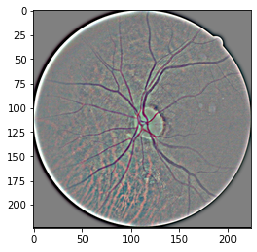

In [73]:
plt.imshow(xtrain[0])

In [74]:
from numpy import asarray
from numpy import save

data = asarray(xtrain)
save('California Healthcare Foundation/train/xtrainchf224c.npy', data)